# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:39:34.399468: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:39:37.513316
2025-04-14 22:39:37.513316


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:39:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

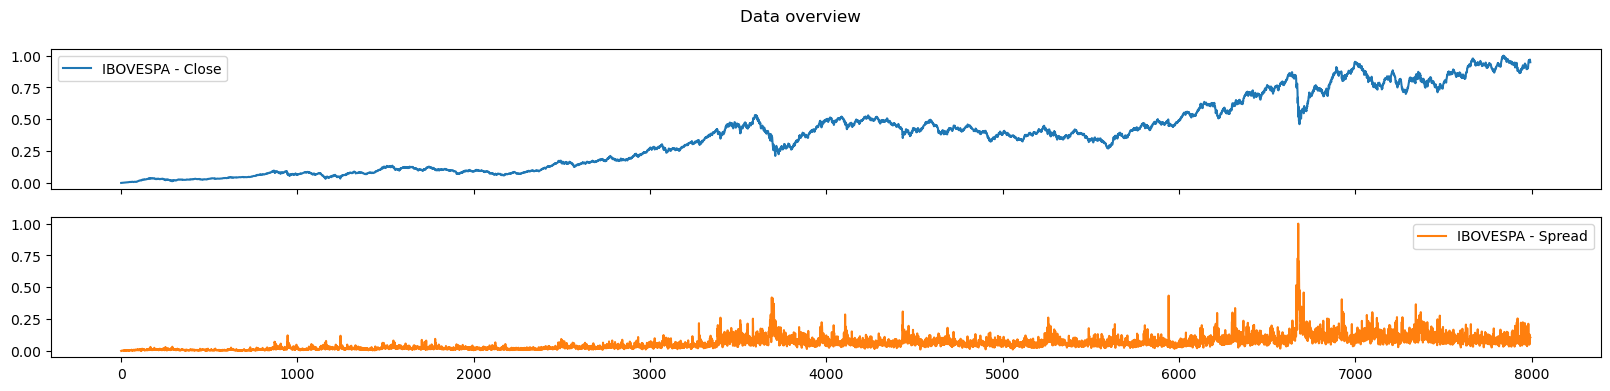

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

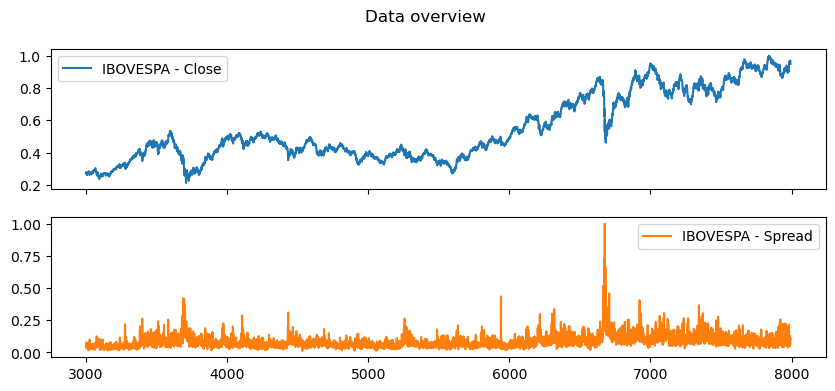

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

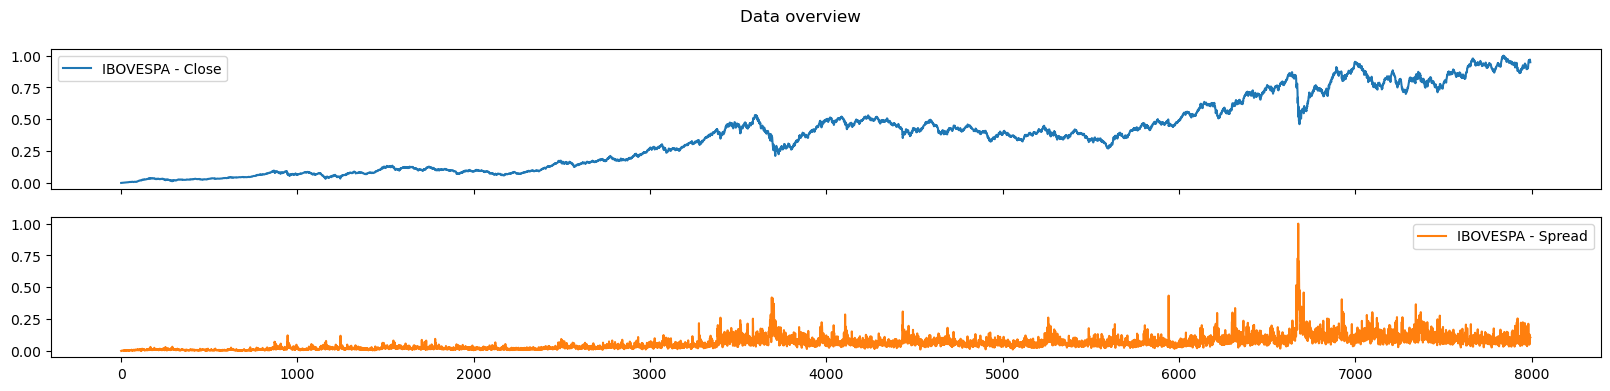

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

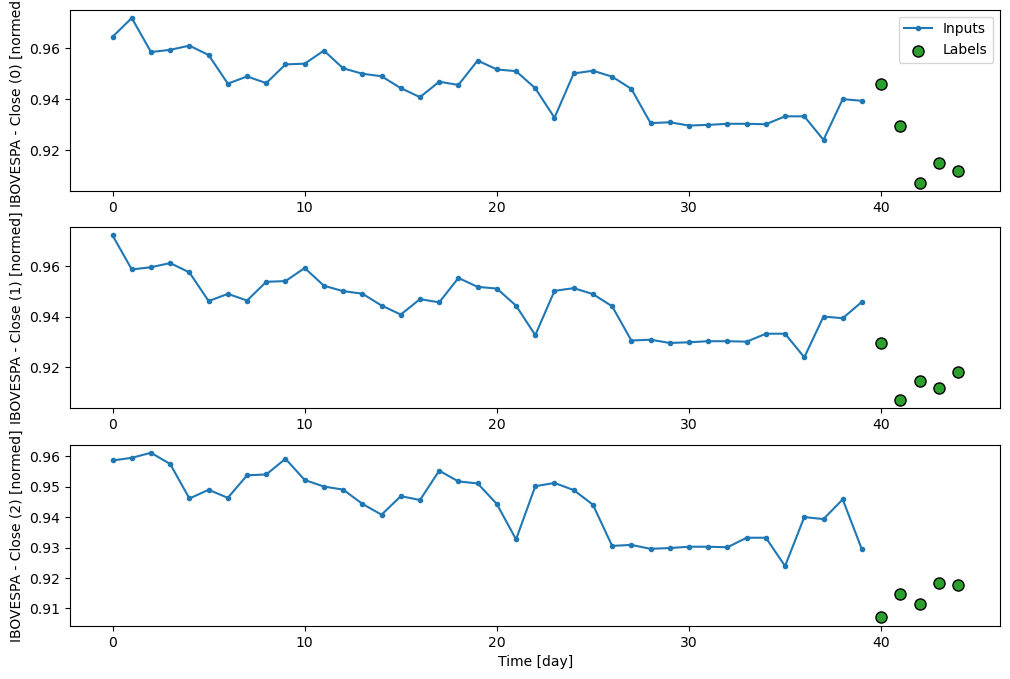

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:03 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 61.4450 - mean_squared_error: 5.8358e-05 - root_mean_squared_error: 0.0076 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.9768 - mean_squared_error: 6.6502e-05 - root_mean_squared_error: 0.0081

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 47.5549 - mean_squared_error: 7.0532e-05 - root_mean_squared_error: 0.0084

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 44.0520 - mean_squared_error: 7.0470e-05 - root_mean_squared_error: 0.0084

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 41.1294 - mean_squared_error: 6.9464e-05 - root_mean_squared_error: 0.0083

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 38.6809 - mean_squared_error: 6.9271e-05 - root_mean_squared_error: 0.0083

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.8866 - mean_squared_error: 7.7289e-05 - root_mean_squared_error: 0.0087

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.5082 - mean_squared_error: 8.7588e-05 - root_mean_squared_error: 0.0092

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.3214 - mean_squared_error: 9.5456e-05 - root_mean_squared_error: 0.0096

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.3910 - mean_squared_error: 1.0355e-04 - root_mean_squared_error: 0.0099

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.5492 - mean_squared_error: 1.1069e-04 - root_mean_squared_error: 0.0103

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.7843 - mean_squared_error: 1.1825e-04 - root_mean_squared_error: 0.0106

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 31.0483 - mean_squared_error: 1.2431e-04 - root_mean_squared_error: 0.0109

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.3456 - mean_squared_error: 1.2919e-04 - root_mean_squared_error: 0.0111

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.6965 - mean_squared_error: 1.3340e-04 - root_mean_squared_error: 0.0113

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 29.0890 - mean_squared_error: 1.3688e-04 - root_mean_squared_error: 0.0114

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 28.5446 - mean_squared_error: 1.3998e-04 - root_mean_squared_error: 0.0115

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 28.0516 - mean_squared_error: 1.4300e-04 - root_mean_squared_error: 0.0117

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.6383 - mean_squared_error: 1.4920e-04 - root_mean_squared_error: 0.0119

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.2781 - mean_squared_error: 1.5894e-04 - root_mean_squared_error: 0.0122

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.9170 - mean_squared_error: 1.6725e-04 - root_mean_squared_error: 0.0125

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 26.5645 - mean_squared_error: 1.7472e-04 - root_mean_squared_error: 0.0128

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.2287 - mean_squared_error: 1.8258e-04 - root_mean_squared_error: 0.0130

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 25.9175 - mean_squared_error: 1.9339e-04 - root_mean_squared_error: 0.0134

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.6891 - mean_squared_error: 2.0116e-04 - root_mean_squared_error: 0.0136

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 25.3890 - mean_squared_error: 2.1091e-04 - root_mean_squared_error: 0.0139

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 25.0951 - mean_squared_error: 2.2089e-04 - root_mean_squared_error: 0.0142

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.8080 - mean_squared_error: 2.3127e-04 - root_mean_squared_error: 0.0145

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 24.5400 - mean_squared_error: 2.4598e-04 - root_mean_squared_error: 0.0149

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.2962 - mean_squared_error: 2.6576e-04 - root_mean_squared_error: 0.0154

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 24.0841 - mean_squared_error: 3.0477e-04 - root_mean_squared_error: 0.0161

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 23.9095 - mean_squared_error: 3.8164e-04 - root_mean_squared_error: 0.0172

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 23.7511 - mean_squared_error: 4.6660e-04 - root_mean_squared_error: 0.0184

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 23.5912 - mean_squared_error: 5.4538e-04 - root_mean_squared_error: 0.0195

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 23.4337 - mean_squared_error: 6.1910e-04 - root_mean_squared_error: 0.0206

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 23.2791 - mean_squared_error: 6.8873e-04 - root_mean_squared_error: 0.0216

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.1244 - mean_squared_error: 7.5355e-04 - root_mean_squared_error: 0.0225

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 22.9688 - mean_squared_error: 8.1318e-04 - root_mean_squared_error: 0.0233

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 22.8182 - mean_squared_error: 8.6963e-04 - root_mean_squared_error: 0.0241

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 22.6671 - mean_squared_error: 9.2168e-04 - root_mean_squared_error: 0.0249

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 22.5219 - mean_squared_error: 9.7191e-04 - root_mean_squared_error: 0.0256

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 22.3814 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0263    

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.2428 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0270

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.1111 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 21.9819 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 21.8579 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 21.7386 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 21.6231 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0299

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 21.5100 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.3986 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.2869 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0314

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.1752 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.0700 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0324

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 20.9669 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.8691 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 20.7726 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 20.6764 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.5802 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.4841 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 20.4367 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 7.4727 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0746 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - mean_absolute_percentage_error: 8108.1411 - mean_squared_error: 0.3642 - root_mean_squared_error: 0.6035

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6001 - mean_absolute_error: 0.6001 - mean_absolute_percentage_error: 5764.3022 - mean_squared_error: 0.3603 - root_mean_squared_error: 0.6002 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5856 - mean_absolute_error: 0.5856 - mean_absolute_percentage_error: 4673.9761 - mean_squared_error: 0.3441 - root_mean_squared_error: 0.5863

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5805 - mean_absolute_error: 0.5805 - mean_absolute_percentage_error: 4134.5752 - mean_squared_error: 0.3750 - root_mean_squared_error: 0.6071

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 3780.6804 - mean_squared_error: 0.4099 - root_mean_squared_error: 0.6344

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5565 - mean_absolute_error: 0.5565 - mean_absolute_percentage_error: 3471.8630 - mean_squared_error: 0.4119 - root_mean_squared_error: 0.6369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5327 - mean_absolute_error: 0.5327 - mean_absolute_percentage_error: 3207.7703 - mean_squared_error: 0.4020 - root_mean_squared_error: 0.6297

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5088 - mean_absolute_error: 0.5088 - mean_absolute_percentage_error: 2981.8301 - mean_squared_error: 0.3880 - root_mean_squared_error: 0.6184

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2787.7712 - mean_squared_error: 0.3728 - root_mean_squared_error: 0.6056

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2619.9365 - mean_squared_error: 0.3578 - root_mean_squared_error: 0.5924

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2473.4421 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5793

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 2344.3140 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5667

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - mean_absolute_percentage_error: 2229.4912 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5546

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3969 - mean_absolute_error: 0.3969 - mean_absolute_percentage_error: 2126.6533 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5431

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3831 - mean_absolute_error: 0.3831 - mean_absolute_percentage_error: 2033.9933 - mean_squared_error: 0.2946 - root_mean_squared_error: 0.5322

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1950.0507 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5219

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3586 - mean_absolute_error: 0.3586 - mean_absolute_percentage_error: 1873.6847 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5121

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1803.9429 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.5028

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1739.9700 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4940

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1680.9705 - mean_squared_error: 0.2505 - root_mean_squared_error: 0.4856

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1626.3263 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4777

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1575.5605 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4701

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1528.2598 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4629

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1484.0831 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4560

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1442.7145 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4494

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1403.8899 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4431

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1367.3666 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4371

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1332.9292 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4314

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1300.3971 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4258

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1269.6246 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4205

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1240.4738 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4155

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1212.8352 - mean_squared_error: 0.1868 - root_mean_squared_error: 0.4107

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2476 - mean_absolute_error: 0.2476 - mean_absolute_percentage_error: 1186.5728 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4061

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1161.5646 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.4016

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1137.7202 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3974

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1114.9556 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3932

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1093.2063 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3892

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1072.3950 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3854

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1052.4614 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3816

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1033.3517 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3780

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1015.0068 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3745

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 997.3835 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3711 

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 980.4398 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3678

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 964.1327 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3646

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 948.4268 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3614

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 933.2971 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3584

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 918.7076 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3555

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 904.6221 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3526

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 891.0128 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3498

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 877.8568 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3471

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 865.1305 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3444

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 852.8127 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3418

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 840.8848 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3393

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 829.3351 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3369

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 818.1382 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3346

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 807.2758 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3323

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 796.7316 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3300

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 786.4915 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3278

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 776.5417 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3257

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 766.8727 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3236

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 764.5031 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3231 - val_loss: 0.1122 - val_mean_absolute_error: 0.1122 - val_mean_absolute_percentage_error: 11.9233 - val_mean_squared_error: 0.0133 - val_root_mean_squared_error: 0.1154 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7967 - mean_absolute_error: 0.7967 - mean_absolute_percentage_error: 10704.7803 - mean_squared_error: 0.6348 - root_mean_squared_error: 0.7967

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.7877 - mean_absolute_error: 0.7877 - mean_absolute_percentage_error: 7586.3052 - mean_squared_error: 0.6209 - root_mean_squared_error: 0.7879  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7700 - mean_absolute_error: 0.7700 - mean_absolute_percentage_error: 6155.7412 - mean_squared_error: 0.5943 - root_mean_squared_error: 0.7706

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7458 - mean_absolute_error: 0.7458 - mean_absolute_percentage_error: 5395.8633 - mean_squared_error: 0.5612 - root_mean_squared_error: 0.7481

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 4851.1006 - mean_squared_error: 0.5242 - root_mean_squared_error: 0.7215

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 4412.7539 - mean_squared_error: 0.4871 - root_mean_squared_error: 0.6934

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6431 - mean_absolute_error: 0.6431 - mean_absolute_percentage_error: 4048.9546 - mean_squared_error: 0.4531 - root_mean_squared_error: 0.6663

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6185 - mean_absolute_error: 0.6185 - mean_absolute_percentage_error: 3817.2910 - mean_squared_error: 0.4305 - root_mean_squared_error: 0.6476

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5960 - mean_absolute_error: 0.5960 - mean_absolute_percentage_error: 3613.9746 - mean_squared_error: 0.4101 - root_mean_squared_error: 0.6303

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 3377.6943 - mean_squared_error: 0.3858 - root_mean_squared_error: 0.6091

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5428 - mean_absolute_error: 0.5428 - mean_absolute_percentage_error: 3174.3291 - mean_squared_error: 0.3644 - root_mean_squared_error: 0.5897

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5200 - mean_absolute_error: 0.5200 - mean_absolute_percentage_error: 2997.1506 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4990 - mean_absolute_error: 0.4990 - mean_absolute_percentage_error: 2840.8921 - mean_squared_error: 0.3285 - root_mean_squared_error: 0.5560

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4800 - mean_absolute_error: 0.4800 - mean_absolute_percentage_error: 2702.0879 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5412

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 2577.7571 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5275

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2465.7273 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5149

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2364.2004 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.5031

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 2271.7224 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4921

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 2187.0645 - mean_squared_error: 0.2559 - root_mean_squared_error: 0.4819

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 2109.2356 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4723

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 2037.4069 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4632

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 1970.9181 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4547

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1909.1512 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4467

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1851.5955 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4391

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1797.8129 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4318

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1747.4440 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4250

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1700.1552 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4185

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1655.6678 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4122

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1613.7281 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4063

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1574.1212 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4007

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1536.7098 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3953

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1501.2732 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3903

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1467.6337 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3854

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1435.6536 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3807

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1405.2030 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3763

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1376.1752 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3719

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1348.4733 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3678

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1321.9952 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3638

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1296.6597 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3599

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1272.3910 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3562

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1249.1194 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3525

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1226.7837 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3490

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1205.3265 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3456

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1184.6930 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3423

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1164.8394 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3391

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1150.4329 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3368

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1136.4225 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3345

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1118.3298 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3316

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1100.8713 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3287

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1084.0116 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3259

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1067.7222 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3231

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1051.9711 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3205

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1036.7302 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3179

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1021.9768 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3154

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1007.6907 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3130

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 993.8444 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3106 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 983.7354 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3089

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 970.6094 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3066

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 957.8688 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3044

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 945.4961 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3022

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 933.4747 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3001

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 927.6014 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.2991 - val_loss: 0.1014 - val_mean_absolute_error: 0.1014 - val_mean_absolute_percentage_error: 10.7731 - val_mean_squared_error: 0.0109 - val_root_mean_squared_error: 0.1043 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.6795 - mean_absolute_error: 0.6795 - mean_absolute_percentage_error: 9131.2207 - mean_squared_error: 0.4618 - root_mean_squared_error: 0.6796

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6773 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 6496.0039 - mean_squared_error: 0.4588 - root_mean_squared_error: 0.6773

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 5304.7437 - mean_squared_error: 0.4493 - root_mean_squared_error: 0.6702

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6589 - mean_absolute_error: 0.6589 - mean_absolute_percentage_error: 4694.0723 - mean_squared_error: 0.4353 - root_mean_squared_error: 0.6595

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6433 - mean_absolute_error: 0.6433 - mean_absolute_percentage_error: 4264.9932 - mean_squared_error: 0.4172 - root_mean_squared_error: 0.6451

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6237 - mean_absolute_error: 0.6237 - mean_absolute_percentage_error: 3921.6240 - mean_squared_error: 0.3965 - root_mean_squared_error: 0.6281

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.6004 - mean_absolute_error: 0.6004 - mean_absolute_percentage_error: 3630.9089 - mean_squared_error: 0.3750 - root_mean_squared_error: 0.6095

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5752 - mean_absolute_error: 0.5752 - mean_absolute_percentage_error: 3379.7781 - mean_squared_error: 0.3543 - root_mean_squared_error: 0.5908

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 3163.7354 - mean_squared_error: 0.3353 - root_mean_squared_error: 0.5730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 2975.8994 - mean_squared_error: 0.3180 - root_mean_squared_error: 0.5564

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5071 - mean_absolute_error: 0.5071 - mean_absolute_percentage_error: 2810.9409 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5408

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_absolute_percentage_error: 2664.9150 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5264

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2534.8386 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5130

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4513 - mean_absolute_error: 0.4513 - mean_absolute_percentage_error: 2418.1826 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.5006

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 2312.9641 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4890

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4206 - mean_absolute_error: 0.4206 - mean_absolute_percentage_error: 2217.5317 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4782

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 2130.5623 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 2051.0042 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4585

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 1977.9062 - mean_squared_error: 0.2187 - root_mean_squared_error: 0.4496

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 1910.4808 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4412

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1848.0641 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4332

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 1804.2092 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4276

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 1749.2623 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4203

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1697.9688 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4135

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1649.9622 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.4070

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - mean_absolute_percentage_error: 1604.9274 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.4008

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1562.5791 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3949

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1522.6835 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3893

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1485.0225 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3839

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1449.4221 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3787

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1415.7493 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3739

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1383.8087 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3692

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1353.4525 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3648

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1324.5596 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3605

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1297.0208 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3563

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1270.7489 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3523

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1245.6516 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3485

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1221.6432 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3448

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1198.6532 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3412

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1176.6156 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3377

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1155.4694 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3343

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1135.1605 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3311

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1115.6373 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3279

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1096.8528 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3248

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1078.7686 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3218

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1061.3423 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3189

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1044.5397 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3161

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1032.3248 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3141

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1020.4261 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3121

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1008.8304 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3101

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 997.5278 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3082 

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 986.5060 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3063

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 975.7531 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3044

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 965.2593 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3026

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 955.0156 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.3008

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 941.7363 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2985

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 928.8663 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.2963

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 916.3840 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2941

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 907.2659 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2925

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 895.4195 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2904

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 883.9138 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2883

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 872.7336 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2863

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 864.5635 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2849 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602 - val_mean_absolute_percentage_error: 6.3762 - val_mean_squared_error: 0.0041 - val_root_mean_squared_error: 0.0640 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 7286.4922 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5424

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5398 - mean_absolute_error: 0.5398 - mean_absolute_percentage_error: 5179.3237 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5398 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5328 - mean_absolute_error: 0.5328 - mean_absolute_percentage_error: 4224.2129 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5330

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5217 - mean_absolute_error: 0.5217 - mean_absolute_percentage_error: 3728.5190 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5225

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.5062 - mean_absolute_error: 0.5062 - mean_absolute_percentage_error: 3375.7307 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.5085

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4864 - mean_absolute_error: 0.4864 - mean_absolute_percentage_error: 3090.3613 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4922

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 2848.5466 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4753

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2644.5823 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4594

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 2470.9204 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4448

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4053 - mean_absolute_error: 0.4053 - mean_absolute_percentage_error: 2320.7490 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4312

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3887 - mean_absolute_error: 0.3887 - mean_absolute_percentage_error: 2190.1287 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.4186

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 2074.9570 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.4071

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3661 - mean_absolute_error: 0.3661 - mean_absolute_percentage_error: 2022.3386 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.4017

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1972.6565 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3964

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1925.6443 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3914

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1881.0931 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3866

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1838.8225 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3819

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1779.3167 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3752

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1724.0142 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1656.1064 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3609

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1593.9974 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3535

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1536.9386 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3465

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1484.3191 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3399

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1447.4550 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3352

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1412.6161 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3307

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1379.6205 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3264

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1348.3188 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3222

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1308.9883 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3170

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1272.1582 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3120

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1237.5918 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3072

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1205.0776 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.3027

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1174.4301 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2983

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1145.4871 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2942

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1118.1140 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2902

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1092.1819 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2864

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1067.5807 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2828

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1044.2028 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2793

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1021.9478 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2759

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1000.7346 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2727

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 980.4881 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2696 

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 961.1457 - mean_squared_error: 0.0832 - root_mean_squared_error: 0.2666

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 942.6422 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2637

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 924.9222 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2609

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 907.9391 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2582

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 891.6423 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2556

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 875.9933 - mean_squared_error: 0.0760 - root_mean_squared_error: 0.2531

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 860.9500 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2507

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 853.6440 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2495

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 842.9451 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2477

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 832.5458 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2460

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 822.4308 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2443

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1730 - mean_absolute_error: 0.1730 - mean_absolute_percentage_error: 812.5894 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2427

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 803.0099 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2411

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 796.7634 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2400

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 787.5955 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2385

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 778.6609 - mean_squared_error: 0.0678 - root_mean_squared_error: 0.2370

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1657 - mean_absolute_error: 0.1657 - mean_absolute_percentage_error: 769.9522 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2355

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 761.4590 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2340

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 753.1727 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2326

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 745.0858 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2312

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 737.1921 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2298

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 729.4869 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2285

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 719.4908 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2268

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 712.1927 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2255

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 705.0587 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2243

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 698.0829 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2231

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 691.2596 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2219

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 684.5842 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2207

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 675.9045 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2192

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 669.5620 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2180 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246 - val_mean_absolute_percentage_error: 2.5931 - val_mean_squared_error: 8.6979e-04 - val_root_mean_squared_error: 0.0295 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 5200.8701 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3871

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 3680.4521 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3819

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 2981.4043 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3725

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 2685.2419 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3631

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 2456.8987 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3523

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 2265.8196 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3406

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 2055.4392 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3256

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3052 - mean_absolute_error: 0.3052 - mean_absolute_percentage_error: 1966.4651 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.3188

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1848.2289 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.3092

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1744.6636 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.3003

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1653.4498 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2921

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1547.6577 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2821

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1477.8888 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2753

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1395.4009 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2669

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1340.0686 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2611

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1289.5107 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2557

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1243.1123 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2506

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1200.3462 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2458

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1148.2606 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2399

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 1112.4277 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2357

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 1079.0306 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2317

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 1047.8260 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2280

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 1028.1327 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2256

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 1009.2575 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2232

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 991.1494 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2210 

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 965.3238 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2177

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 940.9802 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2146

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 917.9849 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2117

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 896.2249 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2088

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 875.5979 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2061

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1597 - mean_absolute_error: 0.1597 - mean_absolute_percentage_error: 856.0129 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2035

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 837.3902 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2009

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 819.6577 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1985

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 802.7499 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1962

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 786.6081 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1939

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 771.1802 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1918

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 761.2675 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1904

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 751.6372 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1890

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 737.6956 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1870

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 719.9903 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1844

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1350 - mean_absolute_error: 0.1350 - mean_absolute_percentage_error: 703.2160 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1820

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 691.1995 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1802

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 679.6346 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1785

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 668.4957 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1768

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 664.8731 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1763

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 654.2650 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1747

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 640.6979 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1726

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 627.7487 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1706

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 615.3730 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1687

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 603.5313 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1668

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 592.1890 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1650

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 581.3138 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1633

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 573.4459 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1620

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 565.8130 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1608

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 558.4044 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1596

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 551.2094 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 544.2188 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 537.4245 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1562

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 530.8179 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1551

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 524.3904 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1540

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 518.1348 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1529

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 512.0437 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1519

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 508.0714 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1512

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 502.2406 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1503

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 494.6951 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1490

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 489.1999 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1480

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 485.6114 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1474

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 482.0811 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1468

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 476.8924 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1459

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 470.1664 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1447

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 465.2599 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1439

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 460.4670 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1431

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 455.7837 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1422

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 451.2061 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1415

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 446.7300 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1407

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 442.3525 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1399

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 439.4870 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1394

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 435.2654 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1387

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 432.5056 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1382 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_absolute_percentage_error: 3.9725 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0406 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 2705.8281 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.2020

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 1876.5906 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1916

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1477.9619 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1783

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1584 - mean_absolute_error: 0.1584 - mean_absolute_percentage_error: 1241.3115 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1648

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 1083.4274 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1542

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 968.9348 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1457 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 879.0148 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1385

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 806.3655 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1322

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 746.2216 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1268

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 695.5726 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1220

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 652.1931 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1178

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 614.5278 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1139

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 581.4827 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1105

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 552.2258 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1073

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 526.1267 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1044

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 502.6914 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1018

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 481.5174 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0993

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 462.2940 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0970

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 444.7470 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0949

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 428.6439 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0929

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 413.8078 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0911

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 400.0885 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0894

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 387.3597 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0877

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 375.5144 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0862

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 367.1537 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0851

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 356.6405 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0837

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 346.7841 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0824

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 337.5221 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0811

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 328.8007 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0799

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 320.5770 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 312.8105 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0777

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 305.4649 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0767

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 298.5052 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0758

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 291.8940 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0749

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 285.6048 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0740

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 279.6133 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0732

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 273.9008 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 268.4461 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0717

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 263.2304 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0710

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 258.2401 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0703

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 253.4574 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0696

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 248.8708 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0690

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 244.4680 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0683

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 240.2370 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0677

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 236.1678 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0671

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 232.2540 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 228.4863 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0660

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 224.8537 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0655

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 221.3481 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0650

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 217.9638 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0645

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 214.6940 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 211.5328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 208.4743 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0631

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 205.5174 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0627

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 202.6545 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0624

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 199.8806 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0620

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 197.1916 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0617

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 194.5832 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0613

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 192.0518 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 189.5936 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0607

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 188.3927 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0606 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.4069 - val_mean_squared_error: 2.8226e-04 - val_root_mean_squared_error: 0.0168 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 3481.1719 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2591

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 2459.1318 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2545

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1976.9761 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2450

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1699.8589 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2321

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 1495.3851 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.2191

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 1343.2117 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2079

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1223.0471 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1983

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 1124.8337 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1898

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1043.0811 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1823

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 973.7068 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1757 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 914.0107 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1697

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 862.0000 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1644

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1356 - mean_absolute_error: 0.1356 - mean_absolute_percentage_error: 816.2455 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1595

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 775.6517 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1550

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 739.3646 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1509

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 706.7133 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1471

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 677.1622 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1437

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 650.2841 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 625.7150 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1374

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 603.1526 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1346

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 582.3566 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1319

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 563.1176 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1294

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 545.2619 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1271

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 528.6367 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1249

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 513.1151 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1228

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 498.5869 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1208

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 484.9547 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1189

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 472.1359 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1171

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 460.0564 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1154

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 448.6545 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1137

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 437.8735 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1122

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 427.6615 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1107

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 422.7534 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1100

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 417.9708 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1093

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 413.3083 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1086

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 411.0206 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1082

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 408.7610 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1079

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 406.5293 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1076

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 404.3247 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1072

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 402.1468 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1069

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 399.9951 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1066

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 395.7683 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1059

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 391.6408 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1053

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 383.6689 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1041

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 376.0522 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1029

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 368.7660 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1018

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 361.7887 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1007

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 355.0999 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0997

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 348.6821 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0986

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 342.5188 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0977

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 336.5939 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0967

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 330.8937 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0958

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 325.4052 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0949

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 320.1160 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0940

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 315.0152 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0932

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 310.0924 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0923

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 305.3386 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0915

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 300.7449 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0908

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 296.3028 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0900

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 292.0049 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0893

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 287.8443 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0886

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 284.8100 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0880

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 281.8463 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0875

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 278.9510 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0870

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 276.1214 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0866

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 273.3553 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0861

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 270.6505 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0856

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 267.1357 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0850

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 264.5683 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0846 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347 - val_mean_absolute_percentage_error: 3.6813 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0375 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1707.4822 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1274

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1171.0312 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1179

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 900.4038 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1061 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 749.4509 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0972

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 653.8796 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0909

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 583.2903 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0857

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 528.9789 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0814

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 485.0996 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0778

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 448.7446 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0746

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 418.0974 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 391.9435 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 369.3073 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 349.4676 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0650

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 331.9040 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0631

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 316.2397 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 302.1767 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 289.4809 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 277.9700 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 267.4757 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 257.8473 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 248.9745 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 240.7666 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 235.0027 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 227.7882 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 221.0594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 214.7675 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0494

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 208.8674 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 203.3225 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 198.1005 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 193.1747 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 188.5208 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 184.1140 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 179.9337 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 175.9622 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 172.1832 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 168.5831 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 165.1494 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 162.6759 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 159.5047 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 156.4696 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 153.5616 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 150.7726 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 148.0958 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 145.5237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 143.0503 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 140.6702 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 138.3775 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 136.1673 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 134.5612 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 132.9972 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 131.4740 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 129.9897 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 128.5429 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 127.1318 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 125.7552 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 124.4125 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 122.6720 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 121.4027 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 120.1631 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 118.5550 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 116.9950 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 115.4814 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 114.0115 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 113.6513 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240 - val_mean_absolute_percentage_error: 2.5405 - val_mean_squared_error: 7.4377e-04 - val_root_mean_squared_error: 0.0273 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 1672.3982 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1263

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1143.4659 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1168 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 931.2043 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1081 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 762.1110 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0983

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 681.1906 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0931

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 619.2280 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0887

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 569.4070 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0849

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 528.5830 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0817

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 493.9353 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0788

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 464.1415 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0762

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 446.4432 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 422.6146 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 401.5757 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 382.8587 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0686

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 366.0545 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0669

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 350.8561 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 332.6897 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0635

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 320.4097 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0622

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 309.1212 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 298.7046 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 286.0023 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0583

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 274.4814 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 263.9830 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 254.3640 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 245.5126 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 237.3351 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 229.7531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 222.7011 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 216.1231 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 209.9716 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 204.2032 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 198.7818 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 194.9246 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 190.0386 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 185.4262 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 181.0628 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 176.9262 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 172.9994 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 169.2643 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 165.7067 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 162.3140 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 159.0745 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 155.9771 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 153.0125 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 150.1721 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 147.4478 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 145.4768 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 143.5643 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 142.9393 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 141.1006 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 139.3147 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 137.5791 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 135.8916 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 133.7128 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 131.6116 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 129.5841 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 127.6265 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 125.7345 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 123.9044 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 122.1343 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 120.4216 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 118.7635 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 117.1568 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 115.5997 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 114.0891 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 112.6231 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 111.2003 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 2.3505 - val_mean_squared_error: 6.1559e-04 - val_root_mean_squared_error: 0.0248 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1725.5544 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1291

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1197.7246 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1224

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 984.7523 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1148 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 844.7881 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1072

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 722.7919 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0994

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 637.4672 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0932

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 587.7523 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0893

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 546.3812 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0859

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 511.1565 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0829

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 471.5317 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0793

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 446.1069 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0769

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 423.6567 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0747

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 397.4572 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 380.1136 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0703

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 364.4155 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0687

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 350.1252 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0672

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 341.2844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0662

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 325.0431 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0644

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 310.4641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 300.4674 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 294.2009 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0608

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 285.3429 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 274.4367 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0585

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 266.8571 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 259.7379 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 253.0378 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 244.6898 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 238.8269 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 233.2739 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 228.0058 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 221.3878 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 216.7026 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 212.2362 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 206.5956 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 201.2839 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 196.2739 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 192.6987 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 188.1549 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 183.8465 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 179.7550 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 175.8633 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 172.1570 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 168.6229 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0445

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 165.2487 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 162.0226 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 158.9351 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 155.9767 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 153.1395 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 150.4163 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 147.7996 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 145.2833 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0411

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 142.8615 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 140.5287 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 138.2796 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 136.6451 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 134.5320 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 132.4911 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 130.5188 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 128.6110 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 126.7656 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.9790 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 123.2482 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 121.5708 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.9441 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 118.3657 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 116.8334 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 115.7142 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238 - val_mean_absolute_percentage_error: 2.5241 - val_mean_squared_error: 7.2015e-04 - val_root_mean_squared_error: 0.0268 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1085.3049 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0814

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 732.9566 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0733  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 556.2855 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 468.1600 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 410.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 367.3437 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 333.7892 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 306.6587 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 284.2113 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 265.2351 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 248.9628 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 234.8351 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 222.4370 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 211.4469 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 201.6337 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 192.8132 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 184.8492 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 177.6262 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 171.0415 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 164.9965 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 159.4210 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 154.2577 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 149.4619 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 146.0824 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 141.8382 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 137.8660 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 134.1385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.6335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 127.3313 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 124.9776 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 122.7228 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.5594 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.4811 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.4826 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.5592 - mean_squared_error: 9.8481e-04 - root_mean_squared_error: 0.0286

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.1039 - mean_squared_error: 9.6539e-04 - root_mean_squared_error: 0.0283

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 109.7649 - mean_squared_error: 9.4690e-04 - root_mean_squared_error: 0.0280

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 107.5347 - mean_squared_error: 9.2936e-04 - root_mean_squared_error: 0.0277

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.4054 - mean_squared_error: 9.1267e-04 - root_mean_squared_error: 0.0274

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 103.3698 - mean_squared_error: 8.9673e-04 - root_mean_squared_error: 0.0272

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.4213 - mean_squared_error: 8.8146e-04 - root_mean_squared_error: 0.0269

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.5544 - mean_squared_error: 8.6681e-04 - root_mean_squared_error: 0.0267 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.2045 - mean_squared_error: 8.5621e-04 - root_mean_squared_error: 0.0265

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.8955 - mean_squared_error: 8.4593e-04 - root_mean_squared_error: 0.0263

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 95.2113 - mean_squared_error: 8.3277e-04 - root_mean_squared_error: 0.0261

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.9910 - mean_squared_error: 8.2322e-04 - root_mean_squared_error: 0.0260

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.8058 - mean_squared_error: 8.1394e-04 - root_mean_squared_error: 0.0258

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.2777 - mean_squared_error: 8.0201e-04 - root_mean_squared_error: 0.0256

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.8056 - mean_squared_error: 7.9052e-04 - root_mean_squared_error: 0.0254

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.7365 - mean_squared_error: 7.8218e-04 - root_mean_squared_error: 0.0253

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.3550 - mean_squared_error: 7.7143e-04 - root_mean_squared_error: 0.0251

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 86.0215 - mean_squared_error: 7.6109e-04 - root_mean_squared_error: 0.0249

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.7337 - mean_squared_error: 7.5120e-04 - root_mean_squared_error: 0.0247

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.4893 - mean_squared_error: 7.4179e-04 - root_mean_squared_error: 0.0246

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.2856 - mean_squared_error: 7.3276e-04 - root_mean_squared_error: 0.0244

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 81.1210 - mean_squared_error: 7.2427e-04 - root_mean_squared_error: 0.0243

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.9937 - mean_squared_error: 7.1636e-04 - root_mean_squared_error: 0.0242

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.9020 - mean_squared_error: 7.0901e-04 - root_mean_squared_error: 0.0240

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.8437 - mean_squared_error: 7.0209e-04 - root_mean_squared_error: 0.0239

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.8177 - mean_squared_error: 6.9566e-04 - root_mean_squared_error: 0.0238

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.0683 - mean_squared_error: 6.9106e-04 - root_mean_squared_error: 0.0238

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.0948 - mean_squared_error: 6.8521e-04 - root_mean_squared_error: 0.0237

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.1494 - mean_squared_error: 6.7965e-04 - root_mean_squared_error: 0.0236

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 73.6875 - mean_squared_error: 6.7692e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_absolute_percentage_error: 2.7315 - val_mean_squared_error: 8.1944e-04 - val_root_mean_squared_error: 0.0286 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1208.3198 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0909

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 820.6091 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 624.3188 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 520.7277 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0671

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 452.9645 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0625

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 403.8004 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0589

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 365.7427 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0559

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 335.2178 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 310.1082 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 288.9813 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 270.9215 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 255.2543 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 241.5270 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 229.3858 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 221.1555 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 211.1741 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 202.1712 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 194.0144 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 186.5855 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 179.7775 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 173.5177 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 167.7399 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 162.3858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.4079 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 152.7652 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 148.4240 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 144.3532 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 140.5279 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 136.9260 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.5293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.3209 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 127.2831 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 125.1079 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.3354 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 119.6982 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.1865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.7918 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.5055 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.3197 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 108.2277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 106.2234 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.3012 - mean_squared_error: 9.9632e-04 - root_mean_squared_error: 0.0283

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.4565 - mean_squared_error: 9.8014e-04 - root_mean_squared_error: 0.0280

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.6841 - mean_squared_error: 9.6460e-04 - root_mean_squared_error: 0.0278

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 98.9798 - mean_squared_error: 9.4965e-04 - root_mean_squared_error: 0.0275 

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 97.3400 - mean_squared_error: 9.3531e-04 - root_mean_squared_error: 0.0273

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.7605 - mean_squared_error: 9.2150e-04 - root_mean_squared_error: 0.0271

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.2380 - mean_squared_error: 9.0822e-04 - root_mean_squared_error: 0.0269

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.7693 - mean_squared_error: 8.9544e-04 - root_mean_squared_error: 0.0267

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.3516 - mean_squared_error: 8.8321e-04 - root_mean_squared_error: 0.0265

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.3204 - mean_squared_error: 8.7439e-04 - root_mean_squared_error: 0.0264

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.3154 - mean_squared_error: 8.6587e-04 - root_mean_squared_error: 0.0262

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.3353 - mean_squared_error: 8.5760e-04 - root_mean_squared_error: 0.0261

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.0657 - mean_squared_error: 8.4700e-04 - root_mean_squared_error: 0.0259

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.8376 - mean_squared_error: 8.3722e-04 - root_mean_squared_error: 0.0258

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.6485 - mean_squared_error: 8.2801e-04 - root_mean_squared_error: 0.0257

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.4964 - mean_squared_error: 8.1934e-04 - root_mean_squared_error: 0.0255

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 82.3800 - mean_squared_error: 8.1139e-04 - root_mean_squared_error: 0.0254

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 81.2971 - mean_squared_error: 8.0382e-04 - root_mean_squared_error: 0.0253

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.2463 - mean_squared_error: 7.9668e-04 - root_mean_squared_error: 0.0252

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.2260 - mean_squared_error: 7.8985e-04 - root_mean_squared_error: 0.0251

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.7276 - mean_squared_error: 7.8650e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316 - val_mean_absolute_percentage_error: 3.3535 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0341 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 1263.5430 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 1030.5123 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 855.6722 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 689.9082 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 565.6206 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 506.9035 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 448.0524 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0639

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 403.7270 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0606

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 368.5088 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0578

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 339.7497 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 315.7275 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0532

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 295.3429 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 277.7796 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 262.4562 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 248.9531 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 236.9505 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 226.2077 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 216.5334 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0433

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 207.7708 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 199.7988 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 192.5016 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 185.7894 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 179.5909 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 173.8454 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 168.5039 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 163.5229 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 160.0025 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 156.6503 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 152.4209 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 148.4429 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 145.6107 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 142.8998 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 139.4619 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 136.2093 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 133.8812 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 131.6424 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 128.7868 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 126.0679 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 124.1128 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 122.2252 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 120.4017 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 118.0637 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 116.3765 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.2817 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 113.6826 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 111.6266 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 110.1392 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.1726 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.7580 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.9352 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 104.1814 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.4923 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 100.8642 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.2938 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288 

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.7782 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.3147 - mean_squared_error: 9.9913e-04 - root_mean_squared_error: 0.0284

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 94.9001 - mean_squared_error: 9.8654e-04 - root_mean_squared_error: 0.0282

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 93.5316 - mean_squared_error: 9.7439e-04 - root_mean_squared_error: 0.0280

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.2077 - mean_squared_error: 9.6317e-04 - root_mean_squared_error: 0.0279

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 90.9264 - mean_squared_error: 9.5270e-04 - root_mean_squared_error: 0.0277

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 89.6858 - mean_squared_error: 9.4319e-04 - root_mean_squared_error: 0.0276

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 88.4836 - mean_squared_error: 9.3440e-04 - root_mean_squared_error: 0.0275

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 87.3184 - mean_squared_error: 9.2654e-04 - root_mean_squared_error: 0.0274

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 86.1880 - mean_squared_error: 9.1922e-04 - root_mean_squared_error: 0.0273

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 85.0910 - mean_squared_error: 9.1250e-04 - root_mean_squared_error: 0.0272

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 84.0260 - mean_squared_error: 9.0597e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3362 - val_mean_squared_error: 2.3010e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1536.4971 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1156

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1058.2228 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1081

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 817.5930 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0981 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 681.2687 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0900

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 594.6407 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0842

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 530.6147 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 481.1044 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0754

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 441.1067 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0720

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 408.0107 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0690

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 380.1301 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0664

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 356.3058 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0640

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 335.6714 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0619

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 317.5924 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 305.4194 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0587

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 290.7513 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 277.6012 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 265.7473 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 255.0059 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 245.2230 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 236.2629 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 228.0163 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 222.2467 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 216.7980 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 211.6440 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 206.7602 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 202.1248 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 197.7190 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 193.5249 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 189.5268 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 184.4778 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 179.7242 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 175.2413 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 171.0062 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 166.9963 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 163.1928 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 159.5796 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 156.9855 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 153.6709 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 151.2870 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 148.2351 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 146.0356 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 143.9083 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 141.1780 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 138.5617 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 136.0522 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 133.6433 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 131.3285 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 129.1024 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 126.9599 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 124.8959 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 123.3967 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 121.4596 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 119.5898 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.7840 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 116.0386 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 114.3502 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 112.7171 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 111.1358 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 109.6040 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.1197 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 106.6801 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 105.2833 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 103.9274 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 102.9369 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326 - val_loss: 0.0299 - val_mean_absolute_error: 0.0299 - val_mean_absolute_percentage_error: 3.1776 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0325 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 1038.9082 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0791

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 696.1494 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0707  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 527.5945 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 441.4935 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 384.8647 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 343.4038 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 311.1261 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 285.1657 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0456

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 263.8195 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 245.8805 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 230.5518 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 217.2643 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 205.6213 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 195.3184 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 186.1311 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 177.8819 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 170.4370 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 163.6880 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 157.5360 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 151.8958 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 146.7007 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.8953 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.4359 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.2955 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 130.3539 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.6679 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.2113 - mean_squared_error: 9.9253e-04 - root_mean_squared_error: 0.0287

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.9626 - mean_squared_error: 9.6710e-04 - root_mean_squared_error: 0.0283

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.9034 - mean_squared_error: 9.4336e-04 - root_mean_squared_error: 0.0279

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.0191 - mean_squared_error: 9.2145e-04 - root_mean_squared_error: 0.0275

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.2958 - mean_squared_error: 9.0111e-04 - root_mean_squared_error: 0.0272

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.7191 - mean_squared_error: 8.8226e-04 - root_mean_squared_error: 0.0269

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.2755 - mean_squared_error: 8.6460e-04 - root_mean_squared_error: 0.0266

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.9553 - mean_squared_error: 8.4816e-04 - root_mean_squared_error: 0.0263

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.7472 - mean_squared_error: 8.3252e-04 - root_mean_squared_error: 0.0261

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.6433 - mean_squared_error: 8.1764e-04 - root_mean_squared_error: 0.0258 

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.6360 - mean_squared_error: 8.0346e-04 - root_mean_squared_error: 0.0256

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.7186 - mean_squared_error: 7.8992e-04 - root_mean_squared_error: 0.0254

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.8846 - mean_squared_error: 7.7692e-04 - root_mean_squared_error: 0.0252

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.1287 - mean_squared_error: 7.6447e-04 - root_mean_squared_error: 0.0250

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.4456 - mean_squared_error: 7.5249e-04 - root_mean_squared_error: 0.0248

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.8308 - mean_squared_error: 7.4099e-04 - root_mean_squared_error: 0.0246

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.2810 - mean_squared_error: 7.2999e-04 - root_mean_squared_error: 0.0244

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 85.7914 - mean_squared_error: 7.1941e-04 - root_mean_squared_error: 0.0242

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.3587 - mean_squared_error: 7.0924e-04 - root_mean_squared_error: 0.0240

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.9798 - mean_squared_error: 6.9949e-04 - root_mean_squared_error: 0.0239

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.6512 - mean_squared_error: 6.9009e-04 - root_mean_squared_error: 0.0237

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.3702 - mean_squared_error: 6.8106e-04 - root_mean_squared_error: 0.0235

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.4393 - mean_squared_error: 6.7456e-04 - root_mean_squared_error: 0.0234

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.2359 - mean_squared_error: 6.6628e-04 - root_mean_squared_error: 0.0233

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.0738 - mean_squared_error: 6.5842e-04 - root_mean_squared_error: 0.0231

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.9504 - mean_squared_error: 6.5089e-04 - root_mean_squared_error: 0.0230

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.8633 - mean_squared_error: 6.4362e-04 - root_mean_squared_error: 0.0229

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.8125 - mean_squared_error: 6.3744e-04 - root_mean_squared_error: 0.0228

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.7954 - mean_squared_error: 6.3182e-04 - root_mean_squared_error: 0.0227

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.8108 - mean_squared_error: 6.2711e-04 - root_mean_squared_error: 0.0227

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.8568 - mean_squared_error: 6.2301e-04 - root_mean_squared_error: 0.0226

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.9321 - mean_squared_error: 6.1950e-04 - root_mean_squared_error: 0.0226

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.0351 - mean_squared_error: 6.1643e-04 - root_mean_squared_error: 0.0225

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.1644 - mean_squared_error: 6.1366e-04 - root_mean_squared_error: 0.0225

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 67.5282 - mean_squared_error: 6.1164e-04 - root_mean_squared_error: 0.0225 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6475 - val_mean_squared_error: 3.3248e-04 - val_root_mean_squared_error: 0.0182 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1400.2959 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1052

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 966.9289 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 747.2054 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0897

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 622.9354 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0823

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 543.2944 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0769

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 484.5936 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0725

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 439.4203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0689

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 402.9617 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0658

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 372.8022 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 347.3951 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 325.6914 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 306.8813 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 290.3920 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 275.7955 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 262.7743 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 251.0766 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 240.5037 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 230.8976 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 222.1250 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0472

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 214.0749 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 206.6608 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 199.8058 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 193.4471 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 187.5306 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 182.0105 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 176.8466 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 172.0034 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 167.4517 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 163.1648 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 159.1214 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 155.2998 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 151.6800 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 148.2457 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 144.9822 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 141.8762 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 138.9172 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 136.7877 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 134.0603 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 131.4526 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 128.9566 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 126.5649 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 124.2710 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 122.0692 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 119.9534 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 117.9189 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 115.9608 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.0745 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.2559 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 110.5013 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 108.8074 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 107.1711 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 105.5892 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 104.0589 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.5784 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 101.1448 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 99.7557 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.4093 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.1032 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 95.8358 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 94.6052 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 94.0041 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224 - val_mean_absolute_percentage_error: 2.3720 - val_mean_squared_error: 6.3959e-04 - val_root_mean_squared_error: 0.0253 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 796.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0608

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 530.5116 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 401.7704 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 336.1568 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 292.3389 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 260.3447 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 235.6483 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 215.8324 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 199.5535 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 185.9567 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 174.4168 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 164.4344 - mean_squared_error: 9.6661e-04 - root_mean_squared_error: 0.0293

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 155.6820 - mean_squared_error: 9.1608e-04 - root_mean_squared_error: 0.0284

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 147.9347 - mean_squared_error: 8.7127e-04 - root_mean_squared_error: 0.0276

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 141.0235 - mean_squared_error: 8.3123e-04 - root_mean_squared_error: 0.0269

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 134.8159 - mean_squared_error: 7.9519e-04 - root_mean_squared_error: 0.0262

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 129.2102 - mean_squared_error: 7.6259e-04 - root_mean_squared_error: 0.0256

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 124.1266 - mean_squared_error: 7.3297e-04 - root_mean_squared_error: 0.0250

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 119.4879 - mean_squared_error: 7.0590e-04 - root_mean_squared_error: 0.0245

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 115.2317 - mean_squared_error: 6.8104e-04 - root_mean_squared_error: 0.0240

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 111.3142 - mean_squared_error: 6.5827e-04 - root_mean_squared_error: 0.0236

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 107.6929 - mean_squared_error: 6.3727e-04 - root_mean_squared_error: 0.0231

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 104.3338 - mean_squared_error: 6.1785e-04 - root_mean_squared_error: 0.0228

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.2069 - mean_squared_error: 5.9980e-04 - root_mean_squared_error: 0.0224

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.2878 - mean_squared_error: 5.8305e-04 - root_mean_squared_error: 0.0220 

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.5552 - mean_squared_error: 5.6743e-04 - root_mean_squared_error: 0.0217

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 92.9905 - mean_squared_error: 5.5283e-04 - root_mean_squared_error: 0.0214

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.5788 - mean_squared_error: 5.3929e-04 - root_mean_squared_error: 0.0211

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 88.3064 - mean_squared_error: 5.2675e-04 - root_mean_squared_error: 0.0208

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.1634 - mean_squared_error: 5.1530e-04 - root_mean_squared_error: 0.0206

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.1378 - mean_squared_error: 5.0464e-04 - root_mean_squared_error: 0.0204

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.2182 - mean_squared_error: 4.9459e-04 - root_mean_squared_error: 0.0202

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.3961 - mean_squared_error: 4.8514e-04 - root_mean_squared_error: 0.0200

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.6637 - mean_squared_error: 4.7619e-04 - root_mean_squared_error: 0.0198

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.0140 - mean_squared_error: 4.6767e-04 - root_mean_squared_error: 0.0196

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 75.4418 - mean_squared_error: 4.5962e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.9414 - mean_squared_error: 4.5197e-04 - root_mean_squared_error: 0.0193

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.5076 - mean_squared_error: 4.4469e-04 - root_mean_squared_error: 0.0191

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.1357 - mean_squared_error: 4.3771e-04 - root_mean_squared_error: 0.0190

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.8217 - mean_squared_error: 4.3101e-04 - root_mean_squared_error: 0.0188

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.5619 - mean_squared_error: 4.2458e-04 - root_mean_squared_error: 0.0187

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.3530 - mean_squared_error: 4.1842e-04 - root_mean_squared_error: 0.0185

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.1922 - mean_squared_error: 4.1254e-04 - root_mean_squared_error: 0.0184

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.0762 - mean_squared_error: 4.0688e-04 - root_mean_squared_error: 0.0183

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.0027 - mean_squared_error: 4.0146e-04 - root_mean_squared_error: 0.0182

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.9692 - mean_squared_error: 3.9627e-04 - root_mean_squared_error: 0.0180

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.9730 - mean_squared_error: 3.9128e-04 - root_mean_squared_error: 0.0179

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.0122 - mean_squared_error: 3.8649e-04 - root_mean_squared_error: 0.0178

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.0849 - mean_squared_error: 3.8189e-04 - root_mean_squared_error: 0.0177

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.4104 - mean_squared_error: 3.7862e-04 - root_mean_squared_error: 0.0176

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.5378 - mean_squared_error: 3.7446e-04 - root_mean_squared_error: 0.0176

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.6940 - mean_squared_error: 3.7052e-04 - root_mean_squared_error: 0.0175

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.8777 - mean_squared_error: 3.6684e-04 - root_mean_squared_error: 0.0174

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.0880 - mean_squared_error: 3.6368e-04 - root_mean_squared_error: 0.0173

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.3233 - mean_squared_error: 3.6079e-04 - root_mean_squared_error: 0.0173

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.5822 - mean_squared_error: 3.5814e-04 - root_mean_squared_error: 0.0172

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.8639 - mean_squared_error: 3.5579e-04 - root_mean_squared_error: 0.0172

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.1671 - mean_squared_error: 3.5362e-04 - root_mean_squared_error: 0.0172

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.4908 - mean_squared_error: 3.5164e-04 - root_mean_squared_error: 0.0171

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.8341 - mean_squared_error: 3.4981e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.5133 - mean_squared_error: 3.4891e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241 - val_mean_absolute_percentage_error: 2.5567 - val_mean_squared_error: 7.2714e-04 - val_root_mean_squared_error: 0.0270 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 959.1914 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 646.9253 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0654

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 490.9333 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 411.2518 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 358.7398 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 320.3245 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 290.4351 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 266.3750 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 246.5457 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 229.8629 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 215.5967 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 203.2195 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 192.3662 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 182.7573 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 174.1842 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 166.4822 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 159.5223 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 153.2034 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 147.4354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 142.1433 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 137.2711 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 132.7669 - mean_squared_error: 9.8726e-04 - root_mean_squared_error: 0.0289

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 128.5895 - mean_squared_error: 9.5671e-04 - root_mean_squared_error: 0.0284

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 124.7019 - mean_squared_error: 9.2831e-04 - root_mean_squared_error: 0.0279

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 121.0736 - mean_squared_error: 9.0189e-04 - root_mean_squared_error: 0.0275

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 118.5065 - mean_squared_error: 8.8323e-04 - root_mean_squared_error: 0.0271

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 115.2699 - mean_squared_error: 8.5975e-04 - root_mean_squared_error: 0.0267

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 112.2284 - mean_squared_error: 8.3782e-04 - root_mean_squared_error: 0.0263

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.3647 - mean_squared_error: 8.1740e-04 - root_mean_squared_error: 0.0260

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 106.6644 - mean_squared_error: 7.9848e-04 - root_mean_squared_error: 0.0257

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.1141 - mean_squared_error: 7.8085e-04 - root_mean_squared_error: 0.0253

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.6993 - mean_squared_error: 7.6425e-04 - root_mean_squared_error: 0.0251

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.4084 - mean_squared_error: 7.4859e-04 - root_mean_squared_error: 0.0248 

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.2319 - mean_squared_error: 7.3378e-04 - root_mean_squared_error: 0.0245

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.1607 - mean_squared_error: 7.1970e-04 - root_mean_squared_error: 0.0243

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.1875 - mean_squared_error: 7.0633e-04 - root_mean_squared_error: 0.0240

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.3053 - mean_squared_error: 6.9364e-04 - root_mean_squared_error: 0.0238

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.5076 - mean_squared_error: 6.8153e-04 - root_mean_squared_error: 0.0236

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.7883 - mean_squared_error: 6.6994e-04 - root_mean_squared_error: 0.0234

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.1423 - mean_squared_error: 6.5884e-04 - root_mean_squared_error: 0.0232

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.5648 - mean_squared_error: 6.4819e-04 - root_mean_squared_error: 0.0230

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.0514 - mean_squared_error: 6.3797e-04 - root_mean_squared_error: 0.0228

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.5988 - mean_squared_error: 6.2819e-04 - root_mean_squared_error: 0.0226

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.2027 - mean_squared_error: 6.1879e-04 - root_mean_squared_error: 0.0224

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.8601 - mean_squared_error: 6.0976e-04 - root_mean_squared_error: 0.0222

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.5679 - mean_squared_error: 6.0110e-04 - root_mean_squared_error: 0.0221

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.3230 - mean_squared_error: 5.9277e-04 - root_mean_squared_error: 0.0219

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.1226 - mean_squared_error: 5.8477e-04 - root_mean_squared_error: 0.0218

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.9644 - mean_squared_error: 5.7707e-04 - root_mean_squared_error: 0.0216

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.8463 - mean_squared_error: 5.6974e-04 - root_mean_squared_error: 0.0215

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.7662 - mean_squared_error: 5.6276e-04 - root_mean_squared_error: 0.0213

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.7219 - mean_squared_error: 5.5607e-04 - root_mean_squared_error: 0.0212

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.7115 - mean_squared_error: 5.4974e-04 - root_mean_squared_error: 0.0211

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.7343 - mean_squared_error: 5.4405e-04 - root_mean_squared_error: 0.0210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.7880 - mean_squared_error: 5.3877e-04 - root_mean_squared_error: 0.0209

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.8711 - mean_squared_error: 5.3385e-04 - root_mean_squared_error: 0.0208

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.9828 - mean_squared_error: 5.2951e-04 - root_mean_squared_error: 0.0208

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.1211 - mean_squared_error: 5.2542e-04 - root_mean_squared_error: 0.0207

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.2850 - mean_squared_error: 5.2168e-04 - root_mean_squared_error: 0.0206

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.4731 - mean_squared_error: 5.1809e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.0765 - mean_squared_error: 5.1633e-04 - root_mean_squared_error: 0.0206 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_mean_absolute_percentage_error: 2.7560 - val_mean_squared_error: 8.2294e-04 - val_root_mean_squared_error: 0.0287 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 972.2100 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0739

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 650.1620 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 493.0373 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 413.4172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 360.7750 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 322.5098 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 292.7404 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 268.7795 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 249.0161 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 232.3501 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 218.0970 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 205.7208 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 194.8570 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 185.2314 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 176.6401 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 168.9206 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.9457 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 155.6138 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 149.8324 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 144.5250 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 139.6329 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 135.1050 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 130.9008 - mean_squared_error: 9.9137e-04 - root_mean_squared_error: 0.0290

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.9851 - mean_squared_error: 9.6241e-04 - root_mean_squared_error: 0.0286

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.3283 - mean_squared_error: 9.3545e-04 - root_mean_squared_error: 0.0281

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.9045 - mean_squared_error: 9.1028e-04 - root_mean_squared_error: 0.0277

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.6907 - mean_squared_error: 8.8672e-04 - root_mean_squared_error: 0.0273

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.6674 - mean_squared_error: 8.6472e-04 - root_mean_squared_error: 0.0269

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.8181 - mean_squared_error: 8.4424e-04 - root_mean_squared_error: 0.0265

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.1305 - mean_squared_error: 8.2543e-04 - root_mean_squared_error: 0.0262

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.5903 - mean_squared_error: 8.0794e-04 - root_mean_squared_error: 0.0259

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.1856 - mean_squared_error: 7.9185e-04 - root_mean_squared_error: 0.0257

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.9035 - mean_squared_error: 7.7682e-04 - root_mean_squared_error: 0.0254

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.7352 - mean_squared_error: 7.6284e-04 - root_mean_squared_error: 0.0252 

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.6702 - mean_squared_error: 7.4950e-04 - root_mean_squared_error: 0.0249

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.7014 - mean_squared_error: 7.3681e-04 - root_mean_squared_error: 0.0247

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.8221 - mean_squared_error: 7.2471e-04 - root_mean_squared_error: 0.0245

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.0260 - mean_squared_error: 7.1315e-04 - root_mean_squared_error: 0.0243

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.7298 - mean_squared_error: 7.0477e-04 - root_mean_squared_error: 0.0242

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.0656 - mean_squared_error: 6.9399e-04 - root_mean_squared_error: 0.0240

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.4699 - mean_squared_error: 6.8361e-04 - root_mean_squared_error: 0.0238

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.9389 - mean_squared_error: 6.7365e-04 - root_mean_squared_error: 0.0236

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.4693 - mean_squared_error: 6.6414e-04 - root_mean_squared_error: 0.0235

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.0565 - mean_squared_error: 6.5498e-04 - root_mean_squared_error: 0.0233

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.6977 - mean_squared_error: 6.4620e-04 - root_mean_squared_error: 0.0231

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.3900 - mean_squared_error: 6.3781e-04 - root_mean_squared_error: 0.0230

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.1298 - mean_squared_error: 6.2973e-04 - root_mean_squared_error: 0.0229

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.9147 - mean_squared_error: 6.2199e-04 - root_mean_squared_error: 0.0227

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.7424 - mean_squared_error: 6.1467e-04 - root_mean_squared_error: 0.0226

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.6107 - mean_squared_error: 6.0774e-04 - root_mean_squared_error: 0.0225

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.5170 - mean_squared_error: 6.0109e-04 - root_mean_squared_error: 0.0223

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.4592 - mean_squared_error: 5.9469e-04 - root_mean_squared_error: 0.0222

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.4355 - mean_squared_error: 5.8864e-04 - root_mean_squared_error: 0.0221

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.4458 - mean_squared_error: 5.8366e-04 - root_mean_squared_error: 0.0220

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.4875 - mean_squared_error: 5.7918e-04 - root_mean_squared_error: 0.0220

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.5594 - mean_squared_error: 5.7537e-04 - root_mean_squared_error: 0.0219

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 67.6599 - mean_squared_error: 5.7211e-04 - root_mean_squared_error: 0.0219

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 66.7876 - mean_squared_error: 5.6923e-04 - root_mean_squared_error: 0.0219

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 65.9411 - mean_squared_error: 5.6677e-04 - root_mean_squared_error: 0.0218

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 65.1190 - mean_squared_error: 5.6445e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 64.7173 - mean_squared_error: 5.6333e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4569 - val_mean_squared_error: 2.6700e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1565.9634 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1169

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 1087.7786 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1110

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 849.6282 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1022 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 709.2074 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0940

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 619.2213 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0879

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 552.7746 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0830

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 501.2626 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0788

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 459.6263 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0752

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 425.2260 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0721

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 396.3162 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0694

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 371.6404 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0670

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 350.2419 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0648

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 331.4637 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 318.8121 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 303.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 289.8654 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0583

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 277.5089 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 266.2962 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 256.0708 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 246.6985 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0532

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 238.0738 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 230.1062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 222.7199 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 215.8511 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 209.4448 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 203.4543 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 197.8378 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 192.5609 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 187.5929 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 182.9075 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 178.4810 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 174.2898 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 170.3144 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 166.5378 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 162.9447 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 159.5220 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 156.2574 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 153.1398 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 150.1587 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 147.3053 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 144.5710 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 141.9484 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 139.4309 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.0117 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 134.6853 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 132.4463 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 130.2892 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 128.2096 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 126.2031 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 124.2659 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.3944 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 121.0317 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.2668 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 117.5594 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.9062 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.3045 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 112.7518 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 111.2459 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 109.7847 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.3660 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.3298 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338 - val_loss: 0.0199 - val_mean_absolute_error: 0.0199 - val_mean_absolute_percentage_error: 2.1138 - val_mean_squared_error: 5.2547e-04 - val_root_mean_squared_error: 0.0229 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 669.1691 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 443.4818 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 335.4664 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 280.3658 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 243.8816 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 217.2242 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 196.6678 - mean_squared_error: 9.5212e-04 - root_mean_squared_error: 0.0296

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 180.1645 - mean_squared_error: 8.7416e-04 - root_mean_squared_error: 0.0283

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 166.6021 - mean_squared_error: 8.0991e-04 - root_mean_squared_error: 0.0271

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 155.2765 - mean_squared_error: 7.5611e-04 - root_mean_squared_error: 0.0261

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 145.6783 - mean_squared_error: 7.1048e-04 - root_mean_squared_error: 0.0252

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 137.3840 - mean_squared_error: 6.7099e-04 - root_mean_squared_error: 0.0244

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.1125 - mean_squared_error: 6.3632e-04 - root_mean_squared_error: 0.0237

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 123.6756 - mean_squared_error: 6.0557e-04 - root_mean_squared_error: 0.0230

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 117.9325 - mean_squared_error: 5.7809e-04 - root_mean_squared_error: 0.0224

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 112.7730 - mean_squared_error: 5.5334e-04 - root_mean_squared_error: 0.0219

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 108.1120 - mean_squared_error: 5.3094e-04 - root_mean_squared_error: 0.0214

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 103.8835 - mean_squared_error: 5.1057e-04 - root_mean_squared_error: 0.0209

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 100.0238 - mean_squared_error: 4.9193e-04 - root_mean_squared_error: 0.0205

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.4814 - mean_squared_error: 4.7481e-04 - root_mean_squared_error: 0.0201 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 93.2203 - mean_squared_error: 4.5916e-04 - root_mean_squared_error: 0.0197

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.2046 - mean_squared_error: 4.4471e-04 - root_mean_squared_error: 0.0194

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 87.4068 - mean_squared_error: 4.3135e-04 - root_mean_squared_error: 0.0191

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.8019 - mean_squared_error: 4.1895e-04 - root_mean_squared_error: 0.0187

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.3697 - mean_squared_error: 4.0745e-04 - root_mean_squared_error: 0.0185

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.0924 - mean_squared_error: 3.9674e-04 - root_mean_squared_error: 0.0182

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.4767 - mean_squared_error: 3.8917e-04 - root_mean_squared_error: 0.0180

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.9343 - mean_squared_error: 3.8203e-04 - root_mean_squared_error: 0.0178

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.9835 - mean_squared_error: 3.7321e-04 - root_mean_squared_error: 0.0176

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.1442 - mean_squared_error: 3.6517e-04 - root_mean_squared_error: 0.0174

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.4087 - mean_squared_error: 3.5791e-04 - root_mean_squared_error: 0.0172

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.7658 - mean_squared_error: 3.5112e-04 - root_mean_squared_error: 0.0171

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.2074 - mean_squared_error: 3.4475e-04 - root_mean_squared_error: 0.0169

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.7268 - mean_squared_error: 3.3877e-04 - root_mean_squared_error: 0.0168

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.3178 - mean_squared_error: 3.3308e-04 - root_mean_squared_error: 0.0166

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.9753 - mean_squared_error: 3.2769e-04 - root_mean_squared_error: 0.0165

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.6951 - mean_squared_error: 3.2263e-04 - root_mean_squared_error: 0.0164

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.4725 - mean_squared_error: 3.1783e-04 - root_mean_squared_error: 0.0163

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.3033 - mean_squared_error: 3.1324e-04 - root_mean_squared_error: 0.0162

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.1839 - mean_squared_error: 3.0884e-04 - root_mean_squared_error: 0.0160

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.1111 - mean_squared_error: 3.0461e-04 - root_mean_squared_error: 0.0159

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.0820 - mean_squared_error: 3.0054e-04 - root_mean_squared_error: 0.0158

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.0942 - mean_squared_error: 2.9668e-04 - root_mean_squared_error: 0.0157

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.1450 - mean_squared_error: 2.9298e-04 - root_mean_squared_error: 0.0156

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.2322 - mean_squared_error: 2.8942e-04 - root_mean_squared_error: 0.0156

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.3538 - mean_squared_error: 2.8603e-04 - root_mean_squared_error: 0.0155

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.5076 - mean_squared_error: 2.8278e-04 - root_mean_squared_error: 0.0154

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.6917 - mean_squared_error: 2.7967e-04 - root_mean_squared_error: 0.0153

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.9044 - mean_squared_error: 2.7669e-04 - root_mean_squared_error: 0.0152

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.1442 - mean_squared_error: 2.7387e-04 - root_mean_squared_error: 0.0152

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.4099 - mean_squared_error: 2.7122e-04 - root_mean_squared_error: 0.0151

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.7000 - mean_squared_error: 2.6875e-04 - root_mean_squared_error: 0.0150

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.0131 - mean_squared_error: 2.6638e-04 - root_mean_squared_error: 0.0150

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.3488 - mean_squared_error: 2.6456e-04 - root_mean_squared_error: 0.0149

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.7055 - mean_squared_error: 2.6293e-04 - root_mean_squared_error: 0.0149

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.0822 - mean_squared_error: 2.6149e-04 - root_mean_squared_error: 0.0149

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.4781 - mean_squared_error: 2.6029e-04 - root_mean_squared_error: 0.0149

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8921 - mean_squared_error: 2.5923e-04 - root_mean_squared_error: 0.0149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3234 - mean_squared_error: 2.5832e-04 - root_mean_squared_error: 0.0149

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.7713 - mean_squared_error: 2.5753e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.3679 - mean_squared_error: 2.5696e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227 - val_mean_absolute_percentage_error: 2.4100 - val_mean_squared_error: 6.5510e-04 - val_root_mean_squared_error: 0.0256 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 855.6552 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 574.8483 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 461.8900 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 379.7501 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 328.6210 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 291.8937 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 263.6051 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 241.0039 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 222.5291 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 207.0711 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 193.9212 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 182.5547 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 172.6188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 163.8458 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 156.0358 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 149.0323 - mean_squared_error: 9.8621e-04 - root_mean_squared_error: 0.0293

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 142.7170 - mean_squared_error: 9.4502e-04 - root_mean_squared_error: 0.0286

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 136.9967 - mean_squared_error: 9.0763e-04 - root_mean_squared_error: 0.0280

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 131.7874 - mean_squared_error: 8.7351e-04 - root_mean_squared_error: 0.0274

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 127.0154 - mean_squared_error: 8.4223e-04 - root_mean_squared_error: 0.0268

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 122.6265 - mean_squared_error: 8.1350e-04 - root_mean_squared_error: 0.0263

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 118.5729 - mean_squared_error: 7.8701e-04 - root_mean_squared_error: 0.0258

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.8152 - mean_squared_error: 7.6246e-04 - root_mean_squared_error: 0.0253

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.3200 - mean_squared_error: 7.3965e-04 - root_mean_squared_error: 0.0249

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.0591 - mean_squared_error: 7.1841e-04 - root_mean_squared_error: 0.0245

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.0092 - mean_squared_error: 6.9862e-04 - root_mean_squared_error: 0.0241

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 102.1487 - mean_squared_error: 6.8009e-04 - root_mean_squared_error: 0.0237

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 99.4605 - mean_squared_error: 6.6282e-04 - root_mean_squared_error: 0.0234 

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.9294 - mean_squared_error: 6.4679e-04 - root_mean_squared_error: 0.0231

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.5431 - mean_squared_error: 6.3203e-04 - root_mean_squared_error: 0.0228

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.2895 - mean_squared_error: 6.1834e-04 - root_mean_squared_error: 0.0225

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 90.1559 - mean_squared_error: 6.0550e-04 - root_mean_squared_error: 0.0223

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.1318 - mean_squared_error: 5.9341e-04 - root_mean_squared_error: 0.0221

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.2088 - mean_squared_error: 5.8202e-04 - root_mean_squared_error: 0.0218

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.3787 - mean_squared_error: 5.7119e-04 - root_mean_squared_error: 0.0216

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.6352 - mean_squared_error: 5.6093e-04 - root_mean_squared_error: 0.0214

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.9722 - mean_squared_error: 5.5119e-04 - root_mean_squared_error: 0.0212

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.3836 - mean_squared_error: 5.4191e-04 - root_mean_squared_error: 0.0210

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.8642 - mean_squared_error: 5.3302e-04 - root_mean_squared_error: 0.0209

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 76.4096 - mean_squared_error: 5.2451e-04 - root_mean_squared_error: 0.0207

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.3585 - mean_squared_error: 5.1835e-04 - root_mean_squared_error: 0.0206

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.0072 - mean_squared_error: 5.1042e-04 - root_mean_squared_error: 0.0204

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.7104 - mean_squared_error: 5.0285e-04 - root_mean_squared_error: 0.0203

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.4643 - mean_squared_error: 4.9558e-04 - root_mean_squared_error: 0.0201

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.2661 - mean_squared_error: 4.8859e-04 - root_mean_squared_error: 0.0200

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.1133 - mean_squared_error: 4.8191e-04 - root_mean_squared_error: 0.0198

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.0029 - mean_squared_error: 4.7549e-04 - root_mean_squared_error: 0.0197

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.9324 - mean_squared_error: 4.6933e-04 - root_mean_squared_error: 0.0196

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.8997 - mean_squared_error: 4.6341e-04 - root_mean_squared_error: 0.0194

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.9028 - mean_squared_error: 4.5777e-04 - root_mean_squared_error: 0.0193

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.9400 - mean_squared_error: 4.5241e-04 - root_mean_squared_error: 0.0192

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.0092 - mean_squared_error: 4.4732e-04 - root_mean_squared_error: 0.0191

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.1087 - mean_squared_error: 4.4242e-04 - root_mean_squared_error: 0.0190

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.2379 - mean_squared_error: 4.3822e-04 - root_mean_squared_error: 0.0189

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.3949 - mean_squared_error: 4.3433e-04 - root_mean_squared_error: 0.0189

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.5782 - mean_squared_error: 4.3079e-04 - root_mean_squared_error: 0.0188

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.7870 - mean_squared_error: 4.2775e-04 - root_mean_squared_error: 0.0187

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.0198 - mean_squared_error: 4.2498e-04 - root_mean_squared_error: 0.0187

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.2755 - mean_squared_error: 4.2255e-04 - root_mean_squared_error: 0.0187

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.5529 - mean_squared_error: 4.2027e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.0249 - mean_squared_error: 4.1859e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0180 - val_mean_absolute_error: 0.0180 - val_mean_absolute_percentage_error: 1.9053 - val_mean_squared_error: 4.3795e-04 - val_root_mean_squared_error: 0.0209 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 932.5317 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0707

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 626.4791 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 475.6652 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0560

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 397.9082 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 346.8172 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 309.3648 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 280.3027 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 256.9946 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 237.8156 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 221.6770 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 207.8846 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 195.9216 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 185.4394 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 176.1650 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 167.8944 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 160.4685 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 153.7668 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 147.6894 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 142.1482 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 137.0656 - mean_squared_error: 9.8528e-04 - root_mean_squared_error: 0.0290

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 132.3832 - mean_squared_error: 9.5209e-04 - root_mean_squared_error: 0.0284

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 128.0515 - mean_squared_error: 9.2137e-04 - root_mean_squared_error: 0.0279

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 124.0317 - mean_squared_error: 8.9287e-04 - root_mean_squared_error: 0.0274

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 120.2897 - mean_squared_error: 8.6636e-04 - root_mean_squared_error: 0.0269

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.7967 - mean_squared_error: 8.4169e-04 - root_mean_squared_error: 0.0265

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.5276 - mean_squared_error: 8.1867e-04 - root_mean_squared_error: 0.0261

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.4604 - mean_squared_error: 7.9714e-04 - root_mean_squared_error: 0.0257

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 107.5763 - mean_squared_error: 7.7706e-04 - root_mean_squared_error: 0.0253

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.8593 - mean_squared_error: 7.5840e-04 - root_mean_squared_error: 0.0250

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.2976 - mean_squared_error: 7.4129e-04 - root_mean_squared_error: 0.0247

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.8771 - mean_squared_error: 7.2537e-04 - root_mean_squared_error: 0.0244 

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 97.5861 - mean_squared_error: 7.1069e-04 - root_mean_squared_error: 0.0242

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.4125 - mean_squared_error: 6.9695e-04 - root_mean_squared_error: 0.0239

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.3477 - mean_squared_error: 6.8414e-04 - root_mean_squared_error: 0.0237

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.3817 - mean_squared_error: 6.7193e-04 - root_mean_squared_error: 0.0235

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.5080 - mean_squared_error: 6.6032e-04 - root_mean_squared_error: 0.0233

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.7199 - mean_squared_error: 6.4927e-04 - root_mean_squared_error: 0.0231

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.0115 - mean_squared_error: 6.3872e-04 - root_mean_squared_error: 0.0229

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.3768 - mean_squared_error: 6.2859e-04 - root_mean_squared_error: 0.0227

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.8113 - mean_squared_error: 6.1887e-04 - root_mean_squared_error: 0.0225

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.3103 - mean_squared_error: 6.0952e-04 - root_mean_squared_error: 0.0224

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.8702 - mean_squared_error: 6.0055e-04 - root_mean_squared_error: 0.0222

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.4876 - mean_squared_error: 5.9199e-04 - root_mean_squared_error: 0.0220

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.1584 - mean_squared_error: 5.8374e-04 - root_mean_squared_error: 0.0219

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.5131 - mean_squared_error: 5.7974e-04 - root_mean_squared_error: 0.0218

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.8802 - mean_squared_error: 5.7584e-04 - root_mean_squared_error: 0.0217

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.6497 - mean_squared_error: 5.6828e-04 - root_mean_squared_error: 0.0216

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.4640 - mean_squared_error: 5.6102e-04 - root_mean_squared_error: 0.0214

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.3207 - mean_squared_error: 5.5406e-04 - root_mean_squared_error: 0.0213

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.2177 - mean_squared_error: 5.4748e-04 - root_mean_squared_error: 0.0212

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.1527 - mean_squared_error: 5.4123e-04 - root_mean_squared_error: 0.0211

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.1234 - mean_squared_error: 5.3522e-04 - root_mean_squared_error: 0.0210

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.1278 - mean_squared_error: 5.2944e-04 - root_mean_squared_error: 0.0209

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.1647 - mean_squared_error: 5.2418e-04 - root_mean_squared_error: 0.0208

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.2333 - mean_squared_error: 5.1968e-04 - root_mean_squared_error: 0.0207

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.3315 - mean_squared_error: 5.1569e-04 - root_mean_squared_error: 0.0206

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.4579 - mean_squared_error: 5.1218e-04 - root_mean_squared_error: 0.0206

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.6114 - mean_squared_error: 5.0921e-04 - root_mean_squared_error: 0.0205

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 62.7903 - mean_squared_error: 5.0654e-04 - root_mean_squared_error: 0.0205

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.9935 - mean_squared_error: 5.0422e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.2197 - mean_squared_error: 5.0200e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 61.0301 - mean_squared_error: 5.0146e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3117 - val_mean_squared_error: 2.2357e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1327.2272 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 919.6173 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0934 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 715.0157 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 596.6123 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0786

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 522.6486 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0740

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 468.0398 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 425.5283 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 391.0338 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0639

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 362.4480 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 338.3298 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0592

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 317.6751 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 299.7062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 283.9025 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 269.8835 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 257.3523 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 246.0768 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 235.8699 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 226.5828 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 218.0900 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 210.2887 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 203.0970 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 196.4415 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 190.2626 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.5086 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 179.1360 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 174.1065 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 169.3862 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 164.9474 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 160.7648 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 156.8178 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 153.0856 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 149.5490 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 146.1920 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 143.0008 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 139.9626 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 137.0670 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 134.3036 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.6631 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 129.1369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 126.7177 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 124.3984 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 122.1730 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 120.0358 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 117.9812 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 116.0048 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 114.1018 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 112.2679 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 110.4990 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 108.7918 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 107.1430 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 105.5496 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 104.0086 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 102.5177 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 101.0745 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 99.6766 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 98.3216 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 97.0077 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 95.7329 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 94.4954 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 93.2937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 92.9992 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214 - val_mean_absolute_percentage_error: 2.2699 - val_mean_squared_error: 5.8921e-04 - val_root_mean_squared_error: 0.0243 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 571.2856 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 374.4659 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 284.0186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 238.2016 - mean_squared_error: 9.6678e-04 - root_mean_squared_error: 0.0304

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 214.5322 - mean_squared_error: 8.7708e-04 - root_mean_squared_error: 0.0288

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 190.8376 - mean_squared_error: 7.8573e-04 - root_mean_squared_error: 0.0272

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 176.8645 - mean_squared_error: 7.3119e-04 - root_mean_squared_error: 0.0261

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 161.5551 - mean_squared_error: 6.7087e-04 - root_mean_squared_error: 0.0249

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 149.0399 - mean_squared_error: 6.2134e-04 - root_mean_squared_error: 0.0239

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 138.6133 - mean_squared_error: 5.7983e-04 - root_mean_squared_error: 0.0230

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 129.8099 - mean_squared_error: 5.4453e-04 - root_mean_squared_error: 0.0222

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 122.2424 - mean_squared_error: 5.1405e-04 - root_mean_squared_error: 0.0215

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 115.6324 - mean_squared_error: 4.8731e-04 - root_mean_squared_error: 0.0209

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 111.1915 - mean_squared_error: 4.6930e-04 - root_mean_squared_error: 0.0205

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 107.1269 - mean_squared_error: 4.5279e-04 - root_mean_squared_error: 0.0200

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 102.2148 - mean_squared_error: 4.3279e-04 - root_mean_squared_error: 0.0196

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.7989 - mean_squared_error: 4.1476e-04 - root_mean_squared_error: 0.0191 

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 94.7690 - mean_squared_error: 4.0236e-04 - root_mean_squared_error: 0.0188

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 91.0596 - mean_squared_error: 3.8713e-04 - root_mean_squared_error: 0.0184

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 87.6777 - mean_squared_error: 3.7322e-04 - root_mean_squared_error: 0.0180

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 84.5756 - mean_squared_error: 3.6043e-04 - root_mean_squared_error: 0.0177

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.7203 - mean_squared_error: 3.4872e-04 - root_mean_squared_error: 0.0173

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 79.0810 - mean_squared_error: 3.3793e-04 - root_mean_squared_error: 0.0170

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.6322 - mean_squared_error: 3.2795e-04 - root_mean_squared_error: 0.0168

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.3525 - mean_squared_error: 3.1867e-04 - root_mean_squared_error: 0.0165

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.2239 - mean_squared_error: 3.1006e-04 - root_mean_squared_error: 0.0162

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.7177 - mean_squared_error: 3.0401e-04 - root_mean_squared_error: 0.0161

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.8179 - mean_squared_error: 2.9641e-04 - root_mean_squared_error: 0.0159

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.0320 - mean_squared_error: 2.8937e-04 - root_mean_squared_error: 0.0156

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.3506 - mean_squared_error: 2.8297e-04 - root_mean_squared_error: 0.0155

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.7650 - mean_squared_error: 2.7724e-04 - root_mean_squared_error: 0.0153

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.2689 - mean_squared_error: 2.7217e-04 - root_mean_squared_error: 0.0152

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.8525 - mean_squared_error: 2.6748e-04 - root_mean_squared_error: 0.0150

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.5086 - mean_squared_error: 2.6312e-04 - root_mean_squared_error: 0.0149

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 58.2317 - mean_squared_error: 2.5909e-04 - root_mean_squared_error: 0.0148

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 57.0163 - mean_squared_error: 2.5526e-04 - root_mean_squared_error: 0.0147

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.8579 - mean_squared_error: 2.5165e-04 - root_mean_squared_error: 0.0146

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.7530 - mean_squared_error: 2.4826e-04 - root_mean_squared_error: 0.0145

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.9568 - mean_squared_error: 2.4584e-04 - root_mean_squared_error: 0.0145

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.4408 - mean_squared_error: 2.4427e-04 - root_mean_squared_error: 0.0144

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.9359 - mean_squared_error: 2.4273e-04 - root_mean_squared_error: 0.0144

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.6875 - mean_squared_error: 2.4198e-04 - root_mean_squared_error: 0.0144

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.1988 - mean_squared_error: 2.4048e-04 - root_mean_squared_error: 0.0143

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.9584 - mean_squared_error: 2.3975e-04 - root_mean_squared_error: 0.0143

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.4851 - mean_squared_error: 2.3831e-04 - root_mean_squared_error: 0.0143

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.0217 - mean_squared_error: 2.3689e-04 - root_mean_squared_error: 0.0142

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.5678 - mean_squared_error: 2.3549e-04 - root_mean_squared_error: 0.0142

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.1230 - mean_squared_error: 2.3412e-04 - root_mean_squared_error: 0.0142

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.6873 - mean_squared_error: 2.3279e-04 - root_mean_squared_error: 0.0141

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 49.4728 - mean_squared_error: 2.3214e-04 - root_mean_squared_error: 0.0141

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.8420 - mean_squared_error: 2.3023e-04 - root_mean_squared_error: 0.0140

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.2295 - mean_squared_error: 2.2838e-04 - root_mean_squared_error: 0.0140

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.8310 - mean_squared_error: 2.2717e-04 - root_mean_squared_error: 0.0140

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.4402 - mean_squared_error: 2.2599e-04 - root_mean_squared_error: 0.0139

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.6806 - mean_squared_error: 2.2374e-04 - root_mean_squared_error: 0.0139

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.1292 - mean_squared_error: 2.2212e-04 - root_mean_squared_error: 0.0138

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.5926 - mean_squared_error: 2.2055e-04 - root_mean_squared_error: 0.0138

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.0703 - mean_squared_error: 2.1903e-04 - root_mean_squared_error: 0.0137

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.5617 - mean_squared_error: 2.1757e-04 - root_mean_squared_error: 0.0137

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.0663 - mean_squared_error: 2.1619e-04 - root_mean_squared_error: 0.0137

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.5836 - mean_squared_error: 2.1489e-04 - root_mean_squared_error: 0.0136

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.1131 - mean_squared_error: 2.1366e-04 - root_mean_squared_error: 0.0136

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.6543 - mean_squared_error: 2.1250e-04 - root_mean_squared_error: 0.0136

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.2064 - mean_squared_error: 2.1138e-04 - root_mean_squared_error: 0.0135

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.9140 - mean_squared_error: 2.1077e-04 - root_mean_squared_error: 0.0135

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.6266 - mean_squared_error: 2.1034e-04 - root_mean_squared_error: 0.0135

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.3438 - mean_squared_error: 2.0993e-04 - root_mean_squared_error: 0.0135

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.9280 - mean_squared_error: 2.0944e-04 - root_mean_squared_error: 0.0135

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.6563 - mean_squared_error: 2.0920e-04 - root_mean_squared_error: 0.0135

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.2565 - mean_squared_error: 2.0890e-04 - root_mean_squared_error: 0.0135

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.9953 - mean_squared_error: 2.0886e-04 - root_mean_squared_error: 0.0135

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.6110 - mean_squared_error: 2.0890e-04 - root_mean_squared_error: 0.0135

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.2353 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0136

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.8681 - mean_squared_error: 2.0928e-04 - root_mean_squared_error: 0.0136

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.6278 - mean_squared_error: 2.0948e-04 - root_mean_squared_error: 0.0136

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.2736 - mean_squared_error: 2.0978e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.0421 - mean_squared_error: 2.0998e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4341 - val_mean_squared_error: 2.7243e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 803.1277 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 588.3920 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 460.8795 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 388.0295 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 342.2758 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 308.4163 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 281.8612 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 260.2052 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 242.0902 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 226.6566 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 213.3831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 201.7788 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 191.5623 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 182.4840 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 174.3462 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 167.0009 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 160.3334 - mean_squared_error: 9.9635e-04 - root_mean_squared_error: 0.0298

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 154.2476 - mean_squared_error: 9.5933e-04 - root_mean_squared_error: 0.0291

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 148.6705 - mean_squared_error: 9.2536e-04 - root_mean_squared_error: 0.0285

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 143.5370 - mean_squared_error: 8.9403e-04 - root_mean_squared_error: 0.0280

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 138.7973 - mean_squared_error: 8.6504e-04 - root_mean_squared_error: 0.0275

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 134.4060 - mean_squared_error: 8.3815e-04 - root_mean_squared_error: 0.0270

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 130.3270 - mean_squared_error: 8.1312e-04 - root_mean_squared_error: 0.0265

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 126.5281 - mean_squared_error: 7.8976e-04 - root_mean_squared_error: 0.0261

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 122.9756 - mean_squared_error: 7.6789e-04 - root_mean_squared_error: 0.0257

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.6456 - mean_squared_error: 7.4737e-04 - root_mean_squared_error: 0.0253

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 116.5176 - mean_squared_error: 7.2813e-04 - root_mean_squared_error: 0.0249

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 113.5732 - mean_squared_error: 7.1003e-04 - root_mean_squared_error: 0.0246

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.7944 - mean_squared_error: 6.9296e-04 - root_mean_squared_error: 0.0242

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 108.1674 - mean_squared_error: 6.7683e-04 - root_mean_squared_error: 0.0239

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.6792 - mean_squared_error: 6.6156e-04 - root_mean_squared_error: 0.0236

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.3180 - mean_squared_error: 6.4708e-04 - root_mean_squared_error: 0.0233

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.0748 - mean_squared_error: 6.3337e-04 - root_mean_squared_error: 0.0230

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.9400 - mean_squared_error: 6.2035e-04 - root_mean_squared_error: 0.0228 

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.9054 - mean_squared_error: 6.0796e-04 - root_mean_squared_error: 0.0225

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.9641 - mean_squared_error: 5.9620e-04 - root_mean_squared_error: 0.0223

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.1098 - mean_squared_error: 5.8508e-04 - root_mean_squared_error: 0.0220

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.3368 - mean_squared_error: 5.7458e-04 - root_mean_squared_error: 0.0218

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.6405 - mean_squared_error: 5.6476e-04 - root_mean_squared_error: 0.0216

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.0167 - mean_squared_error: 5.5557e-04 - root_mean_squared_error: 0.0214

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.4598 - mean_squared_error: 5.4685e-04 - root_mean_squared_error: 0.0212

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.9653 - mean_squared_error: 5.3861e-04 - root_mean_squared_error: 0.0211

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.5289 - mean_squared_error: 5.3075e-04 - root_mean_squared_error: 0.0209

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.1475 - mean_squared_error: 5.2333e-04 - root_mean_squared_error: 0.0208

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.8174 - mean_squared_error: 5.1622e-04 - root_mean_squared_error: 0.0206

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.5353 - mean_squared_error: 5.0937e-04 - root_mean_squared_error: 0.0205

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.2989 - mean_squared_error: 5.0278e-04 - root_mean_squared_error: 0.0204

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.1057 - mean_squared_error: 4.9645e-04 - root_mean_squared_error: 0.0202

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.9534 - mean_squared_error: 4.9034e-04 - root_mean_squared_error: 0.0201

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.8398 - mean_squared_error: 4.8445e-04 - root_mean_squared_error: 0.0200

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.7626 - mean_squared_error: 4.7874e-04 - root_mean_squared_error: 0.0199

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.7203 - mean_squared_error: 4.7320e-04 - root_mean_squared_error: 0.0197

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.7110 - mean_squared_error: 4.6784e-04 - root_mean_squared_error: 0.0196

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.7330 - mean_squared_error: 4.6263e-04 - root_mean_squared_error: 0.0195

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.7850 - mean_squared_error: 4.5757e-04 - root_mean_squared_error: 0.0194

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.8659 - mean_squared_error: 4.5269e-04 - root_mean_squared_error: 0.0193

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.9741 - mean_squared_error: 4.4797e-04 - root_mean_squared_error: 0.0192

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1084 - mean_squared_error: 4.4337e-04 - root_mean_squared_error: 0.0191

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.2676 - mean_squared_error: 4.3892e-04 - root_mean_squared_error: 0.0190

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.4510 - mean_squared_error: 4.3463e-04 - root_mean_squared_error: 0.0189

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.6571 - mean_squared_error: 4.3047e-04 - root_mean_squared_error: 0.0188

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.8849 - mean_squared_error: 4.2642e-04 - root_mean_squared_error: 0.0188

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.1337 - mean_squared_error: 4.2252e-04 - root_mean_squared_error: 0.0187

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.4024 - mean_squared_error: 4.1874e-04 - root_mean_squared_error: 0.0186

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.6905 - mean_squared_error: 4.1513e-04 - root_mean_squared_error: 0.0185

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.9971 - mean_squared_error: 4.1167e-04 - root_mean_squared_error: 0.0184

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.7699 - mean_squared_error: 4.1054e-04 - root_mean_squared_error: 0.0184

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.0999 - mean_squared_error: 4.0723e-04 - root_mean_squared_error: 0.0183

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.6625 - mean_squared_error: 4.0509e-04 - root_mean_squared_error: 0.0183

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.2322 - mean_squared_error: 4.0298e-04 - root_mean_squared_error: 0.0183

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.8090 - mean_squared_error: 4.0091e-04 - root_mean_squared_error: 0.0182

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.5999 - mean_squared_error: 3.9989e-04 - root_mean_squared_error: 0.0182

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.3927 - mean_squared_error: 3.9901e-04 - root_mean_squared_error: 0.0182

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.1873 - mean_squared_error: 3.9817e-04 - root_mean_squared_error: 0.0182

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.9836 - mean_squared_error: 3.9736e-04 - root_mean_squared_error: 0.0181

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.5811 - mean_squared_error: 3.9577e-04 - root_mean_squared_error: 0.0181

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.1850 - mean_squared_error: 3.9425e-04 - root_mean_squared_error: 0.0181

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.6028 - mean_squared_error: 3.9223e-04 - root_mean_squared_error: 0.0181

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.0343 - mean_squared_error: 3.9038e-04 - root_mean_squared_error: 0.0180

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.4790 - mean_squared_error: 3.8879e-04 - root_mean_squared_error: 0.0180

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.1160 - mean_squared_error: 3.8784e-04 - root_mean_squared_error: 0.0180

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.9365 - mean_squared_error: 3.8738e-04 - root_mean_squared_error: 0.0180

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.7584 - mean_squared_error: 3.8692e-04 - root_mean_squared_error: 0.0180

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.4062 - mean_squared_error: 3.8608e-04 - root_mean_squared_error: 0.0180

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.0593 - mean_squared_error: 3.8535e-04 - root_mean_squared_error: 0.0180

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.8878 - mean_squared_error: 3.8499e-04 - root_mean_squared_error: 0.0180

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.7175 - mean_squared_error: 3.8464e-04 - root_mean_squared_error: 0.0180

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.5485 - mean_squared_error: 3.8429e-04 - root_mean_squared_error: 0.0180

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.3806 - mean_squared_error: 3.8394e-04 - root_mean_squared_error: 0.0180

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.0487 - mean_squared_error: 3.8326e-04 - root_mean_squared_error: 0.0180

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.8848 - mean_squared_error: 3.8292e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2502 - val_mean_squared_error: 2.0729e-04 - val_root_mean_squared_error: 0.0144 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 992.6226 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0739

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 815.3127 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0716 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 631.4368 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 552.9930 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 472.5562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 419.5997 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 392.2490 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 358.1837 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 339.3390 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 315.1752 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 301.1467 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 294.6680 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 282.6446 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 266.5728 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 252.4731 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 236.2023 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 225.5190 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 212.9057 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 201.8066 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 191.9558 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 183.1435 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 175.2089 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 168.0205 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 161.4768 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 155.4889 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.9855 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 144.9104 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.2112 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 135.8468 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.7807 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 127.9825 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 124.4249 - mean_squared_error: 9.9799e-04 - root_mean_squared_error: 0.0289

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 121.0847 - mean_squared_error: 9.7188e-04 - root_mean_squared_error: 0.0285

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 117.9427 - mean_squared_error: 9.4753e-04 - root_mean_squared_error: 0.0281

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 114.9813 - mean_squared_error: 9.2479e-04 - root_mean_squared_error: 0.0277

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 112.1872 - mean_squared_error: 9.0371e-04 - root_mean_squared_error: 0.0274

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 109.5440 - mean_squared_error: 8.8384e-04 - root_mean_squared_error: 0.0270

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.6526 - mean_squared_error: 8.6966e-04 - root_mean_squared_error: 0.0268

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.2430 - mean_squared_error: 8.5164e-04 - root_mean_squared_error: 0.0265

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.9523 - mean_squared_error: 8.3454e-04 - root_mean_squared_error: 0.0262

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.7716 - mean_squared_error: 8.1826e-04 - root_mean_squared_error: 0.0259

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.2039 - mean_squared_error: 8.0661e-04 - root_mean_squared_error: 0.0257 

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.6906 - mean_squared_error: 7.9538e-04 - root_mean_squared_error: 0.0255

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.2288 - mean_squared_error: 7.8454e-04 - root_mean_squared_error: 0.0253

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.8158 - mean_squared_error: 7.7407e-04 - root_mean_squared_error: 0.0251

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.0031 - mean_squared_error: 7.6063e-04 - root_mean_squared_error: 0.0249

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.2674 - mean_squared_error: 7.4775e-04 - root_mean_squared_error: 0.0247

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.6034 - mean_squared_error: 7.3539e-04 - root_mean_squared_error: 0.0245

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.0068 - mean_squared_error: 7.2355e-04 - root_mean_squared_error: 0.0243

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.4737 - mean_squared_error: 7.1219e-04 - root_mean_squared_error: 0.0240

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.0000 - mean_squared_error: 7.0127e-04 - root_mean_squared_error: 0.0238

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.5825 - mean_squared_error: 6.9079e-04 - root_mean_squared_error: 0.0237

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.2178 - mean_squared_error: 6.8073e-04 - root_mean_squared_error: 0.0235

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.9026 - mean_squared_error: 6.7103e-04 - root_mean_squared_error: 0.0233

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.6342 - mean_squared_error: 6.6170e-04 - root_mean_squared_error: 0.0231

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.4100 - mean_squared_error: 6.5272e-04 - root_mean_squared_error: 0.0230

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.2278 - mean_squared_error: 6.4411e-04 - root_mean_squared_error: 0.0228

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.0855 - mean_squared_error: 6.3585e-04 - root_mean_squared_error: 0.0226

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.9807 - mean_squared_error: 6.2791e-04 - root_mean_squared_error: 0.0225

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.9119 - mean_squared_error: 6.2047e-04 - root_mean_squared_error: 0.0224

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.8775 - mean_squared_error: 6.1355e-04 - root_mean_squared_error: 0.0222

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.8757 - mean_squared_error: 6.0700e-04 - root_mean_squared_error: 0.0221

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.9047 - mean_squared_error: 6.0078e-04 - root_mean_squared_error: 0.0220

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.9634 - mean_squared_error: 5.9495e-04 - root_mean_squared_error: 0.0219

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.0501 - mean_squared_error: 5.8939e-04 - root_mean_squared_error: 0.0218

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.1637 - mean_squared_error: 5.8412e-04 - root_mean_squared_error: 0.0217

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.3029 - mean_squared_error: 5.7902e-04 - root_mean_squared_error: 0.0217

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.0920 - mean_squared_error: 5.7777e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 1.9612 - val_mean_squared_error: 4.5745e-04 - val_root_mean_squared_error: 0.0214 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 550.7837 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 359.7981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 272.2553 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 228.0488 - mean_squared_error: 8.9150e-04 - root_mean_squared_error: 0.0292

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 198.7656 - mean_squared_error: 7.8375e-04 - root_mean_squared_error: 0.0272

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 177.3015 - mean_squared_error: 7.0268e-04 - root_mean_squared_error: 0.0256

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 164.4928 - mean_squared_error: 6.5368e-04 - root_mean_squared_error: 0.0246

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 153.6638 - mean_squared_error: 6.1208e-04 - root_mean_squared_error: 0.0237

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 141.5675 - mean_squared_error: 5.6552e-04 - root_mean_squared_error: 0.0227

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 131.5237 - mean_squared_error: 5.2673e-04 - root_mean_squared_error: 0.0218

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 125.0598 - mean_squared_error: 5.0168e-04 - root_mean_squared_error: 0.0213

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 119.3251 - mean_squared_error: 4.7946e-04 - root_mean_squared_error: 0.0207

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 114.1780 - mean_squared_error: 4.5945e-04 - root_mean_squared_error: 0.0202

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 109.5218 - mean_squared_error: 4.4132e-04 - root_mean_squared_error: 0.0198

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 103.9556 - mean_squared_error: 4.1963e-04 - root_mean_squared_error: 0.0193

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 99.0067 - mean_squared_error: 4.0031e-04 - root_mean_squared_error: 0.0188 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.5736 - mean_squared_error: 3.8296e-04 - root_mean_squared_error: 0.0183

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 90.5799 - mean_squared_error: 3.6729e-04 - root_mean_squared_error: 0.0179

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 86.9624 - mean_squared_error: 3.5306e-04 - root_mean_squared_error: 0.0175

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 83.6709 - mean_squared_error: 3.4007e-04 - root_mean_squared_error: 0.0171

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.6559 - mean_squared_error: 3.2815e-04 - root_mean_squared_error: 0.0168

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.8837 - mean_squared_error: 3.1723e-04 - root_mean_squared_error: 0.0165

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 75.3260 - mean_squared_error: 3.0721e-04 - root_mean_squared_error: 0.0162

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 72.9558 - mean_squared_error: 2.9795e-04 - root_mean_squared_error: 0.0159

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.7526 - mean_squared_error: 2.8938e-04 - root_mean_squared_error: 0.0157

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.6975 - mean_squared_error: 2.8141e-04 - root_mean_squared_error: 0.0154

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.7763 - mean_squared_error: 2.7406e-04 - root_mean_squared_error: 0.0152

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.9746 - mean_squared_error: 2.6720e-04 - root_mean_squared_error: 0.0150

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.2815 - mean_squared_error: 2.6085e-04 - root_mean_squared_error: 0.0148

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.0776 - mean_squared_error: 2.5650e-04 - root_mean_squared_error: 0.0147

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.9257 - mean_squared_error: 2.5247e-04 - root_mean_squared_error: 0.0146

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.8241 - mean_squared_error: 2.4890e-04 - root_mean_squared_error: 0.0145

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.4272 - mean_squared_error: 2.4457e-04 - root_mean_squared_error: 0.0143

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.1051 - mean_squared_error: 2.4066e-04 - root_mean_squared_error: 0.0142

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.8507 - mean_squared_error: 2.3706e-04 - root_mean_squared_error: 0.0141

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 54.6591 - mean_squared_error: 2.3381e-04 - root_mean_squared_error: 0.0141

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.5244 - mean_squared_error: 2.3072e-04 - root_mean_squared_error: 0.0140

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.4430 - mean_squared_error: 2.2782e-04 - root_mean_squared_error: 0.0139

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.4111 - mean_squared_error: 2.2507e-04 - root_mean_squared_error: 0.0138

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.4252 - mean_squared_error: 2.2247e-04 - root_mean_squared_error: 0.0138

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.4817 - mean_squared_error: 2.1996e-04 - root_mean_squared_error: 0.0137

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 48.5782 - mean_squared_error: 2.1756e-04 - root_mean_squared_error: 0.0136

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.7120 - mean_squared_error: 2.1523e-04 - root_mean_squared_error: 0.0136

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.8807 - mean_squared_error: 2.1300e-04 - root_mean_squared_error: 0.0135

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.0828 - mean_squared_error: 2.1090e-04 - root_mean_squared_error: 0.0135

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.5047 - mean_squared_error: 2.0937e-04 - root_mean_squared_error: 0.0134

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.7599 - mean_squared_error: 2.0742e-04 - root_mean_squared_error: 0.0134

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 44.0434 - mean_squared_error: 2.0559e-04 - root_mean_squared_error: 0.0133

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.5233 - mean_squared_error: 2.0428e-04 - root_mean_squared_error: 0.0133

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.0174 - mean_squared_error: 2.0301e-04 - root_mean_squared_error: 0.0132

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 42.3637 - mean_squared_error: 2.0141e-04 - root_mean_squared_error: 0.0132

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.7329 - mean_squared_error: 1.9994e-04 - root_mean_squared_error: 0.0132

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 41.1239 - mean_squared_error: 1.9861e-04 - root_mean_squared_error: 0.0131

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 40.5352 - mean_squared_error: 1.9737e-04 - root_mean_squared_error: 0.0131

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.9656 - mean_squared_error: 1.9621e-04 - root_mean_squared_error: 0.0131

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.4146 - mean_squared_error: 1.9539e-04 - root_mean_squared_error: 0.0131

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.8820 - mean_squared_error: 1.9505e-04 - root_mean_squared_error: 0.0131

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 38.3663 - mean_squared_error: 1.9499e-04 - root_mean_squared_error: 0.0131

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.8667 - mean_squared_error: 1.9519e-04 - root_mean_squared_error: 0.0131

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 37.3827 - mean_squared_error: 1.9571e-04 - root_mean_squared_error: 0.0131

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.9131 - mean_squared_error: 1.9636e-04 - root_mean_squared_error: 0.0132

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.4575 - mean_squared_error: 1.9723e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.0150 - mean_squared_error: 1.9808e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 35.9065 - mean_squared_error: 1.9830e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2376 - val_mean_squared_error: 2.0087e-04 - val_root_mean_squared_error: 0.0142 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 905.9095 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 674.8724 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0639 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 535.4803 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0589

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 429.3098 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 368.1849 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0494

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 325.0044 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 292.6780 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 272.9229 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 250.9116 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 236.9094 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 220.8302 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 207.1109 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 198.0455 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 189.8511 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 182.3982 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 175.5841 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 171.3568 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 165.4346 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 158.2335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.7190 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 145.7963 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 140.3795 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 135.4029 - mean_squared_error: 9.7186e-04 - root_mean_squared_error: 0.0288

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.8150 - mean_squared_error: 9.3940e-04 - root_mean_squared_error: 0.0283

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.5676 - mean_squared_error: 9.0934e-04 - root_mean_squared_error: 0.0278

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 122.6240 - mean_squared_error: 8.8145e-04 - root_mean_squared_error: 0.0273

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 118.9502 - mean_squared_error: 8.5548e-04 - root_mean_squared_error: 0.0268

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 115.5190 - mean_squared_error: 8.3129e-04 - root_mean_squared_error: 0.0264

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 113.0896 - mean_squared_error: 8.1418e-04 - root_mean_squared_error: 0.0261

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.0252 - mean_squared_error: 7.9266e-04 - root_mean_squared_error: 0.0257

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 107.8483 - mean_squared_error: 7.7748e-04 - root_mean_squared_error: 0.0254

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.7678 - mean_squared_error: 7.6311e-04 - root_mean_squared_error: 0.0251

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.7769 - mean_squared_error: 7.4949e-04 - root_mean_squared_error: 0.0249

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 101.8718 - mean_squared_error: 7.3670e-04 - root_mean_squared_error: 0.0247

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.6459 - mean_squared_error: 7.2851e-04 - root_mean_squared_error: 0.0245

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.4532 - mean_squared_error: 7.2056e-04 - root_mean_squared_error: 0.0244 

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 98.2922 - mean_squared_error: 7.1282e-04 - root_mean_squared_error: 0.0242

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.1617 - mean_squared_error: 7.0531e-04 - root_mean_squared_error: 0.0241

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.0603 - mean_squared_error: 6.9801e-04 - root_mean_squared_error: 0.0239

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.9871 - mean_squared_error: 6.9091e-04 - root_mean_squared_error: 0.0238

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 93.9406 - mean_squared_error: 6.8400e-04 - root_mean_squared_error: 0.0237

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.9200 - mean_squared_error: 6.7726e-04 - root_mean_squared_error: 0.0236

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.4352 - mean_squared_error: 6.6746e-04 - root_mean_squared_error: 0.0234

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.0035 - mean_squared_error: 6.5803e-04 - root_mean_squared_error: 0.0232

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.6221 - mean_squared_error: 6.4898e-04 - root_mean_squared_error: 0.0230

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.2881 - mean_squared_error: 6.4025e-04 - root_mean_squared_error: 0.0229

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.5788 - mean_squared_error: 6.2909e-04 - root_mean_squared_error: 0.0227

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.9436 - mean_squared_error: 6.1839e-04 - root_mean_squared_error: 0.0224

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.7631 - mean_squared_error: 6.1068e-04 - root_mean_squared_error: 0.0223

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.6197 - mean_squared_error: 6.0319e-04 - root_mean_squared_error: 0.0222

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.5114 - mean_squared_error: 5.9593e-04 - root_mean_squared_error: 0.0220

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.4370 - mean_squared_error: 5.8891e-04 - root_mean_squared_error: 0.0219

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.3949 - mean_squared_error: 5.8212e-04 - root_mean_squared_error: 0.0217

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.7172 - mean_squared_error: 5.7769e-04 - root_mean_squared_error: 0.0217

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.7253 - mean_squared_error: 5.7122e-04 - root_mean_squared_error: 0.0215

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.4471 - mean_squared_error: 5.6291e-04 - root_mean_squared_error: 0.0214

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.2165 - mean_squared_error: 5.5493e-04 - root_mean_squared_error: 0.0212

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.0307 - mean_squared_error: 5.4725e-04 - root_mean_squared_error: 0.0211

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.1691 - mean_squared_error: 5.4168e-04 - root_mean_squared_error: 0.0209

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.0556 - mean_squared_error: 5.3450e-04 - root_mean_squared_error: 0.0208

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.9805 - mean_squared_error: 5.2762e-04 - root_mean_squared_error: 0.0207

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.9417 - mean_squared_error: 5.2104e-04 - root_mean_squared_error: 0.0205

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.9375 - mean_squared_error: 5.1473e-04 - root_mean_squared_error: 0.0204

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.9658 - mean_squared_error: 5.0876e-04 - root_mean_squared_error: 0.0203

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.0259 - mean_squared_error: 5.0337e-04 - root_mean_squared_error: 0.0202

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.1157 - mean_squared_error: 4.9828e-04 - root_mean_squared_error: 0.0201

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.4516 - mean_squared_error: 4.9464e-04 - root_mean_squared_error: 0.0200

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.8029 - mean_squared_error: 4.9121e-04 - root_mean_squared_error: 0.0200

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.1690 - mean_squared_error: 4.8793e-04 - root_mean_squared_error: 0.0199

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.5493 - mean_squared_error: 4.8477e-04 - root_mean_squared_error: 0.0199

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.9435 - mean_squared_error: 4.8178e-04 - root_mean_squared_error: 0.0198

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.3509 - mean_squared_error: 4.7889e-04 - root_mean_squared_error: 0.0198

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.7712 - mean_squared_error: 4.7606e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.5811 - mean_squared_error: 4.7513e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0158 - val_mean_absolute_error: 0.0158 - val_mean_absolute_percentage_error: 1.6761 - val_mean_squared_error: 3.5092e-04 - val_root_mean_squared_error: 0.0187 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 571.9084 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 413.5598 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 301.7974 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 250.7272 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 224.9994 - mean_squared_error: 9.4119e-04 - root_mean_squared_error: 0.0300

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 211.3790 - mean_squared_error: 8.8997e-04 - root_mean_squared_error: 0.0291

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 194.4847 - mean_squared_error: 8.2540e-04 - root_mean_squared_error: 0.0280

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 184.8795 - mean_squared_error: 7.8779e-04 - root_mean_squared_error: 0.0273

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 176.3810 - mean_squared_error: 7.5438e-04 - root_mean_squared_error: 0.0266

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 168.7389 - mean_squared_error: 7.2408e-04 - root_mean_squared_error: 0.0260

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 158.6544 - mean_squared_error: 6.8428e-04 - root_mean_squared_error: 0.0253

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 147.2551 - mean_squared_error: 6.3925e-04 - root_mean_squared_error: 0.0243

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 137.6312 - mean_squared_error: 6.0065e-04 - root_mean_squared_error: 0.0235

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 131.3292 - mean_squared_error: 5.7500e-04 - root_mean_squared_error: 0.0230

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 127.4831 - mean_squared_error: 5.5922e-04 - root_mean_squared_error: 0.0226

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 122.1752 - mean_squared_error: 5.3731e-04 - root_mean_squared_error: 0.0221

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.8439 - mean_squared_error: 5.1106e-04 - root_mean_squared_error: 0.0215

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 110.2243 - mean_squared_error: 4.8763e-04 - root_mean_squared_error: 0.0210

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 106.4057 - mean_squared_error: 4.7163e-04 - root_mean_squared_error: 0.0206

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 102.8799 - mean_squared_error: 4.5680e-04 - root_mean_squared_error: 0.0202

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.5800 - mean_squared_error: 4.3863e-04 - root_mean_squared_error: 0.0198 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 94.6793 - mean_squared_error: 4.2206e-04 - root_mean_squared_error: 0.0193

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.1257 - mean_squared_error: 4.0689e-04 - root_mean_squared_error: 0.0189

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.6565 - mean_squared_error: 3.9631e-04 - root_mean_squared_error: 0.0187

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.3374 - mean_squared_error: 3.8637e-04 - root_mean_squared_error: 0.0184

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.4583 - mean_squared_error: 3.7409e-04 - root_mean_squared_error: 0.0181

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.7933 - mean_squared_error: 3.6272e-04 - root_mean_squared_error: 0.0178

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.3183 - mean_squared_error: 3.5219e-04 - root_mean_squared_error: 0.0175

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.5739 - mean_squared_error: 3.4477e-04 - root_mean_squared_error: 0.0173

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.9167 - mean_squared_error: 3.3774e-04 - root_mean_squared_error: 0.0171

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.8321 - mean_squared_error: 3.2897e-04 - root_mean_squared_error: 0.0168

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.8763 - mean_squared_error: 3.2076e-04 - root_mean_squared_error: 0.0166

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.0376 - mean_squared_error: 3.1315e-04 - root_mean_squared_error: 0.0164

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.3064 - mean_squared_error: 3.0621e-04 - root_mean_squared_error: 0.0162

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.6738 - mean_squared_error: 2.9999e-04 - root_mean_squared_error: 0.0160

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.5104 - mean_squared_error: 2.9582e-04 - root_mean_squared_error: 0.0159

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.0325 - mean_squared_error: 2.9064e-04 - root_mean_squared_error: 0.0158

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.6313 - mean_squared_error: 2.8587e-04 - root_mean_squared_error: 0.0156

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.3006 - mean_squared_error: 2.8147e-04 - root_mean_squared_error: 0.0155

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.0346 - mean_squared_error: 2.7734e-04 - root_mean_squared_error: 0.0154

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.8281 - mean_squared_error: 2.7341e-04 - root_mean_squared_error: 0.0153

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.6775 - mean_squared_error: 2.6972e-04 - root_mean_squared_error: 0.0152

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.5785 - mean_squared_error: 2.6621e-04 - root_mean_squared_error: 0.0151

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.5275 - mean_squared_error: 2.6285e-04 - root_mean_squared_error: 0.0150

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.5211 - mean_squared_error: 2.5962e-04 - root_mean_squared_error: 0.0150

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.5567 - mean_squared_error: 2.5651e-04 - root_mean_squared_error: 0.0149

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.6314 - mean_squared_error: 2.5351e-04 - root_mean_squared_error: 0.0148

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.9619 - mean_squared_error: 2.5135e-04 - root_mean_squared_error: 0.0147

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.3124 - mean_squared_error: 2.4928e-04 - root_mean_squared_error: 0.0147

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.4756 - mean_squared_error: 2.4659e-04 - root_mean_squared_error: 0.0146

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.6707 - mean_squared_error: 2.4403e-04 - root_mean_squared_error: 0.0145

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.2797 - mean_squared_error: 2.4281e-04 - root_mean_squared_error: 0.0145

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.8960 - mean_squared_error: 2.4161e-04 - root_mean_squared_error: 0.0145

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.3334 - mean_squared_error: 2.3986e-04 - root_mean_squared_error: 0.0144

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.7860 - mean_squared_error: 2.3818e-04 - root_mean_squared_error: 0.0144

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.2531 - mean_squared_error: 2.3655e-04 - root_mean_squared_error: 0.0143

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.7342 - mean_squared_error: 2.3501e-04 - root_mean_squared_error: 0.0143

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.2287 - mean_squared_error: 2.3355e-04 - root_mean_squared_error: 0.0143

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.7360 - mean_squared_error: 2.3217e-04 - root_mean_squared_error: 0.0142

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.0982 - mean_squared_error: 2.3041e-04 - root_mean_squared_error: 0.0142

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.4809 - mean_squared_error: 2.2874e-04 - root_mean_squared_error: 0.0141

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.8838 - mean_squared_error: 2.2755e-04 - root_mean_squared_error: 0.0141

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4488 - mean_squared_error: 2.2689e-04 - root_mean_squared_error: 0.0141

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.8848 - mean_squared_error: 2.2625e-04 - root_mean_squared_error: 0.0141

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.3383 - mean_squared_error: 2.2583e-04 - root_mean_squared_error: 0.0141

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.8087 - mean_squared_error: 2.2574e-04 - root_mean_squared_error: 0.0141

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.2948 - mean_squared_error: 2.2579e-04 - root_mean_squared_error: 0.0141

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.7962 - mean_squared_error: 2.2605e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.3117 - mean_squared_error: 2.2633e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.1930 - mean_squared_error: 2.2640e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1813 - val_mean_squared_error: 1.8452e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 850.5962 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0635

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 580.5470 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 443.2944 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 370.1198 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 333.3832 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 304.3260 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 280.9326 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 255.5122 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 234.8691 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 217.7309 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 203.2629 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 190.8588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 180.0772 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 170.6094 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 162.2137 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 154.7123 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 149.5889 - mean_squared_error: 9.9677e-04 - root_mean_squared_error: 0.0295

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 143.3353 - mean_squared_error: 9.5582e-04 - root_mean_squared_error: 0.0288

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 137.6588 - mean_squared_error: 9.1855e-04 - root_mean_squared_error: 0.0282

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 132.4760 - mean_squared_error: 8.8443e-04 - root_mean_squared_error: 0.0276

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 127.7203 - mean_squared_error: 8.5309e-04 - root_mean_squared_error: 0.0270

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 123.3412 - mean_squared_error: 8.2427e-04 - root_mean_squared_error: 0.0265

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.2918 - mean_squared_error: 7.9762e-04 - root_mean_squared_error: 0.0260

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.5353 - mean_squared_error: 7.7290e-04 - root_mean_squared_error: 0.0255

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 112.0388 - mean_squared_error: 7.4991e-04 - root_mean_squared_error: 0.0251

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.7755 - mean_squared_error: 7.2852e-04 - root_mean_squared_error: 0.0247

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 105.7213 - mean_squared_error: 7.0853e-04 - root_mean_squared_error: 0.0243

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.8558 - mean_squared_error: 6.8984e-04 - root_mean_squared_error: 0.0239

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.1621 - mean_squared_error: 6.7244e-04 - root_mean_squared_error: 0.0236

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.6251 - mean_squared_error: 6.5629e-04 - root_mean_squared_error: 0.0233 

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.2328 - mean_squared_error: 6.4142e-04 - root_mean_squared_error: 0.0230

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.9721 - mean_squared_error: 6.2752e-04 - root_mean_squared_error: 0.0227

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.8304 - mean_squared_error: 6.1440e-04 - root_mean_squared_error: 0.0225

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.7979 - mean_squared_error: 6.0203e-04 - root_mean_squared_error: 0.0222

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.8661 - mean_squared_error: 5.9032e-04 - root_mean_squared_error: 0.0220

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.0271 - mean_squared_error: 5.7916e-04 - root_mean_squared_error: 0.0218

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.2750 - mean_squared_error: 5.6861e-04 - root_mean_squared_error: 0.0216

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.6031 - mean_squared_error: 5.5857e-04 - root_mean_squared_error: 0.0214

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.0059 - mean_squared_error: 5.4900e-04 - root_mean_squared_error: 0.0212

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.4779 - mean_squared_error: 5.3983e-04 - root_mean_squared_error: 0.0210

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.0150 - mean_squared_error: 5.3105e-04 - root_mean_squared_error: 0.0208

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.6125 - mean_squared_error: 5.2263e-04 - root_mean_squared_error: 0.0206

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.2671 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0205

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.9753 - mean_squared_error: 5.0684e-04 - root_mean_squared_error: 0.0203

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.7336 - mean_squared_error: 4.9942e-04 - root_mean_squared_error: 0.0202

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.5395 - mean_squared_error: 4.9230e-04 - root_mean_squared_error: 0.0200

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.3899 - mean_squared_error: 4.8548e-04 - root_mean_squared_error: 0.0199

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.2822 - mean_squared_error: 4.7892e-04 - root_mean_squared_error: 0.0197

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.2139 - mean_squared_error: 4.7261e-04 - root_mean_squared_error: 0.0196

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.1830 - mean_squared_error: 4.6655e-04 - root_mean_squared_error: 0.0195

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.1875 - mean_squared_error: 4.6076e-04 - root_mean_squared_error: 0.0193

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.2255 - mean_squared_error: 4.5523e-04 - root_mean_squared_error: 0.0192

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.2953 - mean_squared_error: 4.4992e-04 - root_mean_squared_error: 0.0191

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.3953 - mean_squared_error: 4.4502e-04 - root_mean_squared_error: 0.0190

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.7396 - mean_squared_error: 4.4167e-04 - root_mean_squared_error: 0.0190

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.8896 - mean_squared_error: 4.3744e-04 - root_mean_squared_error: 0.0189

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.0659 - mean_squared_error: 4.3347e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.2676 - mean_squared_error: 4.2984e-04 - root_mean_squared_error: 0.0187

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.4932 - mean_squared_error: 4.2640e-04 - root_mean_squared_error: 0.0187

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.7417 - mean_squared_error: 4.2323e-04 - root_mean_squared_error: 0.0186

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.1924 - mean_squared_error: 4.2094e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.6555 - mean_squared_error: 4.1870e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 1.4360 - val_mean_squared_error: 2.7368e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 596.2892 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 432.9186 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 316.0662 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 271.6160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 232.6111 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 205.5003 - mean_squared_error: 8.9342e-04 - root_mean_squared_error: 0.0290

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 184.9697 - mean_squared_error: 8.0787e-04 - root_mean_squared_error: 0.0274

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 172.4820 - mean_squared_error: 7.5541e-04 - root_mean_squared_error: 0.0264

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 161.8279 - mean_squared_error: 7.1075e-04 - root_mean_squared_error: 0.0256

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 149.8215 - mean_squared_error: 6.6033e-04 - root_mean_squared_error: 0.0245

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 142.1070 - mean_squared_error: 6.2770e-04 - root_mean_squared_error: 0.0239

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 135.2828 - mean_squared_error: 5.9862e-04 - root_mean_squared_error: 0.0232

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 127.2869 - mean_squared_error: 5.6435e-04 - root_mean_squared_error: 0.0225

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 121.9683 - mean_squared_error: 5.4147e-04 - root_mean_squared_error: 0.0220

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 115.6261 - mean_squared_error: 5.1415e-04 - root_mean_squared_error: 0.0214

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 109.9985 - mean_squared_error: 4.8986e-04 - root_mean_squared_error: 0.0208

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 104.9678 - mean_squared_error: 4.6809e-04 - root_mean_squared_error: 0.0203

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 101.5309 - mean_squared_error: 4.5319e-04 - root_mean_squared_error: 0.0199

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 98.3453 - mean_squared_error: 4.3934e-04 - root_mean_squared_error: 0.0196 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 94.4453 - mean_squared_error: 4.2235e-04 - root_mean_squared_error: 0.0191

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 91.7498 - mean_squared_error: 4.1058e-04 - root_mean_squared_error: 0.0188

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.4204 - mean_squared_error: 3.9601e-04 - root_mean_squared_error: 0.0184

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 85.3597 - mean_squared_error: 3.8265e-04 - root_mean_squared_error: 0.0181

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 82.5360 - mean_squared_error: 3.7037e-04 - root_mean_squared_error: 0.0178

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.9200 - mean_squared_error: 3.5902e-04 - root_mean_squared_error: 0.0175

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.0802 - mean_squared_error: 3.5105e-04 - root_mean_squared_error: 0.0172

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.3352 - mean_squared_error: 3.4350e-04 - root_mean_squared_error: 0.0170

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.6778 - mean_squared_error: 3.3637e-04 - root_mean_squared_error: 0.0168

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.1013 - mean_squared_error: 3.2962e-04 - root_mean_squared_error: 0.0166

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.5992 - mean_squared_error: 3.2321e-04 - root_mean_squared_error: 0.0165

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.1663 - mean_squared_error: 3.1714e-04 - root_mean_squared_error: 0.0163

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.3557 - mean_squared_error: 3.0964e-04 - root_mean_squared_error: 0.0161

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.6502 - mean_squared_error: 3.0282e-04 - root_mean_squared_error: 0.0159

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 65.0429 - mean_squared_error: 2.9683e-04 - root_mean_squared_error: 0.0157

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.8962 - mean_squared_error: 2.9269e-04 - root_mean_squared_error: 0.0156

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.4390 - mean_squared_error: 2.8757e-04 - root_mean_squared_error: 0.0155

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.3955 - mean_squared_error: 2.8399e-04 - root_mean_squared_error: 0.0154

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.0658 - mean_squared_error: 2.7958e-04 - root_mean_squared_error: 0.0153

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.1111 - mean_squared_error: 2.7643e-04 - root_mean_squared_error: 0.0152

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.8911 - mean_squared_error: 2.7243e-04 - root_mean_squared_error: 0.0151

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.7281 - mean_squared_error: 2.6866e-04 - root_mean_squared_error: 0.0150

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.6176 - mean_squared_error: 2.6510e-04 - root_mean_squared_error: 0.0149

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 54.5561 - mean_squared_error: 2.6169e-04 - root_mean_squared_error: 0.0149

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.5400 - mean_squared_error: 2.5841e-04 - root_mean_squared_error: 0.0148

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.8061 - mean_squared_error: 2.5604e-04 - root_mean_squared_error: 0.0147

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.8627 - mean_squared_error: 2.5297e-04 - root_mean_squared_error: 0.0146

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.9574 - mean_squared_error: 2.5004e-04 - root_mean_squared_error: 0.0146

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.0883 - mean_squared_error: 2.4725e-04 - root_mean_squared_error: 0.0145

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.2527 - mean_squared_error: 2.4456e-04 - root_mean_squared_error: 0.0144

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.4492 - mean_squared_error: 2.4201e-04 - root_mean_squared_error: 0.0143

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.8664 - mean_squared_error: 2.4019e-04 - root_mean_squared_error: 0.0143

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.1141 - mean_squared_error: 2.3785e-04 - root_mean_squared_error: 0.0142

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.3888 - mean_squared_error: 2.3564e-04 - root_mean_squared_error: 0.0142

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.8616 - mean_squared_error: 2.3406e-04 - root_mean_squared_error: 0.0141

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.1800 - mean_squared_error: 2.3208e-04 - root_mean_squared_error: 0.0141

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.6840 - mean_squared_error: 2.3068e-04 - root_mean_squared_error: 0.0141

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.0420 - mean_squared_error: 2.2890e-04 - root_mean_squared_error: 0.0140

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.4207 - mean_squared_error: 2.2721e-04 - root_mean_squared_error: 0.0140

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.8200 - mean_squared_error: 2.2598e-04 - root_mean_squared_error: 0.0140

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.2388 - mean_squared_error: 2.2507e-04 - root_mean_squared_error: 0.0139

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.6759 - mean_squared_error: 2.2442e-04 - root_mean_squared_error: 0.0139

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.1305 - mean_squared_error: 2.2399e-04 - root_mean_squared_error: 0.0139

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.7325 - mean_squared_error: 2.2386e-04 - root_mean_squared_error: 0.0140

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.2157 - mean_squared_error: 2.2381e-04 - root_mean_squared_error: 0.0140

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.8383 - mean_squared_error: 2.2391e-04 - root_mean_squared_error: 0.0140

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.4690 - mean_squared_error: 2.2403e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.1079 - mean_squared_error: 2.2416e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1228 - val_mean_squared_error: 1.7168e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 846.4050 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0630

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 579.2020 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0581 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 442.9729 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 401.0664 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 343.7112 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 303.3080 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 273.0462 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 249.0204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 229.4084 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 213.0525 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 199.2125 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 187.3081 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 176.9384 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 167.8036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 159.6875 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 152.4219 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 145.8760 - mean_squared_error: 9.7235e-04 - root_mean_squared_error: 0.0291

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 139.9434 - mean_squared_error: 9.3350e-04 - root_mean_squared_error: 0.0284

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 134.5404 - mean_squared_error: 8.9801e-04 - root_mean_squared_error: 0.0278

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 129.5932 - mean_squared_error: 8.6546e-04 - root_mean_squared_error: 0.0272

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 125.0449 - mean_squared_error: 8.3553e-04 - root_mean_squared_error: 0.0267

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 120.8481 - mean_squared_error: 8.0792e-04 - root_mean_squared_error: 0.0262

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 116.9602 - mean_squared_error: 7.8235e-04 - root_mean_squared_error: 0.0257

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 113.3478 - mean_squared_error: 7.5859e-04 - root_mean_squared_error: 0.0253

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.9807 - mean_squared_error: 7.3648e-04 - root_mean_squared_error: 0.0249

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.8343 - mean_squared_error: 7.1589e-04 - root_mean_squared_error: 0.0245

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.8857 - mean_squared_error: 6.9663e-04 - root_mean_squared_error: 0.0241

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.1165 - mean_squared_error: 6.7864e-04 - root_mean_squared_error: 0.0237

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.5112 - mean_squared_error: 6.6195e-04 - root_mean_squared_error: 0.0234 

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.0555 - mean_squared_error: 6.4650e-04 - root_mean_squared_error: 0.0231

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.7382 - mean_squared_error: 6.3222e-04 - root_mean_squared_error: 0.0228

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.5454 - mean_squared_error: 6.1877e-04 - root_mean_squared_error: 0.0226

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.9758 - mean_squared_error: 6.0918e-04 - root_mean_squared_error: 0.0224

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.9758 - mean_squared_error: 5.9704e-04 - root_mean_squared_error: 0.0221

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.0740 - mean_squared_error: 5.8550e-04 - root_mean_squared_error: 0.0219

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.2633 - mean_squared_error: 5.7453e-04 - root_mean_squared_error: 0.0217

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.5375 - mean_squared_error: 5.6415e-04 - root_mean_squared_error: 0.0215

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.8902 - mean_squared_error: 5.5427e-04 - root_mean_squared_error: 0.0213

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.3160 - mean_squared_error: 5.4483e-04 - root_mean_squared_error: 0.0211

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 77.8097 - mean_squared_error: 5.3579e-04 - root_mean_squared_error: 0.0209

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.3671 - mean_squared_error: 5.2713e-04 - root_mean_squared_error: 0.0207

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.9839 - mean_squared_error: 5.1882e-04 - root_mean_squared_error: 0.0206

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.6567 - mean_squared_error: 5.1087e-04 - root_mean_squared_error: 0.0204

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.3820 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0202

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.1566 - mean_squared_error: 4.9591e-04 - root_mean_squared_error: 0.0201

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.9780 - mean_squared_error: 4.8890e-04 - root_mean_squared_error: 0.0199

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.8430 - mean_squared_error: 4.8215e-04 - root_mean_squared_error: 0.0198

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.7491 - mean_squared_error: 4.7568e-04 - root_mean_squared_error: 0.0197

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.6939 - mean_squared_error: 4.6944e-04 - root_mean_squared_error: 0.0195

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.6755 - mean_squared_error: 4.6346e-04 - root_mean_squared_error: 0.0194

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.6919 - mean_squared_error: 4.5774e-04 - root_mean_squared_error: 0.0193

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.9760 - mean_squared_error: 4.5362e-04 - root_mean_squared_error: 0.0192

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.0489 - mean_squared_error: 4.4831e-04 - root_mean_squared_error: 0.0191

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.3734 - mean_squared_error: 4.4456e-04 - root_mean_squared_error: 0.0190

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.4986 - mean_squared_error: 4.4005e-04 - root_mean_squared_error: 0.0189

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.6515 - mean_squared_error: 4.3581e-04 - root_mean_squared_error: 0.0188

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.8306 - mean_squared_error: 4.3180e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.0349 - mean_squared_error: 4.2810e-04 - root_mean_squared_error: 0.0187

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.2630 - mean_squared_error: 4.2459e-04 - root_mean_squared_error: 0.0186

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.5140 - mean_squared_error: 4.2134e-04 - root_mean_squared_error: 0.0186

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.7866 - mean_squared_error: 4.1821e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.4313 - mean_squared_error: 4.1668e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3676 - val_mean_squared_error: 2.5151e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 504.0872 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 330.3559 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 250.3061 - mean_squared_error: 8.6036e-04 - root_mean_squared_error: 0.0288

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 210.7653 - mean_squared_error: 7.4154e-04 - root_mean_squared_error: 0.0266

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 184.3054 - mean_squared_error: 6.5672e-04 - root_mean_squared_error: 0.0250

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 165.0388 - mean_squared_error: 5.9339e-04 - root_mean_squared_error: 0.0236

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 153.5149 - mean_squared_error: 5.5494e-04 - root_mean_squared_error: 0.0228

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 143.7123 - mean_squared_error: 5.2198e-04 - root_mean_squared_error: 0.0221

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 132.7707 - mean_squared_error: 4.8563e-04 - root_mean_squared_error: 0.0212

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 123.6247 - mean_squared_error: 4.5489e-04 - root_mean_squared_error: 0.0205

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 115.8703 - mean_squared_error: 4.2839e-04 - root_mean_squared_error: 0.0198

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 109.1732 - mean_squared_error: 4.0523e-04 - root_mean_squared_error: 0.0192

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 103.3118 - mean_squared_error: 3.8479e-04 - root_mean_squared_error: 0.0187

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 98.1349 - mean_squared_error: 3.6665e-04 - root_mean_squared_error: 0.0182 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 93.5233 - mean_squared_error: 3.5042e-04 - root_mean_squared_error: 0.0177

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 89.3863 - mean_squared_error: 3.3577e-04 - root_mean_squared_error: 0.0173

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 85.6542 - mean_squared_error: 3.2249e-04 - root_mean_squared_error: 0.0169

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 82.2699 - mean_squared_error: 3.1039e-04 - root_mean_squared_error: 0.0166

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 79.1875 - mean_squared_error: 2.9931e-04 - root_mean_squared_error: 0.0162

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 76.3620 - mean_squared_error: 2.8912e-04 - root_mean_squared_error: 0.0159

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 73.7620 - mean_squared_error: 2.7977e-04 - root_mean_squared_error: 0.0156

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 71.3614 - mean_squared_error: 2.7117e-04 - root_mean_squared_error: 0.0154

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.1353 - mean_squared_error: 2.6321e-04 - root_mean_squared_error: 0.0151

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.0645 - mean_squared_error: 2.5582e-04 - root_mean_squared_error: 0.0149

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.1318 - mean_squared_error: 2.4894e-04 - root_mean_squared_error: 0.0147

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 63.3241 - mean_squared_error: 2.4258e-04 - root_mean_squared_error: 0.0145

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.6281 - mean_squared_error: 2.3665e-04 - root_mean_squared_error: 0.0143

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.0339 - mean_squared_error: 2.3117e-04 - root_mean_squared_error: 0.0141

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.5330 - mean_squared_error: 2.2625e-04 - root_mean_squared_error: 0.0139

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.1179 - mean_squared_error: 2.2192e-04 - root_mean_squared_error: 0.0138

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.7832 - mean_squared_error: 2.1820e-04 - root_mean_squared_error: 0.0137

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.5201 - mean_squared_error: 2.1482e-04 - root_mean_squared_error: 0.0136

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 53.3223 - mean_squared_error: 2.1176e-04 - root_mean_squared_error: 0.0135

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1844 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0134

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.1012 - mean_squared_error: 2.0640e-04 - root_mean_squared_error: 0.0134

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.0688 - mean_squared_error: 2.0395e-04 - root_mean_squared_error: 0.0133

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.0839 - mean_squared_error: 2.0166e-04 - root_mean_squared_error: 0.0132

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.1431 - mean_squared_error: 1.9949e-04 - root_mean_squared_error: 0.0132

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.2429 - mean_squared_error: 1.9742e-04 - root_mean_squared_error: 0.0131

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.3809 - mean_squared_error: 1.9542e-04 - root_mean_squared_error: 0.0130

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.5545 - mean_squared_error: 1.9348e-04 - root_mean_squared_error: 0.0130

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.7614 - mean_squared_error: 1.9161e-04 - root_mean_squared_error: 0.0129

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.0001 - mean_squared_error: 1.8985e-04 - root_mean_squared_error: 0.0129

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.2684 - mean_squared_error: 1.8816e-04 - root_mean_squared_error: 0.0128

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.7380 - mean_squared_error: 1.8693e-04 - root_mean_squared_error: 0.0128

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.0544 - mean_squared_error: 1.8539e-04 - root_mean_squared_error: 0.0128

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.3959 - mean_squared_error: 1.8393e-04 - root_mean_squared_error: 0.0127

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.7611 - mean_squared_error: 1.8255e-04 - root_mean_squared_error: 0.0127

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.1486 - mean_squared_error: 1.8124e-04 - root_mean_squared_error: 0.0126

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.5572 - mean_squared_error: 1.8005e-04 - root_mean_squared_error: 0.0126

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.9860 - mean_squared_error: 1.7894e-04 - root_mean_squared_error: 0.0126

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.4336 - mean_squared_error: 1.7792e-04 - root_mean_squared_error: 0.0126

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.8989 - mean_squared_error: 1.7695e-04 - root_mean_squared_error: 0.0125

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.3819 - mean_squared_error: 1.7641e-04 - root_mean_squared_error: 0.0125

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.8815 - mean_squared_error: 1.7615e-04 - root_mean_squared_error: 0.0125

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.3969 - mean_squared_error: 1.7609e-04 - root_mean_squared_error: 0.0125

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.9271 - mean_squared_error: 1.7621e-04 - root_mean_squared_error: 0.0126

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.4718 - mean_squared_error: 1.7656e-04 - root_mean_squared_error: 0.0126

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.0300 - mean_squared_error: 1.7704e-04 - root_mean_squared_error: 0.0126

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.6011 - mean_squared_error: 1.7765e-04 - root_mean_squared_error: 0.0127

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.1846 - mean_squared_error: 1.7824e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0629 - val_mean_squared_error: 1.5701e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 765.9509 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 522.1716 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0522

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 398.4103 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 332.5837 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 289.8748 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 258.3889 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 233.9477 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 214.2982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 198.1156 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 184.5174 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 172.9181 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 162.8748 - mean_squared_error: 9.5564e-04 - root_mean_squared_error: 0.0292

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 154.0849 - mean_squared_error: 9.0504e-04 - root_mean_squared_error: 0.0283

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 146.3164 - mean_squared_error: 8.6023e-04 - root_mean_squared_error: 0.0275

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.3958 - mean_squared_error: 8.2024e-04 - root_mean_squared_error: 0.0268

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 133.1867 - mean_squared_error: 7.8428e-04 - root_mean_squared_error: 0.0261

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 127.5815 - mean_squared_error: 7.5175e-04 - root_mean_squared_error: 0.0255

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 122.4967 - mean_squared_error: 7.2217e-04 - root_mean_squared_error: 0.0249

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 117.8579 - mean_squared_error: 6.9513e-04 - root_mean_squared_error: 0.0244

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 113.6043 - mean_squared_error: 6.7031e-04 - root_mean_squared_error: 0.0239

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.6392 - mean_squared_error: 6.5305e-04 - root_mean_squared_error: 0.0235

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.9504 - mean_squared_error: 6.3158e-04 - root_mean_squared_error: 0.0231

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.5322 - mean_squared_error: 6.1170e-04 - root_mean_squared_error: 0.0226

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 100.3547 - mean_squared_error: 5.9323e-04 - root_mean_squared_error: 0.0223

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.3918 - mean_squared_error: 5.7606e-04 - root_mean_squared_error: 0.0219 

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 94.6220 - mean_squared_error: 5.6008e-04 - root_mean_squared_error: 0.0215

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 92.0255 - mean_squared_error: 5.4514e-04 - root_mean_squared_error: 0.0212

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.5867 - mean_squared_error: 5.3125e-04 - root_mean_squared_error: 0.0209

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.2916 - mean_squared_error: 5.1843e-04 - root_mean_squared_error: 0.0206

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.1288 - mean_squared_error: 5.0668e-04 - root_mean_squared_error: 0.0204

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 83.0871 - mean_squared_error: 4.9582e-04 - root_mean_squared_error: 0.0202

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 81.6280 - mean_squared_error: 4.8811e-04 - root_mean_squared_error: 0.0200

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.2260 - mean_squared_error: 4.8073e-04 - root_mean_squared_error: 0.0198

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.7708 - mean_squared_error: 4.7834e-04 - root_mean_squared_error: 0.0198

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 79.3215 - mean_squared_error: 4.7599e-04 - root_mean_squared_error: 0.0197

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.8780 - mean_squared_error: 4.7368e-04 - root_mean_squared_error: 0.0197

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.4400 - mean_squared_error: 4.7140e-04 - root_mean_squared_error: 0.0196

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.0075 - mean_squared_error: 4.6915e-04 - root_mean_squared_error: 0.0196

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 77.5805 - mean_squared_error: 4.6692e-04 - root_mean_squared_error: 0.0195

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.3305 - mean_squared_error: 4.6042e-04 - root_mean_squared_error: 0.0194

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 75.5222 - mean_squared_error: 4.5621e-04 - root_mean_squared_error: 0.0193

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 73.9634 - mean_squared_error: 4.4817e-04 - root_mean_squared_error: 0.0191

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 72.4763 - mean_squared_error: 4.4053e-04 - root_mean_squared_error: 0.0190

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.0557 - mean_squared_error: 4.3326e-04 - root_mean_squared_error: 0.0188

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 69.6970 - mean_squared_error: 4.2629e-04 - root_mean_squared_error: 0.0187

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.3963 - mean_squared_error: 4.1962e-04 - root_mean_squared_error: 0.0185

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.1496 - mean_squared_error: 4.1322e-04 - root_mean_squared_error: 0.0184

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.9537 - mean_squared_error: 4.0710e-04 - root_mean_squared_error: 0.0182

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.8056 - mean_squared_error: 4.0124e-04 - root_mean_squared_error: 0.0181

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.7023 - mean_squared_error: 3.9561e-04 - root_mean_squared_error: 0.0180

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.6413 - mean_squared_error: 3.9023e-04 - root_mean_squared_error: 0.0178

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.6201 - mean_squared_error: 3.8507e-04 - root_mean_squared_error: 0.0177

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.6362 - mean_squared_error: 3.8012e-04 - root_mean_squared_error: 0.0176

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.6874 - mean_squared_error: 3.7536e-04 - root_mean_squared_error: 0.0175

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.9977 - mean_squared_error: 3.7192e-04 - root_mean_squared_error: 0.0174

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.1060 - mean_squared_error: 3.6752e-04 - root_mean_squared_error: 0.0173

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.2446 - mean_squared_error: 3.6333e-04 - root_mean_squared_error: 0.0172

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.4117 - mean_squared_error: 3.5932e-04 - root_mean_squared_error: 0.0171

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.6060 - mean_squared_error: 3.5557e-04 - root_mean_squared_error: 0.0171

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.8269 - mean_squared_error: 3.5232e-04 - root_mean_squared_error: 0.0170

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.0724 - mean_squared_error: 3.4931e-04 - root_mean_squared_error: 0.0169

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.3413 - mean_squared_error: 3.4650e-04 - root_mean_squared_error: 0.0169

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.6329 - mean_squared_error: 3.4398e-04 - root_mean_squared_error: 0.0168

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.9457 - mean_squared_error: 3.4162e-04 - root_mean_squared_error: 0.0168

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.2790 - mean_squared_error: 3.3952e-04 - root_mean_squared_error: 0.0168

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.6316 - mean_squared_error: 3.3751e-04 - root_mean_squared_error: 0.0167

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.3153 - mean_squared_error: 3.3653e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0768 - val_mean_squared_error: 1.6692e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 525.1142 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

  5/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 348.1241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 297.3495 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 251.0424 - mean_squared_error: 9.2998e-04 - root_mean_squared_error: 0.0300

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 221.4496 - mean_squared_error: 8.3169e-04 - root_mean_squared_error: 0.0282

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 199.1938 - mean_squared_error: 7.5392e-04 - root_mean_squared_error: 0.0268

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 181.9369 - mean_squared_error: 6.9228e-04 - root_mean_squared_error: 0.0255

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 167.8661 - mean_squared_error: 6.4106e-04 - root_mean_squared_error: 0.0245

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 156.1538 - mean_squared_error: 5.9802e-04 - root_mean_squared_error: 0.0236

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 146.1852 - mean_squared_error: 5.6132e-04 - root_mean_squared_error: 0.0228

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 137.6087 - mean_squared_error: 5.2972e-04 - root_mean_squared_error: 0.0220

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 130.1311 - mean_squared_error: 5.0205e-04 - root_mean_squared_error: 0.0214

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 123.5783 - mean_squared_error: 4.7770e-04 - root_mean_squared_error: 0.0208

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 117.7700 - mean_squared_error: 4.5601e-04 - root_mean_squared_error: 0.0203

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 112.5638 - mean_squared_error: 4.3649e-04 - root_mean_squared_error: 0.0198

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 107.8614 - mean_squared_error: 4.1879e-04 - root_mean_squared_error: 0.0193

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 103.5928 - mean_squared_error: 4.0274e-04 - root_mean_squared_error: 0.0189

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 99.6963 - mean_squared_error: 3.8806e-04 - root_mean_squared_error: 0.0185 

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 96.1250 - mean_squared_error: 3.7459e-04 - root_mean_squared_error: 0.0182

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 91.7979 - mean_squared_error: 3.5823e-04 - root_mean_squared_error: 0.0177

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 87.8996 - mean_squared_error: 3.4345e-04 - root_mean_squared_error: 0.0173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 84.3681 - mean_squared_error: 3.3003e-04 - root_mean_squared_error: 0.0169

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 81.1541 - mean_squared_error: 3.1778e-04 - root_mean_squared_error: 0.0166

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.2114 - mean_squared_error: 3.0653e-04 - root_mean_squared_error: 0.0162

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.5062 - mean_squared_error: 2.9623e-04 - root_mean_squared_error: 0.0159

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 73.0105 - mean_squared_error: 2.8677e-04 - root_mean_squared_error: 0.0156

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 70.6983 - mean_squared_error: 2.7802e-04 - root_mean_squared_error: 0.0154

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.5496 - mean_squared_error: 2.6992e-04 - root_mean_squared_error: 0.0151

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.5460 - mean_squared_error: 2.6240e-04 - root_mean_squared_error: 0.0149

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.6735 - mean_squared_error: 2.5545e-04 - root_mean_squared_error: 0.0147

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.9181 - mean_squared_error: 2.4899e-04 - root_mean_squared_error: 0.0145

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.2692 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0143

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.0970 - mean_squared_error: 2.3894e-04 - root_mean_squared_error: 0.0142

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.6130 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0140

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.5568 - mean_squared_error: 2.3079e-04 - root_mean_squared_error: 0.0139

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.2164 - mean_squared_error: 2.2682e-04 - root_mean_squared_error: 0.0138

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.9469 - mean_squared_error: 2.2317e-04 - root_mean_squared_error: 0.0137

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.7421 - mean_squared_error: 2.1981e-04 - root_mean_squared_error: 0.0136

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.5968 - mean_squared_error: 2.1670e-04 - root_mean_squared_error: 0.0135

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.5062 - mean_squared_error: 2.1373e-04 - root_mean_squared_error: 0.0134

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.7221 - mean_squared_error: 2.1165e-04 - root_mean_squared_error: 0.0134

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.9652 - mean_squared_error: 2.0965e-04 - root_mean_squared_error: 0.0133

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.2340 - mean_squared_error: 2.0774e-04 - root_mean_squared_error: 0.0133

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.2966 - mean_squared_error: 2.0529e-04 - root_mean_squared_error: 0.0132

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.3994 - mean_squared_error: 2.0293e-04 - root_mean_squared_error: 0.0131

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.5399 - mean_squared_error: 2.0066e-04 - root_mean_squared_error: 0.0131

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.9184 - mean_squared_error: 1.9901e-04 - root_mean_squared_error: 0.0130

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.3159 - mean_squared_error: 1.9742e-04 - root_mean_squared_error: 0.0130

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.7317 - mean_squared_error: 1.9591e-04 - root_mean_squared_error: 0.0129

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.1647 - mean_squared_error: 1.9443e-04 - root_mean_squared_error: 0.0129

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.6142 - mean_squared_error: 1.9300e-04 - root_mean_squared_error: 0.0129

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.0796 - mean_squared_error: 1.9163e-04 - root_mean_squared_error: 0.0128

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.5603 - mean_squared_error: 1.9032e-04 - root_mean_squared_error: 0.0128

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.0553 - mean_squared_error: 1.8906e-04 - root_mean_squared_error: 0.0128

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.5640 - mean_squared_error: 1.8784e-04 - root_mean_squared_error: 0.0127

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.0860 - mean_squared_error: 1.8668e-04 - root_mean_squared_error: 0.0127

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.6205 - mean_squared_error: 1.8556e-04 - root_mean_squared_error: 0.0127

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.1672 - mean_squared_error: 1.8452e-04 - root_mean_squared_error: 0.0126

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.7255 - mean_squared_error: 1.8353e-04 - root_mean_squared_error: 0.0126

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.2950 - mean_squared_error: 1.8259e-04 - root_mean_squared_error: 0.0126

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.8752 - mean_squared_error: 1.8169e-04 - root_mean_squared_error: 0.0126

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.3311 - mean_squared_error: 1.8055e-04 - root_mean_squared_error: 0.0125

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.9351 - mean_squared_error: 1.8008e-04 - root_mean_squared_error: 0.0125

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.5487 - mean_squared_error: 1.7970e-04 - root_mean_squared_error: 0.0125

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.1715 - mean_squared_error: 1.7942e-04 - root_mean_squared_error: 0.0125

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.6821 - mean_squared_error: 1.7917e-04 - root_mean_squared_error: 0.0125

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.2080 - mean_squared_error: 1.7916e-04 - root_mean_squared_error: 0.0125

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.7481 - mean_squared_error: 1.7926e-04 - root_mean_squared_error: 0.0126

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.3018 - mean_squared_error: 1.7955e-04 - root_mean_squared_error: 0.0126

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.8684 - mean_squared_error: 1.7987e-04 - root_mean_squared_error: 0.0126

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.6567 - mean_squared_error: 1.8003e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0374 - val_mean_squared_error: 1.5363e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 654.4325 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 442.6804 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 336.0123 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 281.6820 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 246.1647 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 220.2745 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 200.1052 - mean_squared_error: 9.7535e-04 - root_mean_squared_error: 0.0302

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 183.8050 - mean_squared_error: 9.0126e-04 - root_mean_squared_error: 0.0290

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 170.3168 - mean_squared_error: 8.3918e-04 - root_mean_squared_error: 0.0278

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 158.9523 - mean_squared_error: 7.8617e-04 - root_mean_squared_error: 0.0268

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 149.2432 - mean_squared_error: 7.4041e-04 - root_mean_squared_error: 0.0260

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 140.8162 - mean_squared_error: 7.0040e-04 - root_mean_squared_error: 0.0252

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 133.4182 - mean_squared_error: 6.6513e-04 - root_mean_squared_error: 0.0245

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.8603 - mean_squared_error: 6.3372e-04 - root_mean_squared_error: 0.0238

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 121.0037 - mean_squared_error: 6.0557e-04 - root_mean_squared_error: 0.0232

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 115.7385 - mean_squared_error: 5.8016e-04 - root_mean_squared_error: 0.0226

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 110.9781 - mean_squared_error: 5.5710e-04 - root_mean_squared_error: 0.0221

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.6528 - mean_squared_error: 5.3606e-04 - root_mean_squared_error: 0.0217

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 102.7001 - mean_squared_error: 5.1677e-04 - root_mean_squared_error: 0.0212

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 99.0701 - mean_squared_error: 4.9901e-04 - root_mean_squared_error: 0.0208 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.7252 - mean_squared_error: 4.8268e-04 - root_mean_squared_error: 0.0204

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.6295 - mean_squared_error: 4.6756e-04 - root_mean_squared_error: 0.0201

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.7555 - mean_squared_error: 4.5353e-04 - root_mean_squared_error: 0.0197

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 87.0786 - mean_squared_error: 4.4047e-04 - root_mean_squared_error: 0.0194

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.5787 - mean_squared_error: 4.2834e-04 - root_mean_squared_error: 0.0191

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.2378 - mean_squared_error: 4.1701e-04 - root_mean_squared_error: 0.0188

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.0403 - mean_squared_error: 4.0643e-04 - root_mean_squared_error: 0.0185

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.9737 - mean_squared_error: 3.9666e-04 - root_mean_squared_error: 0.0183

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 76.0266 - mean_squared_error: 3.8769e-04 - root_mean_squared_error: 0.0181

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 74.1905 - mean_squared_error: 3.7960e-04 - root_mean_squared_error: 0.0179

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 72.4551 - mean_squared_error: 3.7211e-04 - root_mean_squared_error: 0.0177

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 70.8104 - mean_squared_error: 3.6508e-04 - root_mean_squared_error: 0.0175

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 69.2491 - mean_squared_error: 3.5848e-04 - root_mean_squared_error: 0.0174

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.7646 - mean_squared_error: 3.5225e-04 - root_mean_squared_error: 0.0172

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 66.3509 - mean_squared_error: 3.4632e-04 - root_mean_squared_error: 0.0171

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.0035 - mean_squared_error: 3.4074e-04 - root_mean_squared_error: 0.0169

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.7175 - mean_squared_error: 3.3544e-04 - root_mean_squared_error: 0.0168

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.4884 - mean_squared_error: 3.3039e-04 - root_mean_squared_error: 0.0167

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 61.3123 - mean_squared_error: 3.2555e-04 - root_mean_squared_error: 0.0165

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.1859 - mean_squared_error: 3.2092e-04 - root_mean_squared_error: 0.0164

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.1058 - mean_squared_error: 3.1646e-04 - root_mean_squared_error: 0.0163

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.0693 - mean_squared_error: 3.1220e-04 - root_mean_squared_error: 0.0162

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.0740 - mean_squared_error: 3.0813e-04 - root_mean_squared_error: 0.0161

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.1171 - mean_squared_error: 3.0421e-04 - root_mean_squared_error: 0.0160

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.1967 - mean_squared_error: 3.0048e-04 - root_mean_squared_error: 0.0159

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.3106 - mean_squared_error: 2.9691e-04 - root_mean_squared_error: 0.0158

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4565 - mean_squared_error: 2.9348e-04 - root_mean_squared_error: 0.0157

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.6327 - mean_squared_error: 2.9020e-04 - root_mean_squared_error: 0.0156

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.8374 - mean_squared_error: 2.8705e-04 - root_mean_squared_error: 0.0156

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.0694 - mean_squared_error: 2.8407e-04 - root_mean_squared_error: 0.0155

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.3271 - mean_squared_error: 2.8125e-04 - root_mean_squared_error: 0.0154

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.6090 - mean_squared_error: 2.7855e-04 - root_mean_squared_error: 0.0154

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.9143 - mean_squared_error: 2.7616e-04 - root_mean_squared_error: 0.0153

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2421 - mean_squared_error: 2.7416e-04 - root_mean_squared_error: 0.0153

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 47.5910 - mean_squared_error: 2.7234e-04 - root_mean_squared_error: 0.0152

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.9598 - mean_squared_error: 2.7067e-04 - root_mean_squared_error: 0.0152

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 46.3480 - mean_squared_error: 2.6925e-04 - root_mean_squared_error: 0.0152

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.7543 - mean_squared_error: 2.6795e-04 - root_mean_squared_error: 0.0151

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.1780 - mean_squared_error: 2.6684e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.6184 - mean_squared_error: 2.6578e-04 - root_mean_squared_error: 0.0151

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 44.4812 - mean_squared_error: 2.6553e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0517 - val_mean_squared_error: 1.5999e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 528.1685 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 385.2263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 281.4836 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 231.7441 - mean_squared_error: 8.6749e-04 - root_mean_squared_error: 0.0288

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 200.1124 - mean_squared_error: 7.5697e-04 - root_mean_squared_error: 0.0268

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 177.6323 - mean_squared_error: 6.7637e-04 - root_mean_squared_error: 0.0252

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 160.4648 - mean_squared_error: 6.1386e-04 - root_mean_squared_error: 0.0239

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 146.7935 - mean_squared_error: 5.6397e-04 - root_mean_squared_error: 0.0228

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 135.6504 - mean_squared_error: 5.2382e-04 - root_mean_squared_error: 0.0219

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 126.3165 - mean_squared_error: 4.8975e-04 - root_mean_squared_error: 0.0211

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 118.3888 - mean_squared_error: 4.6049e-04 - root_mean_squared_error: 0.0204

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 111.5357 - mean_squared_error: 4.3501e-04 - root_mean_squared_error: 0.0198

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 105.5411 - mean_squared_error: 4.1264e-04 - root_mean_squared_error: 0.0192

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 100.2469 - mean_squared_error: 3.9283e-04 - root_mean_squared_error: 0.0187

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 95.5327 - mean_squared_error: 3.7515e-04 - root_mean_squared_error: 0.0182 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 94.4331 - mean_squared_error: 3.7101e-04 - root_mean_squared_error: 0.0181

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 93.3623 - mean_squared_error: 3.6698e-04 - root_mean_squared_error: 0.0180

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 91.3046 - mean_squared_error: 3.5923e-04 - root_mean_squared_error: 0.0178

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 87.4909 - mean_squared_error: 3.4482e-04 - root_mean_squared_error: 0.0174

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 84.0335 - mean_squared_error: 3.3171e-04 - root_mean_squared_error: 0.0170

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 82.4225 - mean_squared_error: 3.2558e-04 - root_mean_squared_error: 0.0168

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.1358 - mean_squared_error: 3.1687e-04 - root_mean_squared_error: 0.0166

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.9915 - mean_squared_error: 3.0868e-04 - root_mean_squared_error: 0.0163

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.9770 - mean_squared_error: 3.0102e-04 - root_mean_squared_error: 0.0161

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 74.0803 - mean_squared_error: 2.9383e-04 - root_mean_squared_error: 0.0159

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 72.2897 - mean_squared_error: 2.8704e-04 - root_mean_squared_error: 0.0157

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.5968 - mean_squared_error: 2.8063e-04 - root_mean_squared_error: 0.0155

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.9930 - mean_squared_error: 2.7457e-04 - root_mean_squared_error: 0.0153

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.4708 - mean_squared_error: 2.6882e-04 - root_mean_squared_error: 0.0151

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.0246 - mean_squared_error: 2.6342e-04 - root_mean_squared_error: 0.0149

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.6480 - mean_squared_error: 2.5830e-04 - root_mean_squared_error: 0.0148

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.3358 - mean_squared_error: 2.5344e-04 - root_mean_squared_error: 0.0146

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.0836 - mean_squared_error: 2.4887e-04 - root_mean_squared_error: 0.0145

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.8877 - mean_squared_error: 2.4462e-04 - root_mean_squared_error: 0.0144

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.7442 - mean_squared_error: 2.4070e-04 - root_mean_squared_error: 0.0142

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 58.2966 - mean_squared_error: 2.3607e-04 - root_mean_squared_error: 0.0141

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.9303 - mean_squared_error: 2.3193e-04 - root_mean_squared_error: 0.0140

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.6367 - mean_squared_error: 2.2812e-04 - root_mean_squared_error: 0.0139

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.7102 - mean_squared_error: 2.2545e-04 - root_mean_squared_error: 0.0138

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.1123 - mean_squared_error: 2.2377e-04 - root_mean_squared_error: 0.0138

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.9606 - mean_squared_error: 2.2056e-04 - root_mean_squared_error: 0.0137

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.8637 - mean_squared_error: 2.1750e-04 - root_mean_squared_error: 0.0136

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.0752 - mean_squared_error: 2.1536e-04 - root_mean_squared_error: 0.0135

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.5647 - mean_squared_error: 2.1398e-04 - root_mean_squared_error: 0.0135

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.0659 - mean_squared_error: 2.1264e-04 - root_mean_squared_error: 0.0135

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.5784 - mean_squared_error: 2.1133e-04 - root_mean_squared_error: 0.0134

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.8674 - mean_squared_error: 2.0943e-04 - root_mean_squared_error: 0.0134

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.1793 - mean_squared_error: 2.0758e-04 - root_mean_squared_error: 0.0133

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 47.5134 - mean_squared_error: 2.0579e-04 - root_mean_squared_error: 0.0133

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.8684 - mean_squared_error: 2.0405e-04 - root_mean_squared_error: 0.0132

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.2432 - mean_squared_error: 2.0236e-04 - root_mean_squared_error: 0.0132

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.4392 - mean_squared_error: 2.0020e-04 - root_mean_squared_error: 0.0131

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.8573 - mean_squared_error: 1.9865e-04 - root_mean_squared_error: 0.0131

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.1077 - mean_squared_error: 1.9665e-04 - root_mean_squared_error: 0.0130

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 43.5645 - mean_squared_error: 1.9521e-04 - root_mean_squared_error: 0.0130

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.2111 - mean_squared_error: 1.9429e-04 - root_mean_squared_error: 0.0129

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.6934 - mean_squared_error: 1.9296e-04 - root_mean_squared_error: 0.0129

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.0251 - mean_squared_error: 1.9124e-04 - root_mean_squared_error: 0.0129

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.5396 - mean_squared_error: 1.9002e-04 - root_mean_squared_error: 0.0128

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.0669 - mean_squared_error: 1.8884e-04 - root_mean_squared_error: 0.0128

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.4559 - mean_squared_error: 1.8736e-04 - root_mean_squared_error: 0.0127

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.0113 - mean_squared_error: 1.8632e-04 - root_mean_squared_error: 0.0127

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.5779 - mean_squared_error: 1.8533e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.1553 - mean_squared_error: 1.8439e-04 - root_mean_squared_error: 0.0127

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.6076 - mean_squared_error: 1.8319e-04 - root_mean_squared_error: 0.0126

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 38.2089 - mean_squared_error: 1.8265e-04 - root_mean_squared_error: 0.0126

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.8197 - mean_squared_error: 1.8219e-04 - root_mean_squared_error: 0.0126

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.3152 - mean_squared_error: 1.8171e-04 - root_mean_squared_error: 0.0126

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.9470 - mean_squared_error: 1.8143e-04 - root_mean_squared_error: 0.0126

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.5874 - mean_squared_error: 1.8129e-04 - root_mean_squared_error: 0.0126

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.1206 - mean_squared_error: 1.8120e-04 - root_mean_squared_error: 0.0126

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.7796 - mean_squared_error: 1.8124e-04 - root_mean_squared_error: 0.0127

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.4461 - mean_squared_error: 1.8135e-04 - root_mean_squared_error: 0.0127

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 35.1198 - mean_squared_error: 1.8147e-04 - root_mean_squared_error: 0.0127

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 34.9065 - mean_squared_error: 1.8155e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0116 - val_mean_squared_error: 1.4755e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 2:51 725ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 594.3237 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 483.6605 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423   

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 343.4597 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 276.0173 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 236.9962 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 215.5297 - mean_squared_error: 9.3009e-04 - root_mean_squared_error: 0.0297

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 198.4471 - mean_squared_error: 8.6135e-04 - root_mean_squared_error: 0.0285

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 184.2653 - mean_squared_error: 8.0331e-04 - root_mean_squared_error: 0.0274

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 172.2925 - mean_squared_error: 7.5411e-04 - root_mean_squared_error: 0.0265

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 158.8896 - mean_squared_error: 6.9871e-04 - root_mean_squared_error: 0.0254

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 150.3174 - mean_squared_error: 6.6295e-04 - root_mean_squared_error: 0.0247

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 140.4486 - mean_squared_error: 6.2138e-04 - root_mean_squared_error: 0.0238

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 133.9865 - mean_squared_error: 5.9394e-04 - root_mean_squared_error: 0.0232

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 128.1781 - mean_squared_error: 5.6916e-04 - root_mean_squared_error: 0.0226

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 122.9256 - mean_squared_error: 5.4669e-04 - root_mean_squared_error: 0.0221

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 116.6509 - mean_squared_error: 5.1982e-04 - root_mean_squared_error: 0.0215

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 112.4079 - mean_squared_error: 5.0159e-04 - root_mean_squared_error: 0.0211

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 108.5067 - mean_squared_error: 4.8480e-04 - root_mean_squared_error: 0.0207

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 104.9063 - mean_squared_error: 4.6926e-04 - root_mean_squared_error: 0.0203

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 101.5734 - mean_squared_error: 4.5484e-04 - root_mean_squared_error: 0.0200

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 98.4783 - mean_squared_error: 4.4142e-04 - root_mean_squared_error: 0.0196 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 95.5971 - mean_squared_error: 4.2889e-04 - root_mean_squared_error: 0.0193

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.9045 - mean_squared_error: 4.1715e-04 - root_mean_squared_error: 0.0190

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.3813 - mean_squared_error: 4.0613e-04 - root_mean_squared_error: 0.0187

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 88.7850 - mean_squared_error: 3.9916e-04 - root_mean_squared_error: 0.0186

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 86.5105 - mean_squared_error: 3.8926e-04 - root_mean_squared_error: 0.0183

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.6784 - mean_squared_error: 3.7692e-04 - root_mean_squared_error: 0.0180

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.6904 - mean_squared_error: 3.6828e-04 - root_mean_squared_error: 0.0177

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.8083 - mean_squared_error: 3.6010e-04 - root_mean_squared_error: 0.0175

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.4483 - mean_squared_error: 3.4985e-04 - root_mean_squared_error: 0.0172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.7811 - mean_squared_error: 3.4267e-04 - root_mean_squared_error: 0.0170

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.1942 - mean_squared_error: 3.3585e-04 - root_mean_squared_error: 0.0168

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.1929 - mean_squared_error: 3.2730e-04 - root_mean_squared_error: 0.0166

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.3121 - mean_squared_error: 3.1940e-04 - root_mean_squared_error: 0.0164

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.5413 - mean_squared_error: 3.1221e-04 - root_mean_squared_error: 0.0162

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.8721 - mean_squared_error: 3.0577e-04 - root_mean_squared_error: 0.0160

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.2962 - mean_squared_error: 2.9992e-04 - root_mean_squared_error: 0.0159

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.8039 - mean_squared_error: 2.9446e-04 - root_mean_squared_error: 0.0157

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.3879 - mean_squared_error: 2.8935e-04 - root_mean_squared_error: 0.0156

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.0423 - mean_squared_error: 2.8458e-04 - root_mean_squared_error: 0.0155

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.7614 - mean_squared_error: 2.8003e-04 - root_mean_squared_error: 0.0153

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.5410 - mean_squared_error: 2.7575e-04 - root_mean_squared_error: 0.0152

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 57.3766 - mean_squared_error: 2.7171e-04 - root_mean_squared_error: 0.0151

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 56.2643 - mean_squared_error: 2.6787e-04 - root_mean_squared_error: 0.0150

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.2003 - mean_squared_error: 2.6419e-04 - root_mean_squared_error: 0.0149

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.1815 - mean_squared_error: 2.6066e-04 - root_mean_squared_error: 0.0148

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.2049 - mean_squared_error: 2.5727e-04 - root_mean_squared_error: 0.0147

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.2680 - mean_squared_error: 2.5402e-04 - root_mean_squared_error: 0.0147

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 51.3686 - mean_squared_error: 2.5094e-04 - root_mean_squared_error: 0.0146

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.5042 - mean_squared_error: 2.4797e-04 - root_mean_squared_error: 0.0145

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.6729 - mean_squared_error: 2.4513e-04 - root_mean_squared_error: 0.0144

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.8729 - mean_squared_error: 2.4244e-04 - root_mean_squared_error: 0.0143

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.1020 - mean_squared_error: 2.3985e-04 - root_mean_squared_error: 0.0143

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 47.3587 - mean_squared_error: 2.3738e-04 - root_mean_squared_error: 0.0142

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.6413 - mean_squared_error: 2.3502e-04 - root_mean_squared_error: 0.0141

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.9486 - mean_squared_error: 2.3280e-04 - root_mean_squared_error: 0.0141

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.2792 - mean_squared_error: 2.3070e-04 - root_mean_squared_error: 0.0140

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.6319 - mean_squared_error: 2.2871e-04 - root_mean_squared_error: 0.0140

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.0055 - mean_squared_error: 2.2690e-04 - root_mean_squared_error: 0.0139

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.3997 - mean_squared_error: 2.2553e-04 - root_mean_squared_error: 0.0139

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.8130 - mean_squared_error: 2.2431e-04 - root_mean_squared_error: 0.0139

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.2444 - mean_squared_error: 2.2322e-04 - root_mean_squared_error: 0.0139

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.6932 - mean_squared_error: 2.2234e-04 - root_mean_squared_error: 0.0138

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.1585 - mean_squared_error: 2.2156e-04 - root_mean_squared_error: 0.0138

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.6397 - mean_squared_error: 2.2098e-04 - root_mean_squared_error: 0.0138

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.1357 - mean_squared_error: 2.2044e-04 - root_mean_squared_error: 0.0138

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.8895 - mean_squared_error: 2.2018e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0415 - val_mean_squared_error: 1.5719e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 498.3588 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 331.4012 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 251.1221 - mean_squared_error: 8.4702e-04 - root_mean_squared_error: 0.0286

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 212.0700 - mean_squared_error: 7.3669e-04 - root_mean_squared_error: 0.0266

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 185.7319 - mean_squared_error: 6.5601e-04 - root_mean_squared_error: 0.0250

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 166.5494 - mean_squared_error: 5.9531e-04 - root_mean_squared_error: 0.0238

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 151.5522 - mean_squared_error: 5.4654e-04 - root_mean_squared_error: 0.0227

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 139.4194 - mean_squared_error: 5.0670e-04 - root_mean_squared_error: 0.0218

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 129.3788 - mean_squared_error: 4.7352e-04 - root_mean_squared_error: 0.0210

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 120.8912 - mean_squared_error: 4.4494e-04 - root_mean_squared_error: 0.0203

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 113.6183 - mean_squared_error: 4.2006e-04 - root_mean_squared_error: 0.0196

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 107.2895 - mean_squared_error: 3.9817e-04 - root_mean_squared_error: 0.0191

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 101.7291 - mean_squared_error: 3.7886e-04 - root_mean_squared_error: 0.0185

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 96.7961 - mean_squared_error: 3.6163e-04 - root_mean_squared_error: 0.0181 

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 92.3871 - mean_squared_error: 3.4616e-04 - root_mean_squared_error: 0.0176

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 88.4199 - mean_squared_error: 3.3216e-04 - root_mean_squared_error: 0.0172

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.8307 - mean_squared_error: 3.1943e-04 - root_mean_squared_error: 0.0169

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 81.5686 - mean_squared_error: 3.0779e-04 - root_mean_squared_error: 0.0165

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.5859 - mean_squared_error: 2.9710e-04 - root_mean_squared_error: 0.0162

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 75.8451 - mean_squared_error: 2.8724e-04 - root_mean_squared_error: 0.0159

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.3189 - mean_squared_error: 2.7820e-04 - root_mean_squared_error: 0.0156

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.9800 - mean_squared_error: 2.6983e-04 - root_mean_squared_error: 0.0153

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 68.8078 - mean_squared_error: 2.6207e-04 - root_mean_squared_error: 0.0151

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.7837 - mean_squared_error: 2.5484e-04 - root_mean_squared_error: 0.0149

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.8927 - mean_squared_error: 2.4816e-04 - root_mean_squared_error: 0.0147

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.1212 - mean_squared_error: 2.4193e-04 - root_mean_squared_error: 0.0145

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.4576 - mean_squared_error: 2.3614e-04 - root_mean_squared_error: 0.0143

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.8927 - mean_squared_error: 2.3088e-04 - root_mean_squared_error: 0.0141

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.4180 - mean_squared_error: 2.2616e-04 - root_mean_squared_error: 0.0139

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.0278 - mean_squared_error: 2.2210e-04 - root_mean_squared_error: 0.0138

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.7139 - mean_squared_error: 2.1843e-04 - root_mean_squared_error: 0.0137

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.7739 - mean_squared_error: 2.1587e-04 - root_mean_squared_error: 0.0136

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 53.5764 - mean_squared_error: 2.1268e-04 - root_mean_squared_error: 0.0135

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.4382 - mean_squared_error: 2.0975e-04 - root_mean_squared_error: 0.0135

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 51.3541 - mean_squared_error: 2.0695e-04 - root_mean_squared_error: 0.0134

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.3209 - mean_squared_error: 2.0434e-04 - root_mean_squared_error: 0.0133

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 49.3348 - mean_squared_error: 2.0189e-04 - root_mean_squared_error: 0.0132

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.3926 - mean_squared_error: 1.9957e-04 - root_mean_squared_error: 0.0132

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 47.4908 - mean_squared_error: 1.9734e-04 - root_mean_squared_error: 0.0131

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.6272 - mean_squared_error: 1.9519e-04 - root_mean_squared_error: 0.0130

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 45.7990 - mean_squared_error: 1.9312e-04 - root_mean_squared_error: 0.0130

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 45.0042 - mean_squared_error: 1.9114e-04 - root_mean_squared_error: 0.0129

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 44.2411 - mean_squared_error: 1.8927e-04 - root_mean_squared_error: 0.0129

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 43.5075 - mean_squared_error: 1.8746e-04 - root_mean_squared_error: 0.0128

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.8018 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0128

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 42.1227 - mean_squared_error: 1.8412e-04 - root_mean_squared_error: 0.0127

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 41.4681 - mean_squared_error: 1.8257e-04 - root_mean_squared_error: 0.0127

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.8368 - mean_squared_error: 1.8111e-04 - root_mean_squared_error: 0.0126

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 40.2274 - mean_squared_error: 1.7972e-04 - root_mean_squared_error: 0.0126

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.6389 - mean_squared_error: 1.7844e-04 - root_mean_squared_error: 0.0125

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 39.0700 - mean_squared_error: 1.7724e-04 - root_mean_squared_error: 0.0125

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 38.5198 - mean_squared_error: 1.7612e-04 - root_mean_squared_error: 0.0125

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.9872 - mean_squared_error: 1.7515e-04 - root_mean_squared_error: 0.0125

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 37.4721 - mean_squared_error: 1.7459e-04 - root_mean_squared_error: 0.0125

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.9733 - mean_squared_error: 1.7418e-04 - root_mean_squared_error: 0.0125

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.4897 - mean_squared_error: 1.7388e-04 - root_mean_squared_error: 0.0125

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 36.0210 - mean_squared_error: 1.7377e-04 - root_mean_squared_error: 0.0125

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.5662 - mean_squared_error: 1.7376e-04 - root_mean_squared_error: 0.0125

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 35.1249 - mean_squared_error: 1.7392e-04 - root_mean_squared_error: 0.0125

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.6962 - mean_squared_error: 1.7412e-04 - root_mean_squared_error: 0.0125

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 34.4867 - mean_squared_error: 1.7421e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0088 - val_mean_squared_error: 1.4652e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 574.3156 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 387.5257 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 293.9477 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 246.3674 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 214.9417 - mean_squared_error: 8.9609e-04 - root_mean_squared_error: 0.0292

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 192.0715 - mean_squared_error: 8.0737e-04 - root_mean_squared_error: 0.0276

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 178.3474 - mean_squared_error: 7.5304e-04 - root_mean_squared_error: 0.0265

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 163.2599 - mean_squared_error: 6.9284e-04 - root_mean_squared_error: 0.0254

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 150.8737 - mean_squared_error: 6.4311e-04 - root_mean_squared_error: 0.0243

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 140.4773 - mean_squared_error: 6.0087e-04 - root_mean_squared_error: 0.0234

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 131.6381 - mean_squared_error: 5.6459e-04 - root_mean_squared_error: 0.0226

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 123.9980 - mean_squared_error: 5.3302e-04 - root_mean_squared_error: 0.0219

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 117.3191 - mean_squared_error: 5.0533e-04 - root_mean_squared_error: 0.0213

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 111.4218 - mean_squared_error: 4.8085e-04 - root_mean_squared_error: 0.0207

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 106.1713 - mean_squared_error: 4.5900e-04 - root_mean_squared_error: 0.0202

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.4618 - mean_squared_error: 4.3934e-04 - root_mean_squared_error: 0.0197

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 97.2131 - mean_squared_error: 4.2154e-04 - root_mean_squared_error: 0.0192 

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.3598 - mean_squared_error: 4.0535e-04 - root_mean_squared_error: 0.0188

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.8459 - mean_squared_error: 3.9053e-04 - root_mean_squared_error: 0.0184

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.6237 - mean_squared_error: 3.7691e-04 - root_mean_squared_error: 0.0180

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.6583 - mean_squared_error: 3.6440e-04 - root_mean_squared_error: 0.0177

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 80.9180 - mean_squared_error: 3.5286e-04 - root_mean_squared_error: 0.0174

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 78.3766 - mean_squared_error: 3.4216e-04 - root_mean_squared_error: 0.0171

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 76.0123 - mean_squared_error: 3.3223e-04 - root_mean_squared_error: 0.0168

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.8063 - mean_squared_error: 3.2301e-04 - root_mean_squared_error: 0.0165

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 71.7428 - mean_squared_error: 3.1444e-04 - root_mean_squared_error: 0.0163

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.8072 - mean_squared_error: 3.0645e-04 - root_mean_squared_error: 0.0161

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.9881 - mean_squared_error: 2.9909e-04 - root_mean_squared_error: 0.0159

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.2757 - mean_squared_error: 2.9241e-04 - root_mean_squared_error: 0.0157

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.6616 - mean_squared_error: 2.8645e-04 - root_mean_squared_error: 0.0155

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.1379 - mean_squared_error: 2.8106e-04 - root_mean_squared_error: 0.0154

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.6950 - mean_squared_error: 2.7602e-04 - root_mean_squared_error: 0.0152

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.3259 - mean_squared_error: 2.7132e-04 - root_mean_squared_error: 0.0151

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.0251 - mean_squared_error: 2.6693e-04 - root_mean_squared_error: 0.0150

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.7867 - mean_squared_error: 2.6275e-04 - root_mean_squared_error: 0.0149

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.6068 - mean_squared_error: 2.5882e-04 - root_mean_squared_error: 0.0148

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.4813 - mean_squared_error: 2.5511e-04 - root_mean_squared_error: 0.0147

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.4061 - mean_squared_error: 2.5160e-04 - root_mean_squared_error: 0.0146

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.3775 - mean_squared_error: 2.4822e-04 - root_mean_squared_error: 0.0145

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.3928 - mean_squared_error: 2.4500e-04 - root_mean_squared_error: 0.0144

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.4489 - mean_squared_error: 2.4189e-04 - root_mean_squared_error: 0.0143

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.5433 - mean_squared_error: 2.3891e-04 - root_mean_squared_error: 0.0142

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.6740 - mean_squared_error: 2.3608e-04 - root_mean_squared_error: 0.0142

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.8385 - mean_squared_error: 2.3336e-04 - root_mean_squared_error: 0.0141

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.2330 - mean_squared_error: 2.3140e-04 - root_mean_squared_error: 0.0140

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.4525 - mean_squared_error: 2.2891e-04 - root_mean_squared_error: 0.0140

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.7006 - mean_squared_error: 2.2652e-04 - root_mean_squared_error: 0.0139

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.9757 - mean_squared_error: 2.2424e-04 - root_mean_squared_error: 0.0138

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.2762 - mean_squared_error: 2.2205e-04 - root_mean_squared_error: 0.0138

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.6008 - mean_squared_error: 2.1999e-04 - root_mean_squared_error: 0.0137

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.9484 - mean_squared_error: 2.1805e-04 - root_mean_squared_error: 0.0137

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.3176 - mean_squared_error: 2.1621e-04 - root_mean_squared_error: 0.0136

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.7071 - mean_squared_error: 2.1446e-04 - root_mean_squared_error: 0.0136

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.1169 - mean_squared_error: 2.1320e-04 - root_mean_squared_error: 0.0135

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.5453 - mean_squared_error: 2.1209e-04 - root_mean_squared_error: 0.0135

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.1284 - mean_squared_error: 2.1135e-04 - root_mean_squared_error: 0.0135

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.7210 - mean_squared_error: 2.1068e-04 - root_mean_squared_error: 0.0135

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.3231 - mean_squared_error: 2.1013e-04 - root_mean_squared_error: 0.0135

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.9341 - mean_squared_error: 2.0962e-04 - root_mean_squared_error: 0.0135

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.4289 - mean_squared_error: 2.0910e-04 - root_mean_squared_error: 0.0135

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.9383 - mean_squared_error: 2.0865e-04 - root_mean_squared_error: 0.0135

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.5798 - mean_squared_error: 2.0833e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0398 - val_mean_squared_error: 1.5728e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 469.3836 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 342.1781 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 266.2953 - mean_squared_error: 8.3615e-04 - root_mean_squared_error: 0.0286

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 215.3412 - mean_squared_error: 6.9455e-04 - root_mean_squared_error: 0.0259

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 185.2847 - mean_squared_error: 6.0884e-04 - root_mean_squared_error: 0.0241

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 164.1417 - mean_squared_error: 5.4550e-04 - root_mean_squared_error: 0.0227

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 148.0675 - mean_squared_error: 4.9588e-04 - root_mean_squared_error: 0.0216

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 135.3278 - mean_squared_error: 4.5613e-04 - root_mean_squared_error: 0.0206

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 124.9465 - mean_squared_error: 4.2403e-04 - root_mean_squared_error: 0.0198

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 116.2616 - mean_squared_error: 3.9680e-04 - root_mean_squared_error: 0.0191

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 108.9010 - mean_squared_error: 3.7336e-04 - root_mean_squared_error: 0.0185

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 102.5511 - mean_squared_error: 3.5292e-04 - root_mean_squared_error: 0.0179

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 97.0027 - mean_squared_error: 3.3494e-04 - root_mean_squared_error: 0.0174 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 92.1094 - mean_squared_error: 3.1904e-04 - root_mean_squared_error: 0.0169

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 87.7551 - mean_squared_error: 3.0483e-04 - root_mean_squared_error: 0.0165

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 83.8526 - mean_squared_error: 2.9203e-04 - root_mean_squared_error: 0.0161

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.3349 - mean_squared_error: 2.8045e-04 - root_mean_squared_error: 0.0158

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.1463 - mean_squared_error: 2.6990e-04 - root_mean_squared_error: 0.0154

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 74.9444 - mean_squared_error: 2.6258e-04 - root_mean_squared_error: 0.0152

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.8837 - mean_squared_error: 2.5571e-04 - root_mean_squared_error: 0.0150

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.3321 - mean_squared_error: 2.4718e-04 - root_mean_squared_error: 0.0147

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.9815 - mean_squared_error: 2.3938e-04 - root_mean_squared_error: 0.0144

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.8058 - mean_squared_error: 2.3216e-04 - root_mean_squared_error: 0.0142

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.7858 - mean_squared_error: 2.2547e-04 - root_mean_squared_error: 0.0140

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.9041 - mean_squared_error: 2.1926e-04 - root_mean_squared_error: 0.0138

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.1468 - mean_squared_error: 2.1352e-04 - root_mean_squared_error: 0.0136

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.5011 - mean_squared_error: 2.0819e-04 - root_mean_squared_error: 0.0134

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.9560 - mean_squared_error: 2.0325e-04 - root_mean_squared_error: 0.0132

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.5029 - mean_squared_error: 1.9879e-04 - root_mean_squared_error: 0.0130

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.1340 - mean_squared_error: 1.9483e-04 - root_mean_squared_error: 0.0129

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.8440 - mean_squared_error: 1.9149e-04 - root_mean_squared_error: 0.0128

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.6250 - mean_squared_error: 1.8849e-04 - root_mean_squared_error: 0.0127

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.4700 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0126

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.3734 - mean_squared_error: 1.8321e-04 - root_mean_squared_error: 0.0126

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.3307 - mean_squared_error: 1.8087e-04 - root_mean_squared_error: 0.0125

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.3375 - mean_squared_error: 1.7864e-04 - root_mean_squared_error: 0.0124

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.3908 - mean_squared_error: 1.7659e-04 - root_mean_squared_error: 0.0124

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.4871 - mean_squared_error: 1.7466e-04 - root_mean_squared_error: 0.0123

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.6234 - mean_squared_error: 1.7284e-04 - root_mean_squared_error: 0.0123

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.7967 - mean_squared_error: 1.7107e-04 - root_mean_squared_error: 0.0122

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.0048 - mean_squared_error: 1.6939e-04 - root_mean_squared_error: 0.0122

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.2453 - mean_squared_error: 1.6775e-04 - root_mean_squared_error: 0.0121

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.5165 - mean_squared_error: 1.6620e-04 - root_mean_squared_error: 0.0121

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.8166 - mean_squared_error: 1.6472e-04 - root_mean_squared_error: 0.0120

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.1436 - mean_squared_error: 1.6331e-04 - root_mean_squared_error: 0.0120

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.4964 - mean_squared_error: 1.6197e-04 - root_mean_squared_error: 0.0119

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.8732 - mean_squared_error: 1.6072e-04 - root_mean_squared_error: 0.0119

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.2726 - mean_squared_error: 1.5952e-04 - root_mean_squared_error: 0.0119

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.6932 - mean_squared_error: 1.5838e-04 - root_mean_squared_error: 0.0118

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.1338 - mean_squared_error: 1.5732e-04 - root_mean_squared_error: 0.0118

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5935 - mean_squared_error: 1.5634e-04 - root_mean_squared_error: 0.0118

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.0712 - mean_squared_error: 1.5544e-04 - root_mean_squared_error: 0.0117

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.5659 - mean_squared_error: 1.5460e-04 - root_mean_squared_error: 0.0117

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.0770 - mean_squared_error: 1.5401e-04 - root_mean_squared_error: 0.0117

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.6040 - mean_squared_error: 1.5372e-04 - root_mean_squared_error: 0.0117

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.2591 - mean_squared_error: 1.5358e-04 - root_mean_squared_error: 0.0117

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.9221 - mean_squared_error: 1.5349e-04 - root_mean_squared_error: 0.0117

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.5928 - mean_squared_error: 1.5350e-04 - root_mean_squared_error: 0.0117

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.2712 - mean_squared_error: 1.5358e-04 - root_mean_squared_error: 0.0117

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.8534 - mean_squared_error: 1.5376e-04 - root_mean_squared_error: 0.0118

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.4479 - mean_squared_error: 1.5408e-04 - root_mean_squared_error: 0.0118

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.0540 - mean_squared_error: 1.5441e-04 - root_mean_squared_error: 0.0118

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 31.9574 - mean_squared_error: 1.5449e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0208 - val_mean_squared_error: 1.4923e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 510.6499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 375.1385 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 275.0180 - mean_squared_error: 9.6469e-04 - root_mean_squared_error: 0.0307

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 226.8037 - mean_squared_error: 8.1517e-04 - root_mean_squared_error: 0.0280

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 210.3068 - mean_squared_error: 7.6227e-04 - root_mean_squared_error: 0.0270

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 190.3548 - mean_squared_error: 6.9574e-04 - root_mean_squared_error: 0.0257

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 174.7545 - mean_squared_error: 6.4304e-04 - root_mean_squared_error: 0.0246

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 158.0929 - mean_squared_error: 5.8551e-04 - root_mean_squared_error: 0.0234

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 147.8604 - mean_squared_error: 5.4991e-04 - root_mean_squared_error: 0.0226

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 136.4147 - mean_squared_error: 5.1003e-04 - root_mean_squared_error: 0.0217

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 126.8516 - mean_squared_error: 4.7635e-04 - root_mean_squared_error: 0.0209

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 120.6614 - mean_squared_error: 4.5432e-04 - root_mean_squared_error: 0.0204

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 115.1423 - mean_squared_error: 4.3454e-04 - root_mean_squared_error: 0.0199

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 108.6352 - mean_squared_error: 4.1107e-04 - root_mean_squared_error: 0.0193

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 102.9313 - mean_squared_error: 3.9048e-04 - root_mean_squared_error: 0.0187

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 97.8802 - mean_squared_error: 3.7222e-04 - root_mean_squared_error: 0.0182 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 94.4542 - mean_squared_error: 3.5981e-04 - root_mean_squared_error: 0.0179

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 91.2948 - mean_squared_error: 3.4833e-04 - root_mean_squared_error: 0.0176

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 88.3731 - mean_squared_error: 3.3768e-04 - root_mean_squared_error: 0.0173

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.7999 - mean_squared_error: 3.2461e-04 - root_mean_squared_error: 0.0169

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 82.3348 - mean_squared_error: 3.1556e-04 - root_mean_squared_error: 0.0166

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 80.0304 - mean_squared_error: 3.0707e-04 - root_mean_squared_error: 0.0164

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 77.8705 - mean_squared_error: 2.9910e-04 - root_mean_squared_error: 0.0161

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 75.1921 - mean_squared_error: 2.8923e-04 - root_mean_squared_error: 0.0158

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 72.7194 - mean_squared_error: 2.8013e-04 - root_mean_squared_error: 0.0155

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.4271 - mean_squared_error: 2.7171e-04 - root_mean_squared_error: 0.0153

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 68.2960 - mean_squared_error: 2.6390e-04 - root_mean_squared_error: 0.0150

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 66.3083 - mean_squared_error: 2.5664e-04 - root_mean_squared_error: 0.0148

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 64.4501 - mean_squared_error: 2.4994e-04 - root_mean_squared_error: 0.0146

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.7076 - mean_squared_error: 2.4368e-04 - root_mean_squared_error: 0.0144

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 61.0704 - mean_squared_error: 2.3791e-04 - root_mean_squared_error: 0.0142

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 59.5298 - mean_squared_error: 2.3273e-04 - root_mean_squared_error: 0.0140

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 58.4324 - mean_squared_error: 2.2919e-04 - root_mean_squared_error: 0.0139

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 57.3832 - mean_squared_error: 2.2608e-04 - root_mean_squared_error: 0.0138

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 56.0512 - mean_squared_error: 2.2222e-04 - root_mean_squared_error: 0.0137

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 55.0983 - mean_squared_error: 2.1950e-04 - root_mean_squared_error: 0.0137

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.8845 - mean_squared_error: 2.1610e-04 - root_mean_squared_error: 0.0136

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.7309 - mean_squared_error: 2.1295e-04 - root_mean_squared_error: 0.0135

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 51.6326 - mean_squared_error: 2.0994e-04 - root_mean_squared_error: 0.0134

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 50.5860 - mean_squared_error: 2.0713e-04 - root_mean_squared_error: 0.0133

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 49.5876 - mean_squared_error: 2.0450e-04 - root_mean_squared_error: 0.0132

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 48.8681 - mean_squared_error: 2.0262e-04 - root_mean_squared_error: 0.0132

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 48.1723 - mean_squared_error: 2.0079e-04 - root_mean_squared_error: 0.0131

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.2793 - mean_squared_error: 1.9845e-04 - root_mean_squared_error: 0.0131

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 46.4238 - mean_squared_error: 1.9620e-04 - root_mean_squared_error: 0.0130

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.6032 - mean_squared_error: 1.9403e-04 - root_mean_squared_error: 0.0129

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.8158 - mean_squared_error: 1.9197e-04 - root_mean_squared_error: 0.0129

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.0593 - mean_squared_error: 1.9001e-04 - root_mean_squared_error: 0.0128

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.3319 - mean_squared_error: 1.8812e-04 - root_mean_squared_error: 0.0127

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 42.6323 - mean_squared_error: 1.8634e-04 - root_mean_squared_error: 0.0127

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.9585 - mean_squared_error: 1.8465e-04 - root_mean_squared_error: 0.0126

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.3089 - mean_squared_error: 1.8303e-04 - root_mean_squared_error: 0.0126

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 40.6821 - mean_squared_error: 1.8148e-04 - root_mean_squared_error: 0.0126

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.0770 - mean_squared_error: 1.8003e-04 - root_mean_squared_error: 0.0125

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.4925 - mean_squared_error: 1.7867e-04 - root_mean_squared_error: 0.0125

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.9274 - mean_squared_error: 1.7740e-04 - root_mean_squared_error: 0.0124

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.3806 - mean_squared_error: 1.7620e-04 - root_mean_squared_error: 0.0124

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.8517 - mean_squared_error: 1.7537e-04 - root_mean_squared_error: 0.0124

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.3398 - mean_squared_error: 1.7476e-04 - root_mean_squared_error: 0.0124

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.8439 - mean_squared_error: 1.7426e-04 - root_mean_squared_error: 0.0124

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.3631 - mean_squared_error: 1.7389e-04 - root_mean_squared_error: 0.0124

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.8969 - mean_squared_error: 1.7366e-04 - root_mean_squared_error: 0.0124

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.4446 - mean_squared_error: 1.7354e-04 - root_mean_squared_error: 0.0124

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.0054 - mean_squared_error: 1.7353e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 34.5790 - mean_squared_error: 1.7353e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0366 - val_mean_squared_error: 1.5671e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 452.7979 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0339

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 330.4242 - mean_squared_error: 9.6089e-04 - root_mean_squared_error: 0.0309

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 241.2818 - mean_squared_error: 7.3813e-04 - root_mean_squared_error: 0.0268

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 199.5728 - mean_squared_error: 6.2647e-04 - root_mean_squared_error: 0.0245

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 172.9832 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0229

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 158.3472 - mean_squared_error: 5.0891e-04 - root_mean_squared_error: 0.0220

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 146.3822 - mean_squared_error: 4.7334e-04 - root_mean_squared_error: 0.0211

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 133.4396 - mean_squared_error: 4.3446e-04 - root_mean_squared_error: 0.0201

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 122.9437 - mean_squared_error: 4.0309e-04 - root_mean_squared_error: 0.0193

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 114.2195 - mean_squared_error: 3.7686e-04 - root_mean_squared_error: 0.0186

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 106.8457 - mean_squared_error: 3.5433e-04 - root_mean_squared_error: 0.0180

 42/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 100.5089 - mean_squared_error: 3.3472e-04 - root_mean_squared_error: 0.0175

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 94.9879 - mean_squared_error: 3.1750e-04 - root_mean_squared_error: 0.0170 

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 90.1307 - mean_squared_error: 3.0232e-04 - root_mean_squared_error: 0.0165

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 85.8163 - mean_squared_error: 2.8878e-04 - root_mean_squared_error: 0.0161

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 81.9560 - mean_squared_error: 2.7661e-04 - root_mean_squared_error: 0.0157

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.4810 - mean_squared_error: 2.6560e-04 - root_mean_squared_error: 0.0154

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.3344 - mean_squared_error: 2.5558e-04 - root_mean_squared_error: 0.0150

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 72.4727 - mean_squared_error: 2.4642e-04 - root_mean_squared_error: 0.0147

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.8531 - mean_squared_error: 2.3799e-04 - root_mean_squared_error: 0.0145

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.4444 - mean_squared_error: 2.3023e-04 - root_mean_squared_error: 0.0142

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.2229 - mean_squared_error: 2.2312e-04 - root_mean_squared_error: 0.0140

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.1643 - mean_squared_error: 2.1653e-04 - root_mean_squared_error: 0.0137

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.2513 - mean_squared_error: 2.1042e-04 - root_mean_squared_error: 0.0135

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.4677 - mean_squared_error: 2.0474e-04 - root_mean_squared_error: 0.0133

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.8008 - mean_squared_error: 1.9952e-04 - root_mean_squared_error: 0.0131

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.2384 - mean_squared_error: 1.9465e-04 - root_mean_squared_error: 0.0129

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 54.7705 - mean_squared_error: 1.9016e-04 - root_mean_squared_error: 0.0128

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.3895 - mean_squared_error: 1.8616e-04 - root_mean_squared_error: 0.0126

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 52.0877 - mean_squared_error: 1.8262e-04 - root_mean_squared_error: 0.0125

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.8610 - mean_squared_error: 1.7969e-04 - root_mean_squared_error: 0.0124

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.7006 - mean_squared_error: 1.7702e-04 - root_mean_squared_error: 0.0124

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.6003 - mean_squared_error: 1.7457e-04 - root_mean_squared_error: 0.0123

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.5552 - mean_squared_error: 1.7233e-04 - root_mean_squared_error: 0.0122

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.5609 - mean_squared_error: 1.7024e-04 - root_mean_squared_error: 0.0121

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.6134 - mean_squared_error: 1.6826e-04 - root_mean_squared_error: 0.0121

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.9320 - mean_squared_error: 1.6688e-04 - root_mean_squared_error: 0.0120

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0594 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0120

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.2253 - mean_squared_error: 1.6350e-04 - root_mean_squared_error: 0.0119

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.4270 - mean_squared_error: 1.6191e-04 - root_mean_squared_error: 0.0119

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.6622 - mean_squared_error: 1.6039e-04 - root_mean_squared_error: 0.0119

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.9287 - mean_squared_error: 1.5891e-04 - root_mean_squared_error: 0.0118

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.2247 - mean_squared_error: 1.5751e-04 - root_mean_squared_error: 0.0118

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.5487 - mean_squared_error: 1.5619e-04 - root_mean_squared_error: 0.0117

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.8986 - mean_squared_error: 1.5491e-04 - root_mean_squared_error: 0.0117

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.2734 - mean_squared_error: 1.5371e-04 - root_mean_squared_error: 0.0117

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.6714 - mean_squared_error: 1.5258e-04 - root_mean_squared_error: 0.0116

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.0911 - mean_squared_error: 1.5151e-04 - root_mean_squared_error: 0.0116

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.5313 - mean_squared_error: 1.5050e-04 - root_mean_squared_error: 0.0116

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.9909 - mean_squared_error: 1.4955e-04 - root_mean_squared_error: 0.0115

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.4688 - mean_squared_error: 1.4868e-04 - root_mean_squared_error: 0.0115

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.9641 - mean_squared_error: 1.4788e-04 - root_mean_squared_error: 0.0115

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.4758 - mean_squared_error: 1.4714e-04 - root_mean_squared_error: 0.0115

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.0033 - mean_squared_error: 1.4664e-04 - root_mean_squared_error: 0.0115

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.6591 - mean_squared_error: 1.4648e-04 - root_mean_squared_error: 0.0115

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.2128 - mean_squared_error: 1.4636e-04 - root_mean_squared_error: 0.0115

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.8871 - mean_squared_error: 1.4631e-04 - root_mean_squared_error: 0.0115

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.4644 - mean_squared_error: 1.4639e-04 - root_mean_squared_error: 0.0115

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.0543 - mean_squared_error: 1.4655e-04 - root_mean_squared_error: 0.0115

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.6564 - mean_squared_error: 1.4683e-04 - root_mean_squared_error: 0.0115

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.2699 - mean_squared_error: 1.4718e-04 - root_mean_squared_error: 0.0115

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.9875 - mean_squared_error: 1.4744e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0251 - val_mean_squared_error: 1.5163e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 476.8410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 349.6015 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 273.0832 - mean_squared_error: 8.8255e-04 - root_mean_squared_error: 0.0294

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 230.2670 - mean_squared_error: 7.5897e-04 - root_mean_squared_error: 0.0271

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 196.1244 - mean_squared_error: 6.6065e-04 - root_mean_squared_error: 0.0252

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 172.4579 - mean_squared_error: 5.8793e-04 - root_mean_squared_error: 0.0236

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 154.9496 - mean_squared_error: 5.3284e-04 - root_mean_squared_error: 0.0224

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 141.1850 - mean_squared_error: 4.8877e-04 - root_mean_squared_error: 0.0214

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 130.0162 - mean_squared_error: 4.5289e-04 - root_mean_squared_error: 0.0205

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 120.7349 - mean_squared_error: 4.2284e-04 - root_mean_squared_error: 0.0197

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 112.8966 - mean_squared_error: 3.9711e-04 - root_mean_squared_error: 0.0191

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 107.7619 - mean_squared_error: 3.8009e-04 - root_mean_squared_error: 0.0186

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 101.7062 - mean_squared_error: 3.5988e-04 - root_mean_squared_error: 0.0181

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.3945 - mean_squared_error: 3.4212e-04 - root_mean_squared_error: 0.0176 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 91.6877 - mean_squared_error: 3.2634e-04 - root_mean_squared_error: 0.0171

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 87.4854 - mean_squared_error: 3.1220e-04 - root_mean_squared_error: 0.0167

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 83.7077 - mean_squared_error: 2.9943e-04 - root_mean_squared_error: 0.0163

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.2915 - mean_squared_error: 2.8783e-04 - root_mean_squared_error: 0.0159

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 77.1876 - mean_squared_error: 2.7723e-04 - root_mean_squared_error: 0.0156

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 74.3505 - mean_squared_error: 2.6751e-04 - root_mean_squared_error: 0.0153

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 71.7446 - mean_squared_error: 2.5855e-04 - root_mean_squared_error: 0.0150

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.3434 - mean_squared_error: 2.5033e-04 - root_mean_squared_error: 0.0147

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.1210 - mean_squared_error: 2.4273e-04 - root_mean_squared_error: 0.0145

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.0577 - mean_squared_error: 2.3569e-04 - root_mean_squared_error: 0.0143

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.1358 - mean_squared_error: 2.2915e-04 - root_mean_squared_error: 0.0140

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.3410 - mean_squared_error: 2.2311e-04 - root_mean_squared_error: 0.0138

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.6601 - mean_squared_error: 2.1749e-04 - root_mean_squared_error: 0.0136

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.0820 - mean_squared_error: 2.1228e-04 - root_mean_squared_error: 0.0135

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.5981 - mean_squared_error: 2.0757e-04 - root_mean_squared_error: 0.0133

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 55.2001 - mean_squared_error: 2.0336e-04 - root_mean_squared_error: 0.0132

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.8826 - mean_squared_error: 1.9979e-04 - root_mean_squared_error: 0.0131

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.6376 - mean_squared_error: 1.9657e-04 - root_mean_squared_error: 0.0130

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.4579 - mean_squared_error: 1.9360e-04 - root_mean_squared_error: 0.0129

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 50.3378 - mean_squared_error: 1.9085e-04 - root_mean_squared_error: 0.0128

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.2727 - mean_squared_error: 1.8830e-04 - root_mean_squared_error: 0.0127

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.2582 - mean_squared_error: 1.8587e-04 - root_mean_squared_error: 0.0126

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.2913 - mean_squared_error: 1.8362e-04 - root_mean_squared_error: 0.0126

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.3683 - mean_squared_error: 1.8151e-04 - root_mean_squared_error: 0.0125

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.4862 - mean_squared_error: 1.7951e-04 - root_mean_squared_error: 0.0125

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.6419 - mean_squared_error: 1.7758e-04 - root_mean_squared_error: 0.0124

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.8333 - mean_squared_error: 1.7574e-04 - root_mean_squared_error: 0.0124

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.0577 - mean_squared_error: 1.7395e-04 - root_mean_squared_error: 0.0123

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.3135 - mean_squared_error: 1.7226e-04 - root_mean_squared_error: 0.0122

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.5988 - mean_squared_error: 1.7065e-04 - root_mean_squared_error: 0.0122

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.9116 - mean_squared_error: 1.6910e-04 - root_mean_squared_error: 0.0122

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.2507 - mean_squared_error: 1.6764e-04 - root_mean_squared_error: 0.0121

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.6144 - mean_squared_error: 1.6626e-04 - root_mean_squared_error: 0.0121

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.0011 - mean_squared_error: 1.6494e-04 - root_mean_squared_error: 0.0120

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.4094 - mean_squared_error: 1.6369e-04 - root_mean_squared_error: 0.0120

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.8382 - mean_squared_error: 1.6251e-04 - root_mean_squared_error: 0.0120

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.2865 - mean_squared_error: 1.6141e-04 - root_mean_squared_error: 0.0119

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.7532 - mean_squared_error: 1.6040e-04 - root_mean_squared_error: 0.0119

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.2372 - mean_squared_error: 1.5945e-04 - root_mean_squared_error: 0.0119

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.7380 - mean_squared_error: 1.5876e-04 - root_mean_squared_error: 0.0119

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.2551 - mean_squared_error: 1.5835e-04 - root_mean_squared_error: 0.0119

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.7872 - mean_squared_error: 1.5807e-04 - root_mean_squared_error: 0.0119

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.3336 - mean_squared_error: 1.5787e-04 - root_mean_squared_error: 0.0119

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.8938 - mean_squared_error: 1.5782e-04 - root_mean_squared_error: 0.0119

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.5726 - mean_squared_error: 1.5782e-04 - root_mean_squared_error: 0.0119

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.1553 - mean_squared_error: 1.5796e-04 - root_mean_squared_error: 0.0119

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.7500 - mean_squared_error: 1.5814e-04 - root_mean_squared_error: 0.0119

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.5519 - mean_squared_error: 1.5823e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0231 - val_mean_squared_error: 1.5088e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 439.8367 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 293.5284 - mean_squared_error: 8.5058e-04 - root_mean_squared_error: 0.0290

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 222.0213 - mean_squared_error: 6.6690e-04 - root_mean_squared_error: 0.0254

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 185.9968 - mean_squared_error: 5.6959e-04 - root_mean_squared_error: 0.0233

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 161.9485 - mean_squared_error: 5.0104e-04 - root_mean_squared_error: 0.0218

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 144.5810 - mean_squared_error: 4.5049e-04 - root_mean_squared_error: 0.0206

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 131.1573 - mean_squared_error: 4.1092e-04 - root_mean_squared_error: 0.0195

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 120.3818 - mean_squared_error: 3.7939e-04 - root_mean_squared_error: 0.0187

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 111.5216 - mean_squared_error: 3.5362e-04 - root_mean_squared_error: 0.0180

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 104.0688 - mean_squared_error: 3.3162e-04 - root_mean_squared_error: 0.0174

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 97.7108 - mean_squared_error: 3.1262e-04 - root_mean_squared_error: 0.0168 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 92.1945 - mean_squared_error: 2.9600e-04 - root_mean_squared_error: 0.0163

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 87.3582 - mean_squared_error: 2.8140e-04 - root_mean_squared_error: 0.0159

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.0763 - mean_squared_error: 2.6843e-04 - root_mean_squared_error: 0.0155

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 79.2558 - mean_squared_error: 2.5683e-04 - root_mean_squared_error: 0.0151

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 75.8228 - mean_squared_error: 2.4635e-04 - root_mean_squared_error: 0.0148

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.7200 - mean_squared_error: 2.3684e-04 - root_mean_squared_error: 0.0144

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.9029 - mean_squared_error: 2.2815e-04 - root_mean_squared_error: 0.0141

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.3298 - mean_squared_error: 2.2018e-04 - root_mean_squared_error: 0.0139

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.9671 - mean_squared_error: 2.1285e-04 - root_mean_squared_error: 0.0136

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.7911 - mean_squared_error: 2.0614e-04 - root_mean_squared_error: 0.0134

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.7777 - mean_squared_error: 1.9994e-04 - root_mean_squared_error: 0.0131

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.3635 - mean_squared_error: 1.9560e-04 - root_mean_squared_error: 0.0130

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.5925 - mean_squared_error: 1.9017e-04 - root_mean_squared_error: 0.0128

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.9397 - mean_squared_error: 1.8516e-04 - root_mean_squared_error: 0.0126

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.3936 - mean_squared_error: 1.8054e-04 - root_mean_squared_error: 0.0124

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.9429 - mean_squared_error: 1.7625e-04 - root_mean_squared_error: 0.0123

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.5795 - mean_squared_error: 1.7236e-04 - root_mean_squared_error: 0.0121

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.2960 - mean_squared_error: 1.6895e-04 - root_mean_squared_error: 0.0120

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 49.0867 - mean_squared_error: 1.6608e-04 - root_mean_squared_error: 0.0119

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.9454 - mean_squared_error: 1.6361e-04 - root_mean_squared_error: 0.0118

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.8647 - mean_squared_error: 1.6135e-04 - root_mean_squared_error: 0.0118

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.8391 - mean_squared_error: 1.5928e-04 - root_mean_squared_error: 0.0117

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.8645 - mean_squared_error: 1.5738e-04 - root_mean_squared_error: 0.0116

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.9364 - mean_squared_error: 1.5558e-04 - root_mean_squared_error: 0.0116

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.0521 - mean_squared_error: 1.5392e-04 - root_mean_squared_error: 0.0115

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.2084 - mean_squared_error: 1.5238e-04 - root_mean_squared_error: 0.0115

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.4024 - mean_squared_error: 1.5093e-04 - root_mean_squared_error: 0.0115

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.6312 - mean_squared_error: 1.4953e-04 - root_mean_squared_error: 0.0114

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.8928 - mean_squared_error: 1.4820e-04 - root_mean_squared_error: 0.0114

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.1848 - mean_squared_error: 1.4691e-04 - root_mean_squared_error: 0.0113

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.5054 - mean_squared_error: 1.4567e-04 - root_mean_squared_error: 0.0113

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.8534 - mean_squared_error: 1.4451e-04 - root_mean_squared_error: 0.0113

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.2265 - mean_squared_error: 1.4339e-04 - root_mean_squared_error: 0.0112

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.6238 - mean_squared_error: 1.4234e-04 - root_mean_squared_error: 0.0112

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.0437 - mean_squared_error: 1.4135e-04 - root_mean_squared_error: 0.0112

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.4848 - mean_squared_error: 1.4041e-04 - root_mean_squared_error: 0.0111

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.9457 - mean_squared_error: 1.3953e-04 - root_mean_squared_error: 0.0111

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.4253 - mean_squared_error: 1.3870e-04 - root_mean_squared_error: 0.0111

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.9228 - mean_squared_error: 1.3794e-04 - root_mean_squared_error: 0.0111

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.4371 - mean_squared_error: 1.3725e-04 - root_mean_squared_error: 0.0111

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.9674 - mean_squared_error: 1.3663e-04 - root_mean_squared_error: 0.0110

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.5127 - mean_squared_error: 1.3613e-04 - root_mean_squared_error: 0.0110

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.0732 - mean_squared_error: 1.3601e-04 - root_mean_squared_error: 0.0110

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.6474 - mean_squared_error: 1.3598e-04 - root_mean_squared_error: 0.0110

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 31.2347 - mean_squared_error: 1.3603e-04 - root_mean_squared_error: 0.0111

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.9335 - mean_squared_error: 1.3616e-04 - root_mean_squared_error: 0.0111

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.6390 - mean_squared_error: 1.3633e-04 - root_mean_squared_error: 0.0111

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 30.2567 - mean_squared_error: 1.3664e-04 - root_mean_squared_error: 0.0111

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.8854 - mean_squared_error: 1.3703e-04 - root_mean_squared_error: 0.0111

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.6140 - mean_squared_error: 1.3733e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.5250 - mean_squared_error: 1.3743e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0370 - val_mean_squared_error: 1.5470e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0031


Epoch 48/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 420.3078 - mean_squared_error: 9.8716e-04 - root_mean_squared_error: 0.0314

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 306.9389 - mean_squared_error: 8.2708e-04 - root_mean_squared_error: 0.0287 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 239.0305 - mean_squared_error: 6.7327e-04 - root_mean_squared_error: 0.0256

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 192.8848 - mean_squared_error: 5.5701e-04 - root_mean_squared_error: 0.0232

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 165.5492 - mean_squared_error: 4.8587e-04 - root_mean_squared_error: 0.0215

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 146.4258 - mean_squared_error: 4.3399e-04 - root_mean_squared_error: 0.0202

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 131.9588 - mean_squared_error: 3.9382e-04 - root_mean_squared_error: 0.0192

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 123.1749 - mean_squared_error: 3.6934e-04 - root_mean_squared_error: 0.0185

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 115.6776 - mean_squared_error: 3.4862e-04 - root_mean_squared_error: 0.0180

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 109.1975 - mean_squared_error: 3.3078e-04 - root_mean_squared_error: 0.0175

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 101.7738 - mean_squared_error: 3.1005e-04 - root_mean_squared_error: 0.0169

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 95.4691 - mean_squared_error: 2.9224e-04 - root_mean_squared_error: 0.0163 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 91.3091 - mean_squared_error: 2.8039e-04 - root_mean_squared_error: 0.0160

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 87.5519 - mean_squared_error: 2.6963e-04 - root_mean_squared_error: 0.0156

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.0716 - mean_squared_error: 2.5680e-04 - root_mean_squared_error: 0.0152

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.0947 - mean_squared_error: 2.4539e-04 - root_mean_squared_error: 0.0148

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 75.5377 - mean_squared_error: 2.3514e-04 - root_mean_squared_error: 0.0145

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 73.1067 - mean_squared_error: 2.2810e-04 - root_mean_squared_error: 0.0142

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 70.8516 - mean_squared_error: 2.2155e-04 - root_mean_squared_error: 0.0140

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 68.7551 - mean_squared_error: 2.1543e-04 - root_mean_squared_error: 0.0138

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 66.8007 - mean_squared_error: 2.0969e-04 - root_mean_squared_error: 0.0136

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.9716 - mean_squared_error: 2.0430e-04 - root_mean_squared_error: 0.0134

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.2552 - mean_squared_error: 1.9923e-04 - root_mean_squared_error: 0.0132

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.6420 - mean_squared_error: 1.9449e-04 - root_mean_squared_error: 0.0130

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.1225 - mean_squared_error: 1.9004e-04 - root_mean_squared_error: 0.0129

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.6873 - mean_squared_error: 1.8583e-04 - root_mean_squared_error: 0.0127

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.3299 - mean_squared_error: 1.8186e-04 - root_mean_squared_error: 0.0126

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.0437 - mean_squared_error: 1.7811e-04 - root_mean_squared_error: 0.0124

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.8225 - mean_squared_error: 1.7457e-04 - root_mean_squared_error: 0.0123

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.6621 - mean_squared_error: 1.7125e-04 - root_mean_squared_error: 0.0122

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.5573 - mean_squared_error: 1.6811e-04 - root_mean_squared_error: 0.0120

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.5038 - mean_squared_error: 1.6514e-04 - root_mean_squared_error: 0.0119

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.4982 - mean_squared_error: 1.6237e-04 - root_mean_squared_error: 0.0118

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 49.5378 - mean_squared_error: 1.5985e-04 - root_mean_squared_error: 0.0117

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.3220 - mean_squared_error: 1.5686e-04 - root_mean_squared_error: 0.0116

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.1766 - mean_squared_error: 1.5445e-04 - root_mean_squared_error: 0.0115

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.0944 - mean_squared_error: 1.5232e-04 - root_mean_squared_error: 0.0115

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.0687 - mean_squared_error: 1.5037e-04 - root_mean_squared_error: 0.0114

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 44.3336 - mean_squared_error: 1.4902e-04 - root_mean_squared_error: 0.0114

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.6260 - mean_squared_error: 1.4777e-04 - root_mean_squared_error: 0.0113

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 43.1686 - mean_squared_error: 1.4696e-04 - root_mean_squared_error: 0.0113

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 42.5029 - mean_squared_error: 1.4578e-04 - root_mean_squared_error: 0.0113

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.8608 - mean_squared_error: 1.4468e-04 - root_mean_squared_error: 0.0112

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 41.2412 - mean_squared_error: 1.4366e-04 - root_mean_squared_error: 0.0112

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.6426 - mean_squared_error: 1.4268e-04 - root_mean_squared_error: 0.0112

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.0639 - mean_squared_error: 1.4174e-04 - root_mean_squared_error: 0.0112

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 39.5040 - mean_squared_error: 1.4083e-04 - root_mean_squared_error: 0.0111

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.9621 - mean_squared_error: 1.3995e-04 - root_mean_squared_error: 0.0111

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.4372 - mean_squared_error: 1.3909e-04 - root_mean_squared_error: 0.0111

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 37.9286 - mean_squared_error: 1.3825e-04 - root_mean_squared_error: 0.0110

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.4353 - mean_squared_error: 1.3744e-04 - root_mean_squared_error: 0.0110

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.9571 - mean_squared_error: 1.3667e-04 - root_mean_squared_error: 0.0110

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.4930 - mean_squared_error: 1.3593e-04 - root_mean_squared_error: 0.0110

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.0424 - mean_squared_error: 1.3522e-04 - root_mean_squared_error: 0.0110

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.6047 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0109

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.0406 - mean_squared_error: 1.3367e-04 - root_mean_squared_error: 0.0109

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.4970 - mean_squared_error: 1.3285e-04 - root_mean_squared_error: 0.0109

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.9729 - mean_squared_error: 1.3209e-04 - root_mean_squared_error: 0.0109

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 33.4669 - mean_squared_error: 1.3136e-04 - root_mean_squared_error: 0.0108

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.9783 - mean_squared_error: 1.3070e-04 - root_mean_squared_error: 0.0108

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.5061 - mean_squared_error: 1.3011e-04 - root_mean_squared_error: 0.0108

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 32.0495 - mean_squared_error: 1.2958e-04 - root_mean_squared_error: 0.0108

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.6075 - mean_squared_error: 1.2909e-04 - root_mean_squared_error: 0.0108

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.1802 - mean_squared_error: 1.2904e-04 - root_mean_squared_error: 0.0108

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.7664 - mean_squared_error: 1.2909e-04 - root_mean_squared_error: 0.0108

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.3653 - mean_squared_error: 1.2921e-04 - root_mean_squared_error: 0.0108

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.9765 - mean_squared_error: 1.2944e-04 - root_mean_squared_error: 0.0108

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.6925 - mean_squared_error: 1.2967e-04 - root_mean_squared_error: 0.0109

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.4148 - mean_squared_error: 1.2995e-04 - root_mean_squared_error: 0.0109

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.1433 - mean_squared_error: 1.3028e-04 - root_mean_squared_error: 0.0109

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.8776 - mean_squared_error: 1.3063e-04 - root_mean_squared_error: 0.0109

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.6178 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0426 - val_mean_squared_error: 1.5833e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0030


Epoch 49/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 383.3650 - mean_squared_error: 8.2968e-04 - root_mean_squared_error: 0.0288

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 309.0441 - mean_squared_error: 7.3715e-04 - root_mean_squared_error: 0.0271 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 253.8531 - mean_squared_error: 6.3774e-04 - root_mean_squared_error: 0.0251

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 216.5725 - mean_squared_error: 5.5567e-04 - root_mean_squared_error: 0.0233

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 192.4345 - mean_squared_error: 5.0070e-04 - root_mean_squared_error: 0.0220

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 175.5553 - mean_squared_error: 4.6365e-04 - root_mean_squared_error: 0.0211

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 162.2487 - mean_squared_error: 4.3341e-04 - root_mean_squared_error: 0.0204

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 151.1305 - mean_squared_error: 4.0683e-04 - root_mean_squared_error: 0.0197

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 137.7957 - mean_squared_error: 3.7440e-04 - root_mean_squared_error: 0.0189

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 130.3769 - mean_squared_error: 3.5591e-04 - root_mean_squared_error: 0.0184

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 123.8659 - mean_squared_error: 3.3948e-04 - root_mean_squared_error: 0.0179

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 120.9065 - mean_squared_error: 3.3200e-04 - root_mean_squared_error: 0.0177

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 118.1067 - mean_squared_error: 3.2489e-04 - root_mean_squared_error: 0.0175

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 112.9290 - mean_squared_error: 3.1168e-04 - root_mean_squared_error: 0.0171

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 106.1142 - mean_squared_error: 2.9455e-04 - root_mean_squared_error: 0.0166

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 100.2134 - mean_squared_error: 2.7973e-04 - root_mean_squared_error: 0.0161

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 95.0350 - mean_squared_error: 2.6655e-04 - root_mean_squared_error: 0.0157 

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 90.4716 - mean_squared_error: 2.5481e-04 - root_mean_squared_error: 0.0153

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 86.4010 - mean_squared_error: 2.4425e-04 - root_mean_squared_error: 0.0149

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 82.7366 - mean_squared_error: 2.3466e-04 - root_mean_squared_error: 0.0146

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 79.4170 - mean_squared_error: 2.2594e-04 - root_mean_squared_error: 0.0143

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 76.3969 - mean_squared_error: 2.1803e-04 - root_mean_squared_error: 0.0140

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 73.6322 - mean_squared_error: 2.1075e-04 - root_mean_squared_error: 0.0138

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 71.0927 - mean_squared_error: 2.0405e-04 - root_mean_squared_error: 0.0135

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 68.7494 - mean_squared_error: 1.9784e-04 - root_mean_squared_error: 0.0133

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.5814 - mean_squared_error: 1.9207e-04 - root_mean_squared_error: 0.0131

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 64.5681 - mean_squared_error: 1.8669e-04 - root_mean_squared_error: 0.0129

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.6952 - mean_squared_error: 1.8167e-04 - root_mean_squared_error: 0.0127

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 60.9466 - mean_squared_error: 1.7695e-04 - root_mean_squared_error: 0.0125

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 59.3084 - mean_squared_error: 1.7252e-04 - root_mean_squared_error: 0.0123

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 57.7698 - mean_squared_error: 1.6835e-04 - root_mean_squared_error: 0.0122

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.3230 - mean_squared_error: 1.6446e-04 - root_mean_squared_error: 0.0120

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 54.9586 - mean_squared_error: 1.6080e-04 - root_mean_squared_error: 0.0119

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.0909 - mean_squared_error: 1.5848e-04 - root_mean_squared_error: 0.0118

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.8481 - mean_squared_error: 1.5516e-04 - root_mean_squared_error: 0.0116

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.6702 - mean_squared_error: 1.5202e-04 - root_mean_squared_error: 0.0115

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 50.5518 - mean_squared_error: 1.4906e-04 - root_mean_squared_error: 0.0114

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 49.4887 - mean_squared_error: 1.4629e-04 - root_mean_squared_error: 0.0113

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 48.4765 - mean_squared_error: 1.4368e-04 - root_mean_squared_error: 0.0112

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 47.5111 - mean_squared_error: 1.4122e-04 - root_mean_squared_error: 0.0111

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.5895 - mean_squared_error: 1.3892e-04 - root_mean_squared_error: 0.0110

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.9982 - mean_squared_error: 1.3751e-04 - root_mean_squared_error: 0.0109

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 45.4245 - mean_squared_error: 1.3623e-04 - root_mean_squared_error: 0.0109

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.8673 - mean_squared_error: 1.3502e-04 - root_mean_squared_error: 0.0108

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.3263 - mean_squared_error: 1.3392e-04 - root_mean_squared_error: 0.0108

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.5449 - mean_squared_error: 1.3259e-04 - root_mean_squared_error: 0.0107

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.0422 - mean_squared_error: 1.3176e-04 - root_mean_squared_error: 0.0107

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.5530 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0107

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.0767 - mean_squared_error: 1.3023e-04 - root_mean_squared_error: 0.0107

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.3852 - mean_squared_error: 1.2918e-04 - root_mean_squared_error: 0.0106

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 40.9388 - mean_squared_error: 1.2853e-04 - root_mean_squared_error: 0.0106

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 40.5036 - mean_squared_error: 1.2791e-04 - root_mean_squared_error: 0.0106

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 39.8705 - mean_squared_error: 1.2703e-04 - root_mean_squared_error: 0.0106

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 39.4611 - mean_squared_error: 1.2645e-04 - root_mean_squared_error: 0.0106

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 39.0613 - mean_squared_error: 1.2589e-04 - root_mean_squared_error: 0.0105

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.4795 - mean_squared_error: 1.2513e-04 - root_mean_squared_error: 0.0105

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 37.9176 - mean_squared_error: 1.2442e-04 - root_mean_squared_error: 0.0105

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 37.3747 - mean_squared_error: 1.2374e-04 - root_mean_squared_error: 0.0105

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 36.8497 - mean_squared_error: 1.2309e-04 - root_mean_squared_error: 0.0105

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.3415 - mean_squared_error: 1.2245e-04 - root_mean_squared_error: 0.0104

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.8495 - mean_squared_error: 1.2184e-04 - root_mean_squared_error: 0.0104

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.3729 - mean_squared_error: 1.2124e-04 - root_mean_squared_error: 0.0104

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.0633 - mean_squared_error: 1.2084e-04 - root_mean_squared_error: 0.0104

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.7599 - mean_squared_error: 1.2045e-04 - root_mean_squared_error: 0.0104

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.4627 - mean_squared_error: 1.2008e-04 - root_mean_squared_error: 0.0104

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.0282 - mean_squared_error: 1.1956e-04 - root_mean_squared_error: 0.0104

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.7456 - mean_squared_error: 1.1921e-04 - root_mean_squared_error: 0.0103

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.4684 - mean_squared_error: 1.1887e-04 - root_mean_squared_error: 0.0103

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.3319 - mean_squared_error: 1.1871e-04 - root_mean_squared_error: 0.0103

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.0627 - mean_squared_error: 1.1838e-04 - root_mean_squared_error: 0.0103

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 32.6687 - mean_squared_error: 1.1793e-04 - root_mean_squared_error: 0.0103

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.2857 - mean_squared_error: 1.1750e-04 - root_mean_squared_error: 0.0103

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.9131 - mean_squared_error: 1.1708e-04 - root_mean_squared_error: 0.0103

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.6703 - mean_squared_error: 1.1682e-04 - root_mean_squared_error: 0.0103

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.3141 - mean_squared_error: 1.1645e-04 - root_mean_squared_error: 0.0103

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.1974 - mean_squared_error: 1.1632e-04 - root_mean_squared_error: 0.0103

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.0818 - mean_squared_error: 1.1620e-04 - root_mean_squared_error: 0.0103

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.9671 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0103

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.8535 - mean_squared_error: 1.1597e-04 - root_mean_squared_error: 0.0103

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.7408 - mean_squared_error: 1.1586e-04 - root_mean_squared_error: 0.0103

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.5184 - mean_squared_error: 1.1566e-04 - root_mean_squared_error: 0.0102

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.2997 - mean_squared_error: 1.1547e-04 - root_mean_squared_error: 0.0102

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.0847 - mean_squared_error: 1.1529e-04 - root_mean_squared_error: 0.0102

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.8733 - mean_squared_error: 1.1513e-04 - root_mean_squared_error: 0.0102

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.5626 - mean_squared_error: 1.1491e-04 - root_mean_squared_error: 0.0102

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.1599 - mean_squared_error: 1.1473e-04 - root_mean_squared_error: 0.0102

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.7706 - mean_squared_error: 1.1490e-04 - root_mean_squared_error: 0.0102

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.3934 - mean_squared_error: 1.1517e-04 - root_mean_squared_error: 0.0103

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.0277 - mean_squared_error: 1.1549e-04 - root_mean_squared_error: 0.0103

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.6731 - mean_squared_error: 1.1593e-04 - root_mean_squared_error: 0.0103

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.3291 - mean_squared_error: 1.1643e-04 - root_mean_squared_error: 0.0104

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.9952 - mean_squared_error: 1.1705e-04 - root_mean_squared_error: 0.0104

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.6708 - mean_squared_error: 1.1768e-04 - root_mean_squared_error: 0.0104

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.5123 - mean_squared_error: 1.1799e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0386 - val_mean_squared_error: 1.5689e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0029


Epoch 50/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 383.6110 - mean_squared_error: 8.2520e-04 - root_mean_squared_error: 0.0287

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 279.0900 - mean_squared_error: 6.8391e-04 - root_mean_squared_error: 0.0261 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 216.9595 - mean_squared_error: 5.5376e-04 - root_mean_squared_error: 0.0232

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 183.3827 - mean_squared_error: 4.7742e-04 - root_mean_squared_error: 0.0215

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 168.4118 - mean_squared_error: 4.4381e-04 - root_mean_squared_error: 0.0206

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 150.7681 - mean_squared_error: 4.0188e-04 - root_mean_squared_error: 0.0196

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 137.3677 - mean_squared_error: 3.6936e-04 - root_mean_squared_error: 0.0187

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 126.5666 - mean_squared_error: 3.4250e-04 - root_mean_squared_error: 0.0180

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 117.6672 - mean_squared_error: 3.2023e-04 - root_mean_squared_error: 0.0173

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 112.5035 - mean_squared_error: 3.0723e-04 - root_mean_squared_error: 0.0169

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 107.8604 - mean_squared_error: 2.9569e-04 - root_mean_squared_error: 0.0166

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 101.7188 - mean_squared_error: 2.8072e-04 - root_mean_squared_error: 0.0161

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 98.0548 - mean_squared_error: 2.7166e-04 - root_mean_squared_error: 0.0158 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 94.6920 - mean_squared_error: 2.6327e-04 - root_mean_squared_error: 0.0156

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 90.1465 - mean_squared_error: 2.5181e-04 - root_mean_squared_error: 0.0152

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 87.3942 - mean_squared_error: 2.4481e-04 - root_mean_squared_error: 0.0150

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 83.6178 - mean_squared_error: 2.3515e-04 - root_mean_squared_error: 0.0146

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 79.1381 - mean_squared_error: 2.2361e-04 - root_mean_squared_error: 0.0143

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 75.1870 - mean_squared_error: 2.1342e-04 - root_mean_squared_error: 0.0139

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 71.6706 - mean_squared_error: 2.0431e-04 - root_mean_squared_error: 0.0136

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 68.5180 - mean_squared_error: 1.9610e-04 - root_mean_squared_error: 0.0133

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.3597 - mean_squared_error: 1.9045e-04 - root_mean_squared_error: 0.0131

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 63.7188 - mean_squared_error: 1.8348e-04 - root_mean_squared_error: 0.0128

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 61.3168 - mean_squared_error: 1.7711e-04 - root_mean_squared_error: 0.0125

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 59.1179 - mean_squared_error: 1.7124e-04 - root_mean_squared_error: 0.0123

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 57.0955 - mean_squared_error: 1.6583e-04 - root_mean_squared_error: 0.0121

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.2301 - mean_squared_error: 1.6088e-04 - root_mean_squared_error: 0.0119

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.5011 - mean_squared_error: 1.5630e-04 - root_mean_squared_error: 0.0117

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.8942 - mean_squared_error: 1.5206e-04 - root_mean_squared_error: 0.0115

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.3957 - mean_squared_error: 1.4812e-04 - root_mean_squared_error: 0.0114

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.9951 - mean_squared_error: 1.4452e-04 - root_mean_squared_error: 0.0112

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.6820 - mean_squared_error: 1.4118e-04 - root_mean_squared_error: 0.0111

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.4482 - mean_squared_error: 1.3812e-04 - root_mean_squared_error: 0.0110

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 45.2875 - mean_squared_error: 1.3546e-04 - root_mean_squared_error: 0.0109

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.1933 - mean_squared_error: 1.3319e-04 - root_mean_squared_error: 0.0108

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.1626 - mean_squared_error: 1.3147e-04 - root_mean_squared_error: 0.0107

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.1875 - mean_squared_error: 1.2993e-04 - root_mean_squared_error: 0.0107

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 41.4896 - mean_squared_error: 1.2888e-04 - root_mean_squared_error: 0.0106

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 40.5999 - mean_squared_error: 1.2761e-04 - root_mean_squared_error: 0.0106

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 39.7537 - mean_squared_error: 1.2644e-04 - root_mean_squared_error: 0.0106

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 38.9474 - mean_squared_error: 1.2534e-04 - root_mean_squared_error: 0.0105

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 38.1788 - mean_squared_error: 1.2437e-04 - root_mean_squared_error: 0.0105

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 37.6254 - mean_squared_error: 1.2368e-04 - root_mean_squared_error: 0.0105

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 37.0905 - mean_squared_error: 1.2304e-04 - root_mean_squared_error: 0.0105

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 36.5730 - mean_squared_error: 1.2241e-04 - root_mean_squared_error: 0.0104

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.0721 - mean_squared_error: 1.2180e-04 - root_mean_squared_error: 0.0104

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.5871 - mean_squared_error: 1.2121e-04 - root_mean_squared_error: 0.0104

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.1171 - mean_squared_error: 1.2063e-04 - root_mean_squared_error: 0.0104

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 34.6613 - mean_squared_error: 1.2006e-04 - root_mean_squared_error: 0.0104

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 34.2194 - mean_squared_error: 1.1952e-04 - root_mean_squared_error: 0.0104

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.7906 - mean_squared_error: 1.1902e-04 - root_mean_squared_error: 0.0103

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.5117 - mean_squared_error: 1.1868e-04 - root_mean_squared_error: 0.0103

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.2383 - mean_squared_error: 1.1836e-04 - root_mean_squared_error: 0.0103

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 32.8379 - mean_squared_error: 1.1789e-04 - root_mean_squared_error: 0.0103

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 32.5774 - mean_squared_error: 1.1760e-04 - root_mean_squared_error: 0.0103

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 32.3217 - mean_squared_error: 1.1732e-04 - root_mean_squared_error: 0.0103

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 32.1957 - mean_squared_error: 1.1718e-04 - root_mean_squared_error: 0.0103

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.9470 - mean_squared_error: 1.1691e-04 - root_mean_squared_error: 0.0103

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.5824 - mean_squared_error: 1.1653e-04 - root_mean_squared_error: 0.0103

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.2274 - mean_squared_error: 1.1616e-04 - root_mean_squared_error: 0.0103

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.8817 - mean_squared_error: 1.1581e-04 - root_mean_squared_error: 0.0103

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.5448 - mean_squared_error: 1.1549e-04 - root_mean_squared_error: 0.0102

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.2165 - mean_squared_error: 1.1521e-04 - root_mean_squared_error: 0.0102

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.8965 - mean_squared_error: 1.1496e-04 - root_mean_squared_error: 0.0102

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.5843 - mean_squared_error: 1.1474e-04 - root_mean_squared_error: 0.0102

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 29.2795 - mean_squared_error: 1.1453e-04 - root_mean_squared_error: 0.0102

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.9824 - mean_squared_error: 1.1454e-04 - root_mean_squared_error: 0.0102

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.6925 - mean_squared_error: 1.1468e-04 - root_mean_squared_error: 0.0102

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.4094 - mean_squared_error: 1.1487e-04 - root_mean_squared_error: 0.0103

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.1329 - mean_squared_error: 1.1510e-04 - root_mean_squared_error: 0.0103

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.8627 - mean_squared_error: 1.1537e-04 - root_mean_squared_error: 0.0103

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.5986 - mean_squared_error: 1.1570e-04 - root_mean_squared_error: 0.0103

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.2557 - mean_squared_error: 1.1619e-04 - root_mean_squared_error: 0.0103

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.9229 - mean_squared_error: 1.1679e-04 - root_mean_squared_error: 0.0104

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.5995 - mean_squared_error: 1.1741e-04 - root_mean_squared_error: 0.0104

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.4415 - mean_squared_error: 1.1772e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0625 - val_mean_squared_error: 1.6612e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0029


Epoch 51/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 381.7847 - mean_squared_error: 8.1654e-04 - root_mean_squared_error: 0.0286

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 253.4304 - mean_squared_error: 6.3108e-04 - root_mean_squared_error: 0.0250 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 191.8288 - mean_squared_error: 4.9427e-04 - root_mean_squared_error: 0.0219

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 161.2894 - mean_squared_error: 4.2536e-04 - root_mean_squared_error: 0.0202

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 140.7467 - mean_squared_error: 3.7578e-04 - root_mean_squared_error: 0.0189

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 125.7480 - mean_squared_error: 3.3838e-04 - root_mean_squared_error: 0.0178

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 114.1070 - mean_squared_error: 3.0882e-04 - root_mean_squared_error: 0.0170

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 104.7286 - mean_squared_error: 2.8509e-04 - root_mean_squared_error: 0.0162

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 97.0127 - mean_squared_error: 2.6561e-04 - root_mean_squared_error: 0.0156 

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 90.5438 - mean_squared_error: 2.4909e-04 - root_mean_squared_error: 0.0151

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 85.0416 - mean_squared_error: 2.3494e-04 - root_mean_squared_error: 0.0146

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 80.2650 - mean_squared_error: 2.2254e-04 - root_mean_squared_error: 0.0142

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 76.0757 - mean_squared_error: 2.1167e-04 - root_mean_squared_error: 0.0138

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 74.1668 - mean_squared_error: 2.0672e-04 - root_mean_squared_error: 0.0136

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 71.5045 - mean_squared_error: 1.9980e-04 - root_mean_squared_error: 0.0134

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.0571 - mean_squared_error: 1.9343e-04 - root_mean_squared_error: 0.0131

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 66.7980 - mean_squared_error: 1.8752e-04 - root_mean_squared_error: 0.0129

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 64.7062 - mean_squared_error: 1.8204e-04 - root_mean_squared_error: 0.0127

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.7633 - mean_squared_error: 1.7693e-04 - root_mean_squared_error: 0.0125

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 60.9553 - mean_squared_error: 1.7215e-04 - root_mean_squared_error: 0.0123

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 59.2657 - mean_squared_error: 1.6767e-04 - root_mean_squared_error: 0.0121

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.1989 - mean_squared_error: 1.6484e-04 - root_mean_squared_error: 0.0120

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 57.1759 - mean_squared_error: 1.6211e-04 - root_mean_squared_error: 0.0119

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 56.1945 - mean_squared_error: 1.5952e-04 - root_mean_squared_error: 0.0118

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 55.2526 - mean_squared_error: 1.5704e-04 - root_mean_squared_error: 0.0117

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 54.3468 - mean_squared_error: 1.5466e-04 - root_mean_squared_error: 0.0116

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 53.9067 - mean_squared_error: 1.5351e-04 - root_mean_squared_error: 0.0116

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.0510 - mean_squared_error: 1.5126e-04 - root_mean_squared_error: 0.0115

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 51.8257 - mean_squared_error: 1.4806e-04 - root_mean_squared_error: 0.0113

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.6647 - mean_squared_error: 1.4504e-04 - root_mean_squared_error: 0.0112

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.5625 - mean_squared_error: 1.4218e-04 - root_mean_squared_error: 0.0111

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.5153 - mean_squared_error: 1.3953e-04 - root_mean_squared_error: 0.0110

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.5184 - mean_squared_error: 1.3702e-04 - root_mean_squared_error: 0.0109

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.5678 - mean_squared_error: 1.3466e-04 - root_mean_squared_error: 0.0108

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.6606 - mean_squared_error: 1.3246e-04 - root_mean_squared_error: 0.0107

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.7942 - mean_squared_error: 1.3049e-04 - root_mean_squared_error: 0.0106

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 43.9657 - mean_squared_error: 1.2875e-04 - root_mean_squared_error: 0.0105

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.1735 - mean_squared_error: 1.2728e-04 - root_mean_squared_error: 0.0105

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 42.4159 - mean_squared_error: 1.2607e-04 - root_mean_squared_error: 0.0104

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.6893 - mean_squared_error: 1.2497e-04 - root_mean_squared_error: 0.0104

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.9915 - mean_squared_error: 1.2395e-04 - root_mean_squared_error: 0.0104

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.5412 - mean_squared_error: 1.2331e-04 - root_mean_squared_error: 0.0104

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.8872 - mean_squared_error: 1.2243e-04 - root_mean_squared_error: 0.0103

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.2574 - mean_squared_error: 1.2161e-04 - root_mean_squared_error: 0.0103

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.4527 - mean_squared_error: 1.2057e-04 - root_mean_squared_error: 0.0103

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.8741 - mean_squared_error: 1.1986e-04 - root_mean_squared_error: 0.0103

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.3158 - mean_squared_error: 1.1920e-04 - root_mean_squared_error: 0.0102

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.7764 - mean_squared_error: 1.1859e-04 - root_mean_squared_error: 0.0102

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.2550 - mean_squared_error: 1.1800e-04 - root_mean_squared_error: 0.0102

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.7506 - mean_squared_error: 1.1743e-04 - root_mean_squared_error: 0.0102

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.2623 - mean_squared_error: 1.1687e-04 - root_mean_squared_error: 0.0102

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.7895 - mean_squared_error: 1.1633e-04 - root_mean_squared_error: 0.0102

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.3312 - mean_squared_error: 1.1580e-04 - root_mean_squared_error: 0.0101

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.8868 - mean_squared_error: 1.1529e-04 - root_mean_squared_error: 0.0101

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.4560 - mean_squared_error: 1.1481e-04 - root_mean_squared_error: 0.0101

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.0379 - mean_squared_error: 1.1435e-04 - root_mean_squared_error: 0.0101

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.6319 - mean_squared_error: 1.1390e-04 - root_mean_squared_error: 0.0101

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.2376 - mean_squared_error: 1.1347e-04 - root_mean_squared_error: 0.0101

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.8547 - mean_squared_error: 1.1308e-04 - root_mean_squared_error: 0.0101

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.4824 - mean_squared_error: 1.1270e-04 - root_mean_squared_error: 0.0101

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.1202 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0101

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.7677 - mean_squared_error: 1.1201e-04 - root_mean_squared_error: 0.0100

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.4243 - mean_squared_error: 1.1169e-04 - root_mean_squared_error: 0.0100

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.0899 - mean_squared_error: 1.1140e-04 - root_mean_squared_error: 0.0100

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.7640 - mean_squared_error: 1.1113e-04 - root_mean_squared_error: 0.0100

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.5514 - mean_squared_error: 1.1098e-04 - root_mean_squared_error: 0.0100

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.2391 - mean_squared_error: 1.1077e-04 - root_mean_squared_error: 0.0100

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.8344 - mean_squared_error: 1.1053e-04 - root_mean_squared_error: 0.0100

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4429 - mean_squared_error: 1.1051e-04 - root_mean_squared_error: 0.0100

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.1578 - mean_squared_error: 1.1068e-04 - root_mean_squared_error: 0.0100

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.7880 - mean_squared_error: 1.1099e-04 - root_mean_squared_error: 0.0101

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.5181 - mean_squared_error: 1.1126e-04 - root_mean_squared_error: 0.0101

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.2544 - mean_squared_error: 1.1159e-04 - root_mean_squared_error: 0.0101

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.9967 - mean_squared_error: 1.1196e-04 - root_mean_squared_error: 0.0101

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.7447 - mean_squared_error: 1.1237e-04 - root_mean_squared_error: 0.0102

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.4984 - mean_squared_error: 1.1285e-04 - root_mean_squared_error: 0.0102

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.2573 - mean_squared_error: 1.1334e-04 - root_mean_squared_error: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.9442 - mean_squared_error: 1.1400e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0461 - val_mean_squared_error: 1.5712e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0028


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:26s:356ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:43:08.110440: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:39:32',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:26s:356ms',
 'TRAINING_EPOCHS': 51,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:43:08.344730: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 377.6004 - mean_squared_error: 7.9741e-04 - root_mean_squared_error: 0.0282

  9/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 217.6794 - mean_squared_error: 7.6177e-04 - root_mean_squared_error: 0.0276  

 16/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 182.3330 - mean_squared_error: 7.6069e-04 - root_mean_squared_error: 0.0276

 23/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 161.8131 - mean_squared_error: 7.5615e-04 - root_mean_squared_error: 0.0275

 29/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 148.4867 - mean_squared_error: 7.5155e-04 - root_mean_squared_error: 0.0274

 36/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 136.2554 - mean_squared_error: 7.4883e-04 - root_mean_squared_error: 0.0274

 43/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 126.8457 - mean_squared_error: 7.4718e-04 - root_mean_squared_error: 0.0273

 50/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 119.0481 - mean_squared_error: 7.4531e-04 - root_mean_squared_error: 0.0273

 57/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 112.4144 - mean_squared_error: 7.4441e-04 - root_mean_squared_error: 0.0273

 64/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 106.7709 - mean_squared_error: 7.4394e-04 - root_mean_squared_error: 0.0273

 72/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 101.3406 - mean_squared_error: 7.4348e-04 - root_mean_squared_error: 0.0273

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 97.2185 - mean_squared_error: 7.4285e-04 - root_mean_squared_error: 0.0273 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 93.0139 - mean_squared_error: 7.4273e-04 - root_mean_squared_error: 0.0273

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 90.1521 - mean_squared_error: 7.4308e-04 - root_mean_squared_error: 0.0273

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 87.4969 - mean_squared_error: 7.4400e-04 - root_mean_squared_error: 0.0273

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 85.0223 - mean_squared_error: 7.4529e-04 - root_mean_squared_error: 0.0273

111/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 82.7027 - mean_squared_error: 7.4669e-04 - root_mean_squared_error: 0.0273

116/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 80.8800 - mean_squared_error: 7.4835e-04 - root_mean_squared_error: 0.0274

122/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 78.8197 - mean_squared_error: 7.5073e-04 - root_mean_squared_error: 0.0274

129/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 76.5662 - mean_squared_error: 7.5320e-04 - root_mean_squared_error: 0.0274

135/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 74.7511 - mean_squared_error: 7.5513e-04 - root_mean_squared_error: 0.0275

141/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 73.0362 - mean_squared_error: 7.5712e-04 - root_mean_squared_error: 0.0275

147/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 71.4140 - mean_squared_error: 7.5912e-04 - root_mean_squared_error: 0.0275

152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 70.1281 - mean_squared_error: 7.6079e-04 - root_mean_squared_error: 0.0276

158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 68.6596 - mean_squared_error: 7.6289e-04 - root_mean_squared_error: 0.0276

163/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 67.4938 - mean_squared_error: 7.6462e-04 - root_mean_squared_error: 0.0276

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 66.1587 - mean_squared_error: 7.6674e-04 - root_mean_squared_error: 0.0277

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 64.8897 - mean_squared_error: 7.6892e-04 - root_mean_squared_error: 0.0277

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 63.6813 - mean_squared_error: 7.7104e-04 - root_mean_squared_error: 0.0278

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 62.5270 - mean_squared_error: 7.7300e-04 - root_mean_squared_error: 0.0278

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 61.4218 - mean_squared_error: 7.7469e-04 - root_mean_squared_error: 0.0278

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 60.3619 - mean_squared_error: 7.7607e-04 - root_mean_squared_error: 0.0279

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 59.3434 - mean_squared_error: 7.7703e-04 - root_mean_squared_error: 0.0279

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 58.5245 - mean_squared_error: 7.7771e-04 - root_mean_squared_error: 0.0279

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 57.5759 - mean_squared_error: 7.7836e-04 - root_mean_squared_error: 0.0279

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 56.6617 - mean_squared_error: 7.7859e-04 - root_mean_squared_error: 0.0279

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 55.9249 - mean_squared_error: 7.7853e-04 - root_mean_squared_error: 0.0279

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 55.0696 - mean_squared_error: 7.7826e-04 - root_mean_squared_error: 0.0279

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 54.3805 - mean_squared_error: 7.7784e-04 - root_mean_squared_error: 0.0279


Loss: 0.025349941104650497 - MAE: 0.025349941104650497 - MSE: 0.0007563898689113557 - MAPE: 22.201915740966797 - RMSE: 0.02750254236161709


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.0835 - mean_squared_error: 1.8412e-04 - root_mean_squared_error: 0.0136

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 1.0213 - mean_squared_error: 1.5240e-04 - root_mean_squared_error: 0.0123


Loss: 0.009800337255001068 - MAE: 0.009800337255001068 - MSE: 0.00015711864398326725 - MAPE: 1.0461292266845703 - RMSE: 0.01253469754010439


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 1.3879 - mean_squared_error: 2.5907e-04 - root_mean_squared_error: 0.0161

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 1.3727 - mean_squared_error: 2.6075e-04 - root_mean_squared_error: 0.0161


Loss: 0.012653622776269913 - MAE: 0.012653622776269913 - MSE: 0.0002768475387711078 - MAPE: 1.3857269287109375 - RMSE: 0.016638735309243202


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

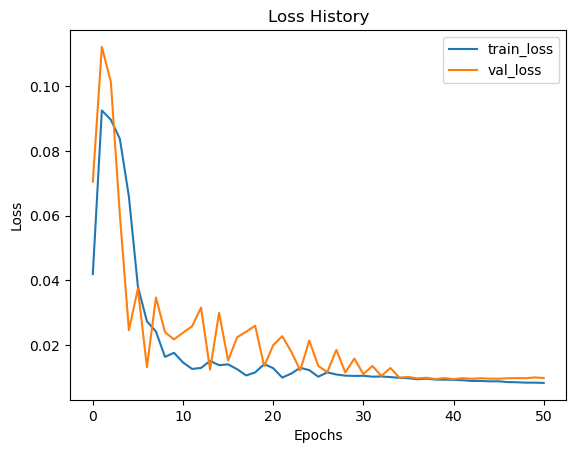

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

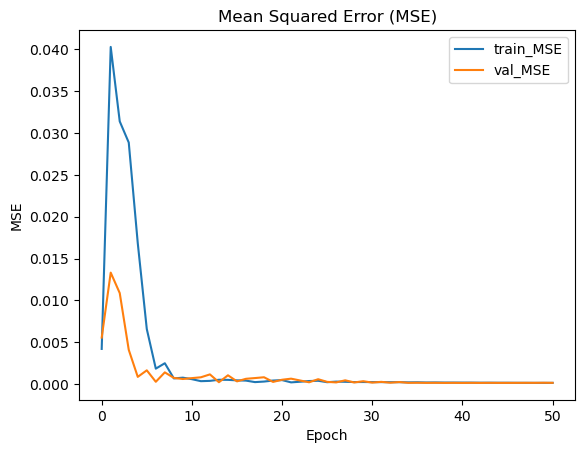

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

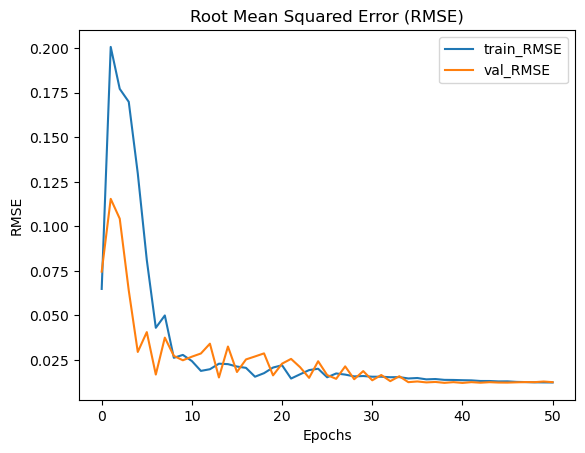

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

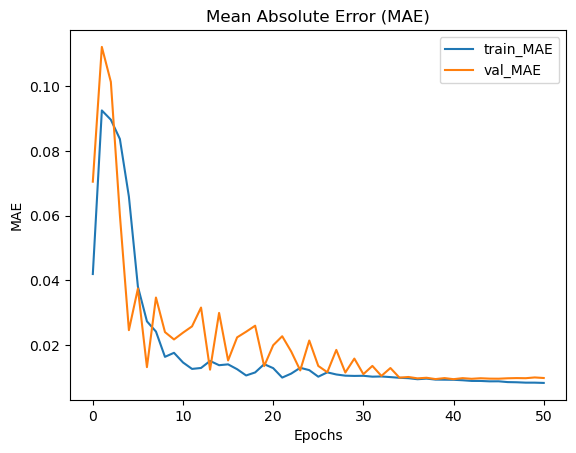

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

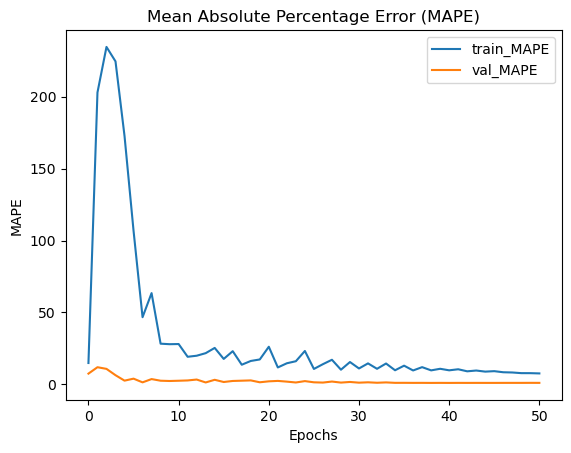

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:43:14.396941: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


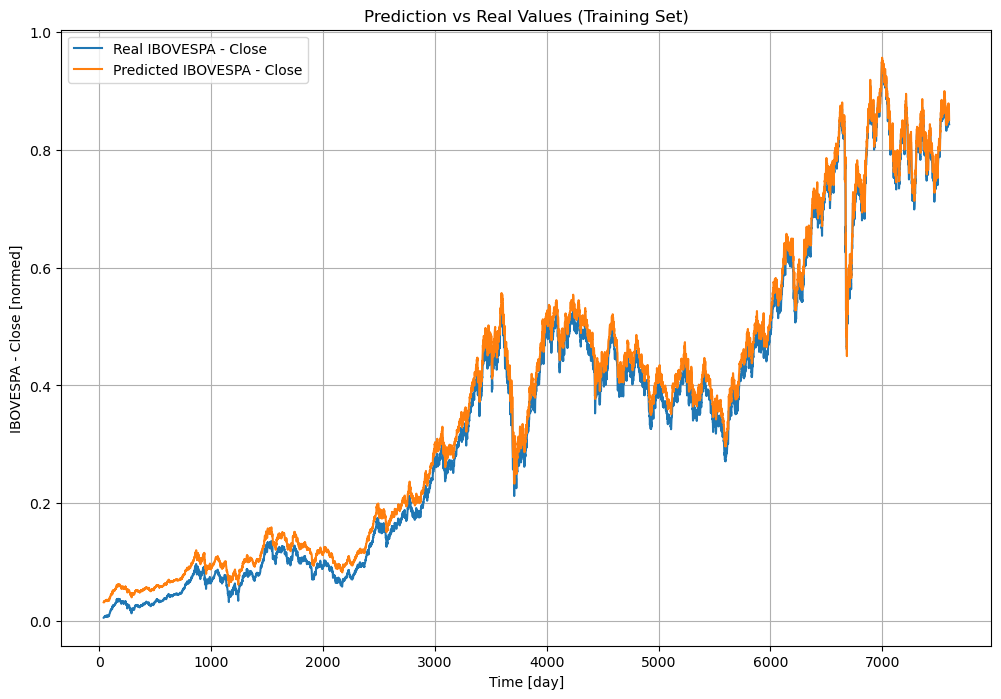

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


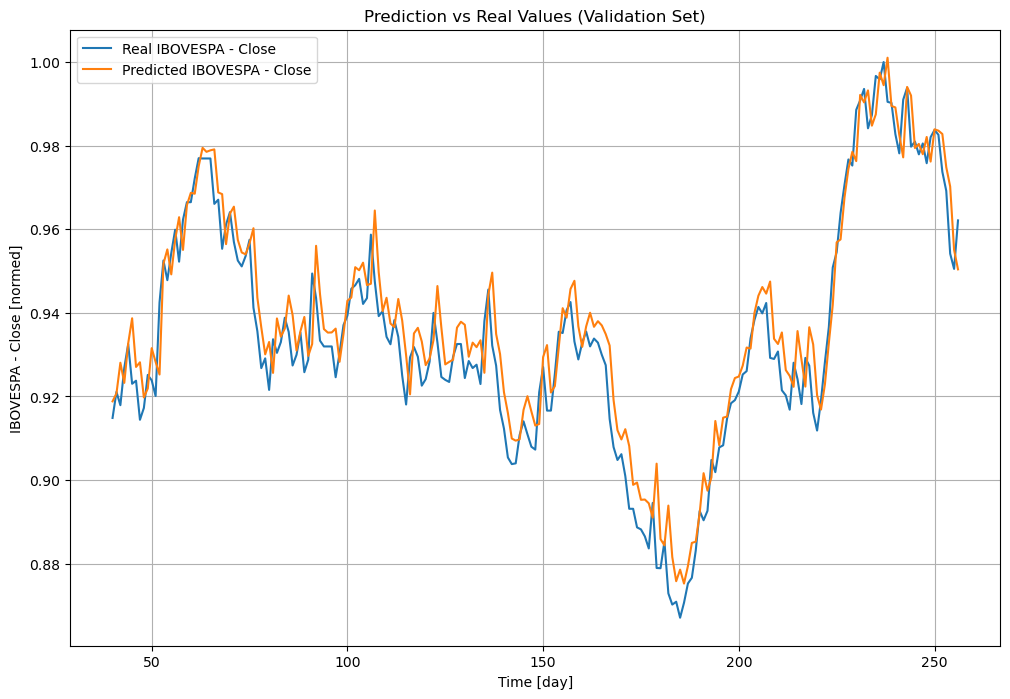

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


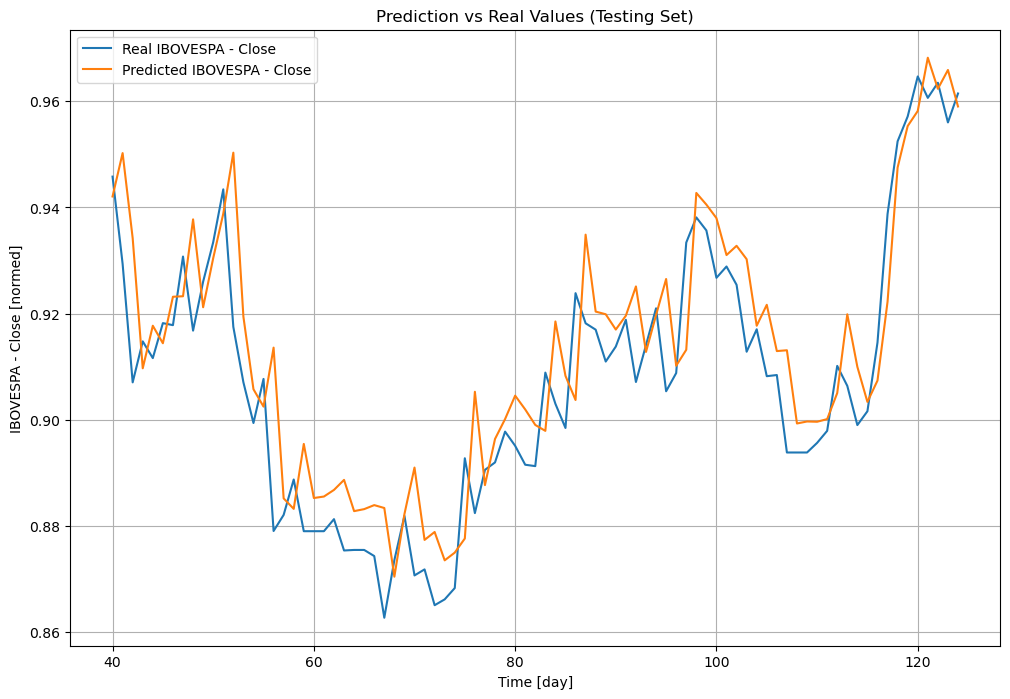

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

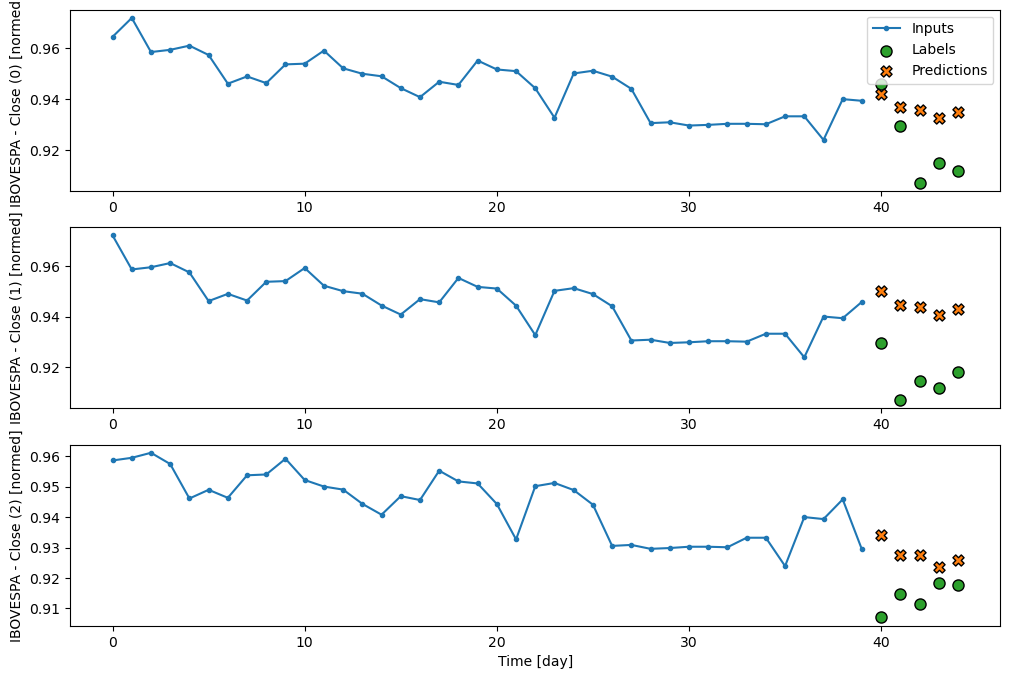

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:40s:784ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


array([[[0.94206583, 0.94206583, 0.94206583, ..., 0.94206583,
         0.94206583, 0.94206583],
        [0.9367956 , 0.9367956 , 0.9367956 , ..., 0.9367956 ,
         0.9367956 , 0.9367956 ],
        [0.9358387 , 0.9358387 , 0.9358387 , ..., 0.9358387 ,
         0.9358387 , 0.9358387 ],
        [0.9326775 , 0.9326775 , 0.9326775 , ..., 0.9326775 ,
         0.9326775 , 0.9326775 ],
        [0.93494385, 0.93494385, 0.93494385, ..., 0.93494385,
         0.93466145, 0.93466145]],

       [[0.9502467 , 0.9502467 , 0.9502467 , ..., 0.9502467 ,
         0.9502467 , 0.9502467 ],
        [0.9447336 , 0.9447336 , 0.9447336 , ..., 0.9447336 ,
         0.9447336 , 0.9447336 ],
        [0.94383967, 0.94383967, 0.94383967, ..., 0.94383967,
         0.94383967, 0.94383967],
        [0.9406793 , 0.9406793 , 0.9406793 , ..., 0.9406793 ,
         0.9406793 , 0.9406793 ],
        [0.94304585, 0.94304585, 0.94304585, ..., 0.94304585,
         0.94276965, 0.94276965]],

       [[0.93420124, 0.93420124, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')